# EARTHQUAKE_MAGNITUDE_PREDICTION_MODEL

**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

**LOAD THE DATASET**

In [2]:
data = pd.read_csv("Earthquake_ICT_Project.csv")

## **EXPLORATORY DATA ANALYSIS**

**SHAPE OF THE DATASET**

In [3]:
data.shape

(9749, 22)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9749 entries, 0 to 9748
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9749 non-null   object 
 1   latitude         9749 non-null   float64
 2   longitude        9749 non-null   float64
 3   depth            9749 non-null   float64
 4   mag              9749 non-null   float64
 5   magType          9749 non-null   object 
 6   nst              1370 non-null   float64
 7   gap              9407 non-null   float64
 8   dmin             9045 non-null   float64
 9   rms              9648 non-null   float64
 10  net              9749 non-null   object 
 11  id               9749 non-null   object 
 12  updated          9749 non-null   object 
 13  place            9687 non-null   object 
 14  type             9749 non-null   object 
 15  horizontalError  8287 non-null   float64
 16  depthError       9582 non-null   float64
 17  magError      

In [5]:
data.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

In [6]:
data.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [7]:
data[data.duplicated()] 

Empty DataFrame
Columns: [time, latitude, longitude, depth, mag, magType, nst, gap, dmin, rms, net, id, updated, place, type, horizontalError, depthError, magError, magNst, status, locationSource, magSource]
Index: []

[0 rows x 22 columns]

In [8]:
#Checking for nullvalues
data.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                8379
gap                 342
dmin                704
rms                 101
net                   0
id                    0
updated               0
place                62
type                  0
horizontalError    1462
depthError          167
magError            435
magNst              552
status                0
locationSource        0
magSource             0
dtype: int64

In [9]:
[features for features in data.columns if data[features].isnull().sum()>0]

['nst',
 'gap',
 'dmin',
 'rms',
 'place',
 'horizontalError',
 'depthError',
 'magError',
 'magNst']

In [10]:
100*data.isnull().sum()/data.shape[0]   

time                0.000000
latitude            0.000000
longitude           0.000000
depth               0.000000
mag                 0.000000
magType             0.000000
nst                85.947277
gap                 3.508052
dmin                7.221253
rms                 1.036004
net                 0.000000
id                  0.000000
updated             0.000000
place               0.635963
type                0.000000
horizontalError    14.996410
depthError          1.712996
magError            4.461996
magNst              5.662119
status              0.000000
locationSource      0.000000
magSource           0.000000
dtype: float64

In [11]:
data.nunique()

time               9749
latitude           9302
longitude          9514
depth              4169
mag                  47
magType              10
nst                 180
gap                 380
dmin               5051
rms                 168
net                   2
id                 9749
updated            6881
place              7480
type                  1
horizontalError     590
depthError          680
magError            336
magNst              265
status                1
locationSource        7
magSource             6
dtype: int64

In [12]:
data['time'].unique()

array(['2023-04-25T07:25:02.082Z', '2023-04-24T14:13:04.988Z',
       '2023-04-24T00:21:45.048Z', ..., '2013-04-19T14:46:45.000Z',
       '2013-04-19T08:32:24.880Z', '2013-04-19T06:35:52.970Z'],
      dtype=object)

In [13]:
data['latitude'].unique()

array([44.8695, 43.3327, 36.478 , ..., 32.801 , 28.472 , 27.333 ])

In [14]:
data['longitude'].unique()

array([52.4433, 83.7836, 70.9118, ..., 73.128 , 70.802 , 87.853 ])

In [15]:
data['depth'].unique()

array([ 10.388,  10.   , 120.173, ...,   6.3  , 188.6  ,  47.1  ])

In [16]:
data['mag'].unique()

array([4.5 , 4.4 , 4.  , 4.8 , 4.3 , 4.2 , 5.2 , 4.1 , 4.9 , 4.6 , 5.  ,
       5.1 , 3.5 , 3.9 , 5.8 , 6.5 , 4.7 , 6.9 , 5.7 , 5.4 , 6.  , 5.3 ,
       5.5 , 5.6 , 6.6 , 5.9 , 3.7 , 3.8 , 3.6 , 2.7 , 6.2 , 6.4 , 3.4 ,
       7.3 , 6.1 , 6.3 , 3.1 , 3.3 , 3.2 , 2.9 , 6.8 , 6.7 , 7.2 , 7.5 ,
       5.26, 7.8 , 7.7 ])

In [17]:
data['magType'].unique()

array(['mb', 'mww', 'ml', 'mwr', 'mwb', 'mwc', 'mw', 'Mb', 'mb_lg',
       'mblg'], dtype=object)

In [18]:
data['nst'].unique()

array([ 49.,  40.,  29.,  39.,  16.,  47.,  21.,  44.,  97.,  24.,  19.,
        67.,  41.,  59.,  27.,  56.,  36.,  22.,  28.,  35.,  55.,  25.,
        96., 105., 122.,  33.,  50.,  61.,  17.,  71.,  37.,  60.,   6.,
        30.,  32.,   9.,  70.,  93.,  42.,  73., 176.,  46.,  23.,  18.,
       170.,  90., 164.,  34.,  66., 115., 149., 137.,  43.,  58.,  77.,
        89.,  48., 146.,  52.,  98.,  20.,  31.,  51., 103.,  62.,  65.,
        83.,  88.,  26.,  38., 117.,  57.,  63., 151.,  14.,  45., 106.,
       300.,  80., 256.,  91., 107.,  12., 132.,  54.,  81.,  78., 111.,
        76.,  15., 135., 134., 206., 127., 110.,  72., 108., 121., 119.,
        84.,  75.,  68.,  87., 101.,  95., 172., 120., 186.,  94., 126.,
       136.,  92.,  64., 104., 182., 268.,  53., 102.,  10., 114., 112.,
       113.,  74., 161., 141., 123., 215.,  82., 138., 191., 157., 179.,
       109., 147., 128., 142.,  79.,  69., 238., 379., 160., 150.,  13.,
       143., 167., 226., 129., 229., 100., 153.,  n

In [19]:
data['gap'].unique()

array([ 52. ,  85. ,  84. , 122. , 163. ,  79. ,  91. , 176. ,  70. ,
        62. ,  73. ,  88. , 178. ,  72. ,  74. , 104. ,  50. ,  77. ,
       138. , 120. , 135. ,  51. ,  80. ,  40. ,  47. , 184. , 245. ,
        33. ,  86. , 108. ,  35. ,  58. , 114. , 116. , 149. , 110. ,
       100. ,  98. , 102. ,  75. , 112. ,  78. ,  37. , 222. ,  76. ,
        82. ,  46. , 166. ,  43. , 136. , 173. , 171. , 105. ,  36. ,
        32. , 106. ,  12. ,  57. ,  90. , 153. , 137. ,  54. ,  21. ,
        55. , 118. , 109. , 124. , 103. ,  96. , 133. ,  48. ,  65. ,
        64. ,  81. ,  92. ,  61. ,  93. , 127. , 221. ,  68. ,  66. ,
        67. ,  89. , 177. , 107. , 154. , 161. , 121. , 165. ,  53. ,
       249. ,  97. , 175. ,  99. , 134. ,  29. ,  25. ,  22. , 111. ,
        59. ,  69. ,  23. , 128. ,  56. ,  63. , 230. ,  28. , 145. ,
        38. , 115. , 129. , 162. ,  20. , 187. ,  39. ,  42. ,  83. ,
       246. , 130. ,  60. ,  95. ,  87. , 101. , 158. , 148. ,  44. ,
       182. , 169. ,

In [20]:
data['dmin'].unique()

array([ 3.67 ,  3.136,  2.462, ...,  2.269,  3.076, 10.628])

In [21]:
data['rms'].unique()

array([0.87, 1.05, 0.78, 0.58, 0.56, 0.96, 0.66, 0.52, 0.42, 0.7 , 0.71,
       0.72, 0.31, 0.77, 0.48, 0.5 , 0.43, 0.68, 0.63, 0.64, 0.47, 0.49,
       1.08, 0.51, 0.89, 0.73, 0.88, 0.69, 0.57, 1.  , 0.62, 1.03, 0.34,
       1.12, 0.55, 0.97, 0.83, 0.59, 0.79, 1.18, 0.29, 0.46, 0.76, 0.8 ,
       0.86, 0.82, 0.94, 0.45, 1.04, 0.44, 0.75, 0.92, 0.67, 0.65, 0.28,
       0.81, 0.53, 0.54, 0.38, 1.07, 0.6 , 0.93, 1.26, 0.4 , 0.91, 0.27,
       0.9 , 1.02, 0.74, 0.35, 0.85, 0.36, 0.61, 0.18, 0.98, 1.09, 1.16,
       0.33, 1.23, 0.99, 0.39, 1.14, 0.41, 0.84, 0.95, 0.37, 0.25, 0.3 ,
       1.21, 1.13, 0.32, 1.25, 1.1 , 1.11, 0.2 , 1.01, 1.06, 1.36, 1.19,
       1.22, 1.27, 1.24, 1.17, 1.15, 1.39, 0.22, 1.32, 1.33, 1.3 , 0.16,
       1.31, 1.38, 1.2 , 1.28, 1.37, 1.35, 1.34, 1.41, 1.29, 0.26, 1.4 ,
       1.43, 1.44, 1.42, 1.46, 1.48, 1.45, 1.47, 1.5 , 1.53, 1.88, 1.57,
       1.51, 1.98, 1.74, 1.49, 1.62, 1.71, 1.72, 0.13, 1.81, 1.6 ,  nan,
       1.64, 1.75, 1.7 , 1.55, 1.77, 1.91, 1.54, 1.

In [22]:
data['net'].unique()

array(['us', 'iscgem'], dtype=object)

In [23]:
data['id'].unique()

array(['us7000jvqr', 'us6000k6s4', 'us6000k6me', ..., 'usb000gbw7',
       'us2013pedv', 'us2013pedr'], dtype=object)

In [24]:
data['updated'].unique()

array(['2023-04-25T12:11:17.078Z', '2023-04-24T16:19:53.040Z',
       '2023-04-25T03:35:22.040Z', ..., '2014-11-07T01:50:35.916Z',
       '2014-11-07T01:50:35.840Z', '2014-11-07T01:50:35.824Z'],
      dtype=object)

In [25]:
data['place'].unique()

array(['84 km NNE of Shetpe, Kazakhstan', '44 km ESE of Xinyuan, China',
       '43 km S of Jurm, Afghanistan', ..., '92 km SE of Bushehr, Iran',
       '10 km ESE of Battagram, Pakistan', '40 km W of Gyalshing, India'],
      dtype=object)

In [26]:
data['type'].unique()

array(['earthquake'], dtype=object)

In [27]:
data['horizontalError'].unique()

array([ 8.31,  7.48,  6.09,  6.87, 15.53,  8.91,  4.05,  5.68,  6.82,
        3.4 ,  9.42,  3.64,  6.36,  9.07,  7.05,  6.64,  7.28,  4.25,
        5.39,  9.04,  9.15,  7.04,  8.16,  7.59,  4.98,  6.27,  7.2 ,
        7.58,  6.81, 11.98,  7.45, 11.65, 10.57,  8.41,  7.88,  9.35,
       12.79,  8.28,  6.89,  2.52,  7.99, 12.47,  6.98,  5.15,  7.49,
        5.1 ,  7.54,  8.27,  6.33,  8.12,  7.84,  7.17,  6.52,  4.37,
        9.47,  7.47,  7.23,  8.22,  8.9 ,  8.61,  8.54, 13.44,  9.67,
        7.24,  5.63,  4.13,  9.63,  8.73,  6.23,  5.38,  9.82,  5.47,
        8.25,  6.21,  3.15,  6.55,  4.43,  4.23,  5.58,  6.12,  4.  ,
        5.08,  8.74,  9.37,  5.45,  9.52,  7.92,  8.56,  4.97,  6.99,
        9.57, 10.56,  4.61,  5.36,  2.94,  6.6 ,  8.01,  6.03,  8.4 ,
        6.74,  5.9 ,  6.63,  4.48,  4.44,  6.68,  5.29,  6.97,  7.25,
        5.99,  6.83,  3.93,  6.59,  7.97,  9.85,  2.61,  4.15,  8.43,
        3.53,  6.16,  8.64,  8.63,  5.41,  7.75,  6.42,  7.01,  5.97,
        5.81,  6.8 ,

In [28]:
data['depthError'].unique()

array([ 5.457,  1.7  ,  8.25 ,  6.011, 10.959,  6.179,  1.909,  1.97 ,
        3.54 ,  1.869,  1.808,  7.905, 13.394,  1.963,  2.244,  5.079,
        7.538, 12.492,  5.531,  9.236, 16.483,  1.86 , 10.21 ,  1.882,
        1.933,  1.85 ,  1.785,  5.85 ,  9.264,  5.857,  1.917,  1.906,
        1.898,  4.091,  1.952,  4.153,  1.919,  2.001,  8.521,  7.8  ,
        8.691,  1.907,  9.979, 10.385, 18.022,  7.028,  1.824,  2.014,
       13.148,  8.556,  7.629,  1.876,  1.989,  1.825,  1.807,  4.668,
        7.101, 10.   ,  7.587,  8.197,  1.886,  1.858,  9.028,  1.743,
        1.863,  1.918,  1.842,  8.92 , 11.588,  1.855,  4.825,  1.889,
        8.349,  1.947,  1.935,  1.849,  5.428,  4.793,  1.84 ,  1.901,
        4.692,  1.905,  1.92 ,  4.704,  3.8  ,  1.823,  1.843,  3.054,
        6.068,  4.713,  6.288,  1.9  ,  6.734,  6.858,  4.376,  4.065,
        6.298,  8.297,  7.35 ,  4.789,  1.861,  9.141,  1.893,  1.651,
        6.926, 10.016,  1.997,  8.528,  5.554,  1.806,  1.878,  7.179,
      

In [29]:
data['magError'].unique()

array([0.079, 0.104, 0.173, 0.108, 0.109, 0.083, 0.11 , 0.144, 0.122,
       0.081, 0.093, 0.08 , 0.168, 0.214, 0.077, 0.071, 0.055, 0.184,
       0.089, 0.091, 0.131, 0.076, 0.088, 0.146, 0.042, 0.063, 0.237,
       0.315, 0.043, 0.119, 0.086, 0.095, 0.068, 0.165, 0.197, 0.044,
       0.087, 0.494, 0.127, 0.112, 0.234, 0.238, 0.26 , 0.07 , 0.105,
       0.258, 0.128, 0.114, 0.162, 0.057, 0.045, 0.152, 0.233, 0.094,
       0.155, 0.189, 0.211, 0.153, 0.06 , 0.115, 0.186, 0.073, 0.098,
       0.111, 0.13 , 0.084, 0.117, 0.216, 0.116, 0.157, 0.064, 0.235,
       0.161, 0.239, 0.266, 0.041, 0.125, 0.145, 0.061, 0.269, 0.062,
       0.136, 0.195, 0.138, 0.124, 0.113, 0.118, 0.213, 0.096, 0.066,
       0.053, 0.174, 0.101, 0.069, 0.129, 0.142, 0.188, 0.137, 0.263,
       0.133, 0.147, 0.14 , 0.05 , 0.054, 0.262, 0.37 , 0.241, 0.065,
       0.185, 0.09 , 0.219, 0.156, 0.048, 0.3  , 0.1  , 0.16 , 0.102,
       0.176, 0.141, 0.166, 0.134, 0.175, 0.151, 0.158, 0.15 , 0.075,
       0.149, 0.078,

In [30]:
data['magNst'].unique()

array([ 48.,  27.,   9.,  25.,  26.,  41.,  23.,  13.,  18.,  45.,  11.,
        46.,  10.,   6.,  56.,  59.,  97.,   8.,  38.,  33.,  24.,  17.,
        53.,  35.,  14., 179.,  75.,   5.,   3., 163.,  19.,  32.,  64.,
         7., 165.,  40.,  43.,   1.,  22.,   4.,  74.,  12.,  37.,  96.,
       150.,  31.,  80.,  21.,  30.,  57.,  29.,  44., 174.,  77.,  71.,
        83., 178.,  20., 164.,  28.,  78.,  15.,  91., 113.,  62., 100.,
       121., 103., 114.,   2.,  52.,  76.,  34., 109., 140.,  16.,  50.,
       139., 105.,  60.,  39.,  47.,  42., 184.,  55.,  70.,  36.,  85.,
       194., 117., 124.,  63.,  72.,  87.,  54., 142., 131., 125.,  88.,
        58., 112.,  49., 177.,  51.,  98.,  69., 106., 115.,  89.,  65.,
        84., 107., 137., 218., 104.,  86., 158., 144., 123., 175., 232.,
       101., 111., 167., 102., 141., 208., 128.,  73., 126.,  61., 200.,
        81., 147.,  68.,  92., 215., 119.,  99.,  95., 269., 192., 132.,
       186., 154., 216., 135., 127., 183., 201.,  9

In [31]:
data['status'].unique()

array(['reviewed'], dtype=object)

In [32]:
data['locationSource'].unique()

array(['us', 'teh', 'bji', 'iscgem', 'thr', 'us_teh', 'us_thr'],
      dtype=object)

In [33]:
data['magSource'].unique()

array(['us', 'gcmt', 'teh', 'iscgem', 'us_teh', 'thr'], dtype=object)

In [34]:
data.describe()

latitude    longitude        depth          mag          nst  \
count  9749.000000  9749.000000  9749.000000  9749.000000  1370.000000   
mean     32.524655    76.039008    49.132742     4.421865    55.846715   
std       6.123895    16.361299    63.531274     0.375508    47.881686   
min      14.609500    46.407900     1.500000     2.700000     6.000000   
25%      27.832200    68.354900    10.000000     4.200000    27.000000   
50%      33.118500    72.424500    10.530000     4.400000    41.000000   
75%      36.979600    89.662200    61.780000     4.600000    67.000000   
max      48.387600   115.207300   400.570000     7.800000   586.000000   

               gap         dmin          rms  horizontalError   depthError  \
count  9407.000000  9045.000000  9648.000000      8287.000000  9582.000000   
mean     87.688774     3.102512     0.825066         7.192738     4.289706   
std      40.268004     2.485894     0.260522         2.180915     3.000431   
min       9.000000     0.001000     0.130000         1.500000     0.000000   
25%      61.000000     1.087000     0.640000         5.800000     1.900000   
50%      80.000000     2.471000     0.800000         7.100000     2.900000   
75%     108.000000     4.456000     0.980000         8.400000     6.200000   
max     306.000000    23.330000     2.360000        28.900000    30.200000   

          magError       magNst  
count  9314.000000  9197.000000  
mean      0.129327    36.043166  
std       0.070151    42.976510  
min       0.000000     1.000000  
25%       0.080000    11.000000  
50%       0.115000    21.000000  
75%       0.159000    42.000000  
max       0.540000   578.000000

In [35]:
data.corr()

latitude  longitude     depth       mag       nst       gap  \
latitude         1.000000  -0.192891  0.279633 -0.044866 -0.029337 -0.160381   
longitude       -0.192891   1.000000 -0.077445  0.105881  0.000591 -0.013489   
depth            0.279633  -0.077445  1.000000 -0.150399 -0.083663 -0.096462   
mag             -0.044866   0.105881 -0.150399  1.000000  0.782157 -0.503631   
nst             -0.029337   0.000591 -0.083663  0.782157  1.000000 -0.567097   
gap             -0.160381  -0.013489 -0.096462 -0.503631 -0.567097  1.000000   
dmin            -0.190447   0.074915 -0.410361  0.090262  0.070464  0.095821   
rms              0.115158  -0.155334 -0.040492 -0.047048 -0.006066 -0.017296   
horizontalError -0.206836   0.099231 -0.077192 -0.130387 -0.106274  0.365548   
depthError       0.178361  -0.009910  0.585365 -0.261713 -0.224156  0.100140   
magError         0.087981   0.000263  0.166574 -0.525109 -0.625898  0.469551   
magNst          -0.018760   0.011921 -0.074244  0.556591  0.626702 -0.407405   

                     dmin       rms  horizontalError  depthError  magError  \
latitude        -0.190447  0.115158        -0.206836    0.178361  0.087981   
longitude        0.074915 -0.155334         0.099231   -0.009910  0.000263   
depth           -0.410361 -0.040492        -0.077192    0.585365  0.166574   
mag              0.090262 -0.047048        -0.130387   -0.261713 -0.525109   
nst              0.070464 -0.006066        -0.106274   -0.224156 -0.625898   
gap              0.095821 -0.017296         0.365548    0.100140  0.469551   
dmin             1.000000 -0.073049         0.411634   -0.302855 -0.121495   
rms             -0.073049  1.000000        -0.105952    0.038784  0.031496   
horizontalError  0.411634 -0.105952         1.000000   -0.002434  0.120566   
depthError      -0.302855  0.038784        -0.002434    1.000000  0.323102   
magError        -0.121495  0.031496         0.120566    0.323102  1.000000   
magNst           0.058705 -0.054971        -0.119822   -0.189790 -0.597043   

                   magNst  
latitude        -0.018760  
longitude        0.011921  
depth           -0.074244  
mag              0.556591  
nst              0.626702  
gap             -0.407405  
dmin             0.058705  
rms             -0.054971  
horizontalError -0.119822  
depthError      -0.189790  
magError        -0.597043  
magNst           1.000000

**Visualising correlations using Heatmap. It shows the relationship between each features**

In [36]:
data.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                8379
gap                 342
dmin                704
rms                 101
net                   0
id                    0
updated               0
place                62
type                  0
horizontalError    1462
depthError          167
magError            435
magNst              552
status                0
locationSource        0
magSource             0
dtype: int64

<Axes: >

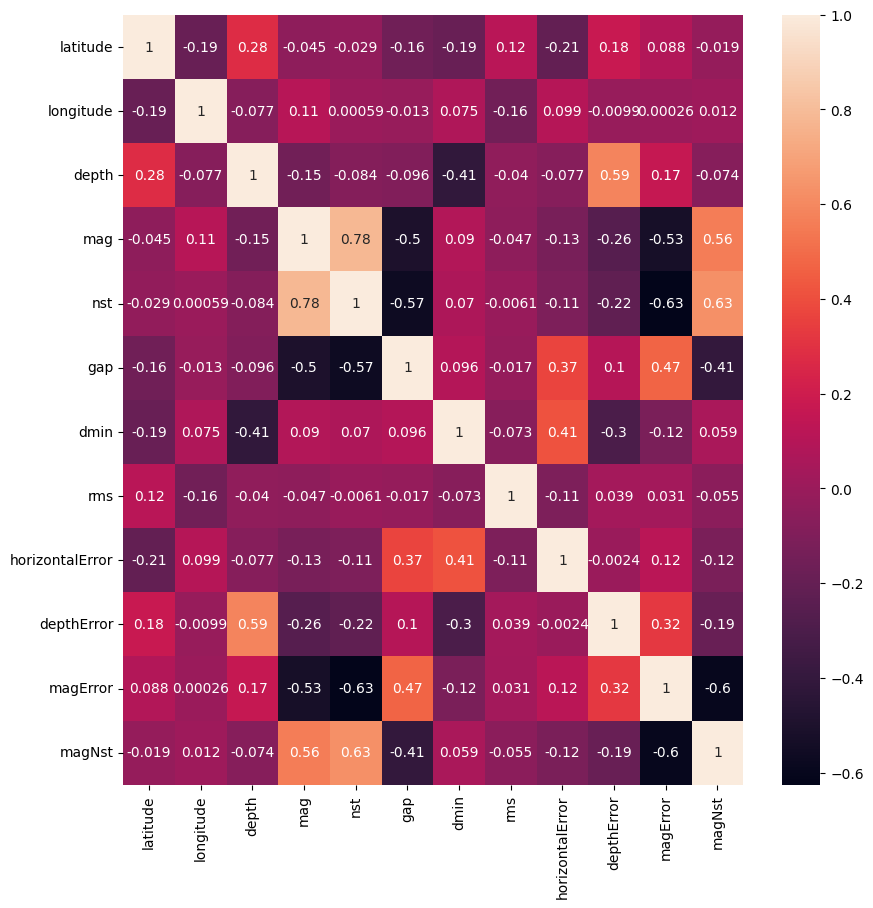

In [37]:
#CHECKING FOR CORRELARION BETWEEN FEATURES
plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

### **DATA VISUALIZATION**

DISTRIBUTION PLOTS : Plotted distribution graphs for features for identifying if the distribution is normal or has left/right skewdness 

<Axes: xlabel='magNst', ylabel='Density'>

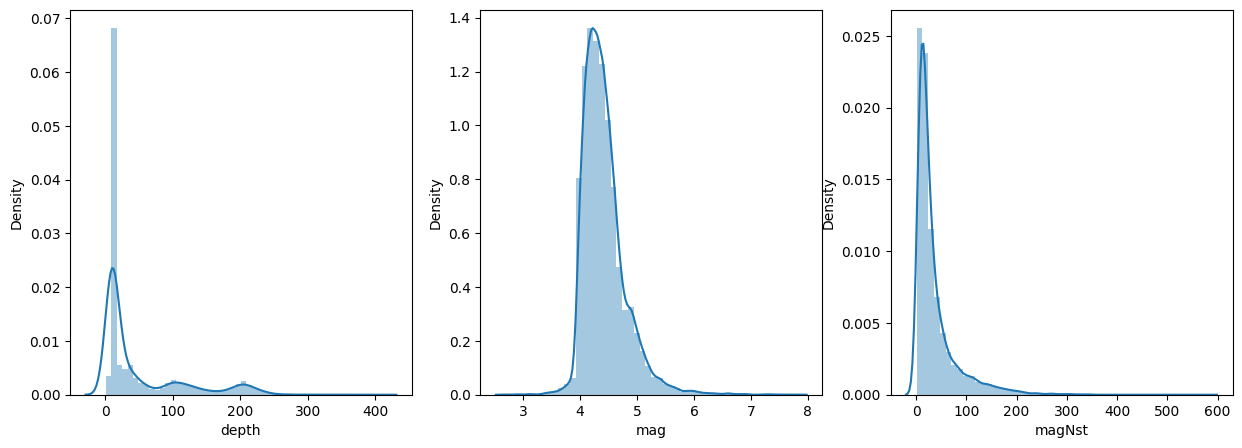

In [38]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.distplot(data.depth, ax=axs[0])
sns.distplot(data.mag,ax=axs[1])
sns.distplot( data.magNst, ax=axs[2])

<Axes: xlabel='nst', ylabel='Density'>

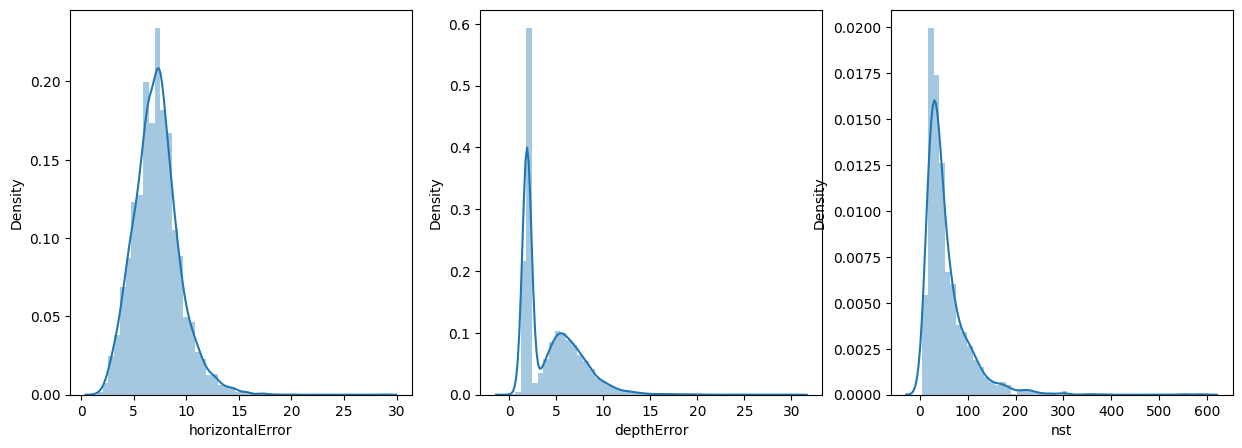

In [39]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.distplot(data.horizontalError, ax=axs[0])
sns.distplot(data.depthError, ax=axs[1])
sns.distplot( data.nst, ax=axs[2])

<Axes: xlabel='dmin', ylabel='Density'>

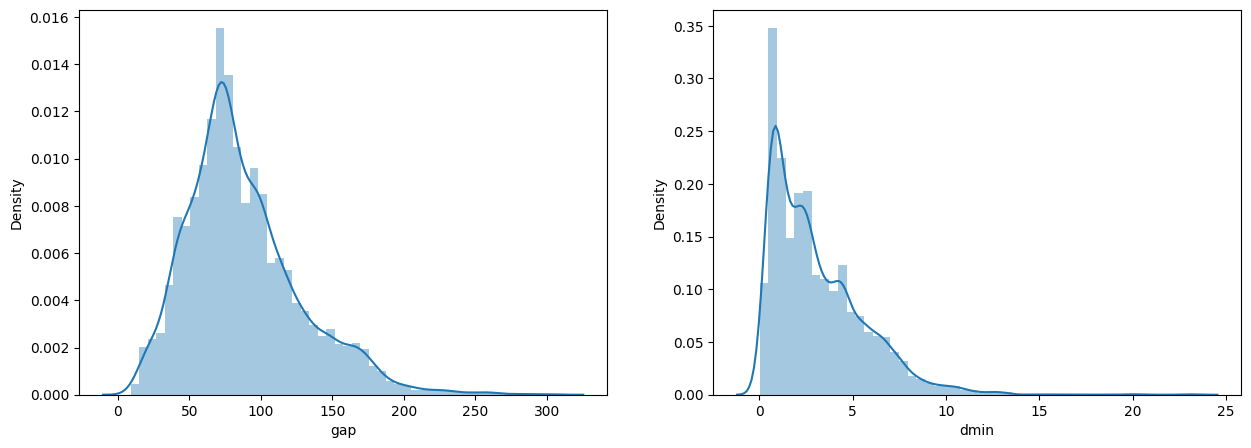

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.distplot(data.gap, ax=axs[0])
sns.distplot(data.dmin, ax=axs[1])


<Axes: xlabel='magError', ylabel='Density'>

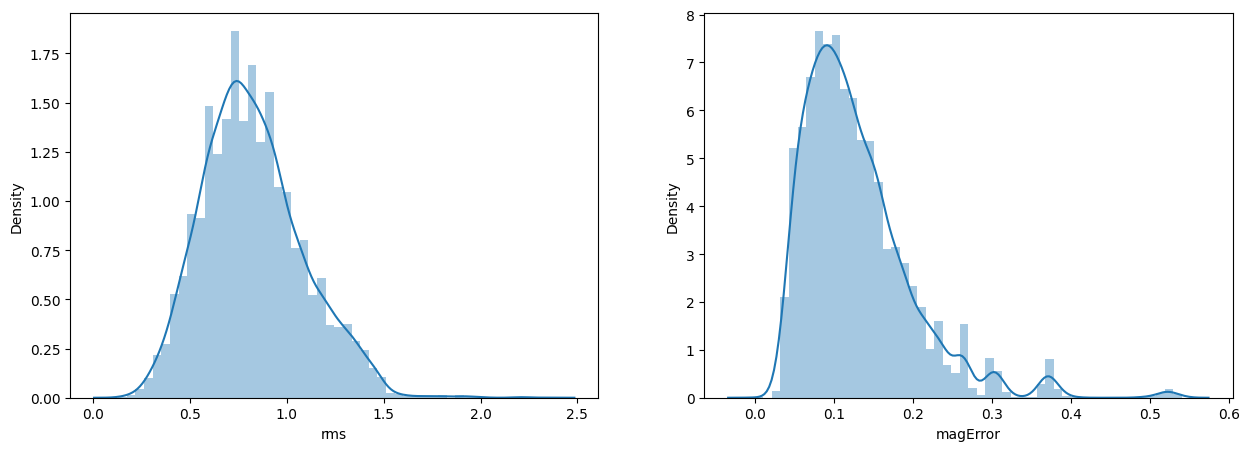

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.distplot(data.rms, ax=axs[0])
sns.distplot(data.magError, ax=axs[1])



**PLOTTING BOXPLOTS TO DETECT OUTLIERS**


Text(0.5, 1.0, 'mag')

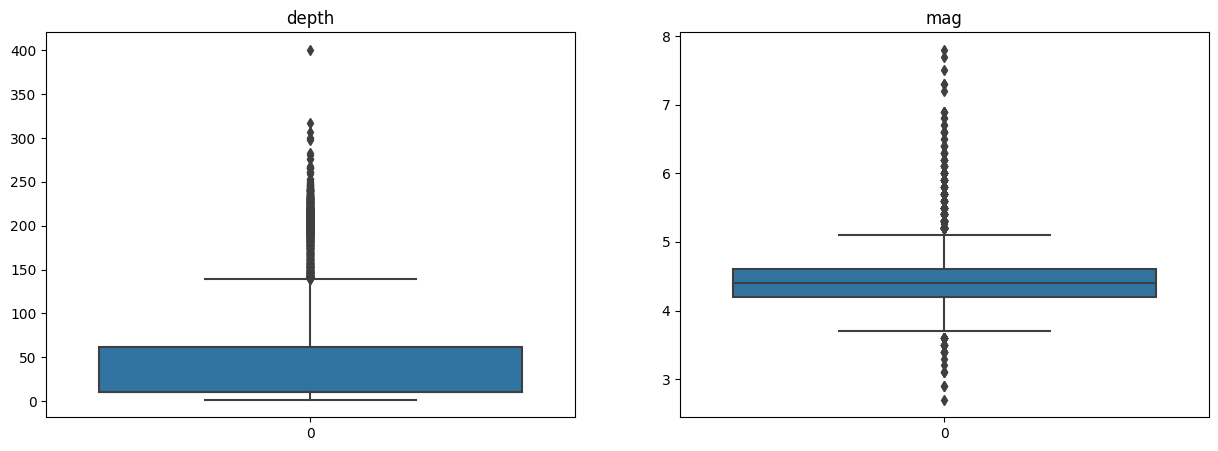

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.boxplot(data.depth,ax=axs[0]).set_title('depth')
sns.boxplot(data.mag,ax=axs[1]).set_title('mag')


Text(0.5, 1.0, 'magError')

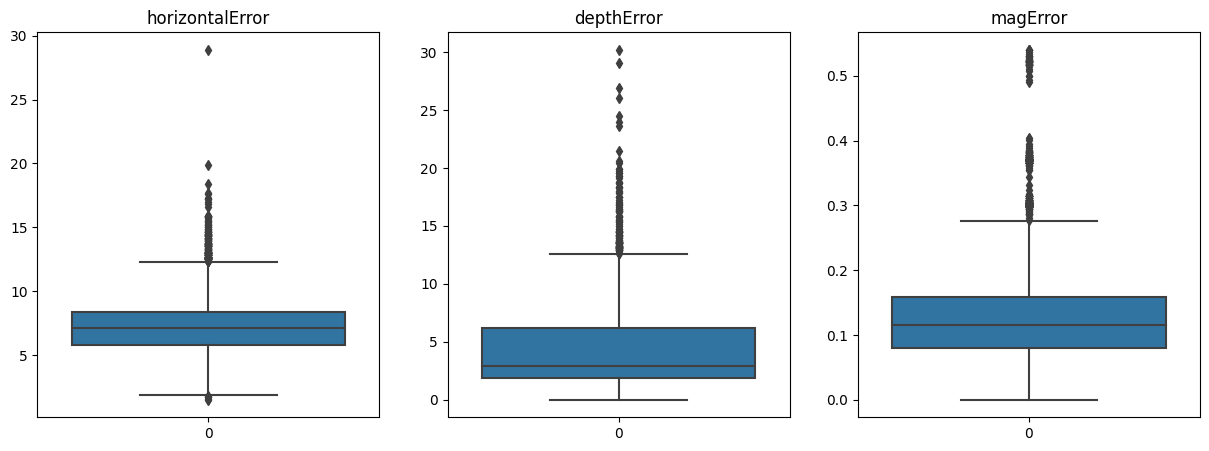

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.boxplot(data.horizontalError,ax=axs[0]).set_title('horizontalError')
sns.boxplot(data.depthError,ax=axs[1]).set_title('depthError')
sns.boxplot(data.magError,ax=axs[2]).set_title('magError')

Text(0.5, 1.0, 'magNst')

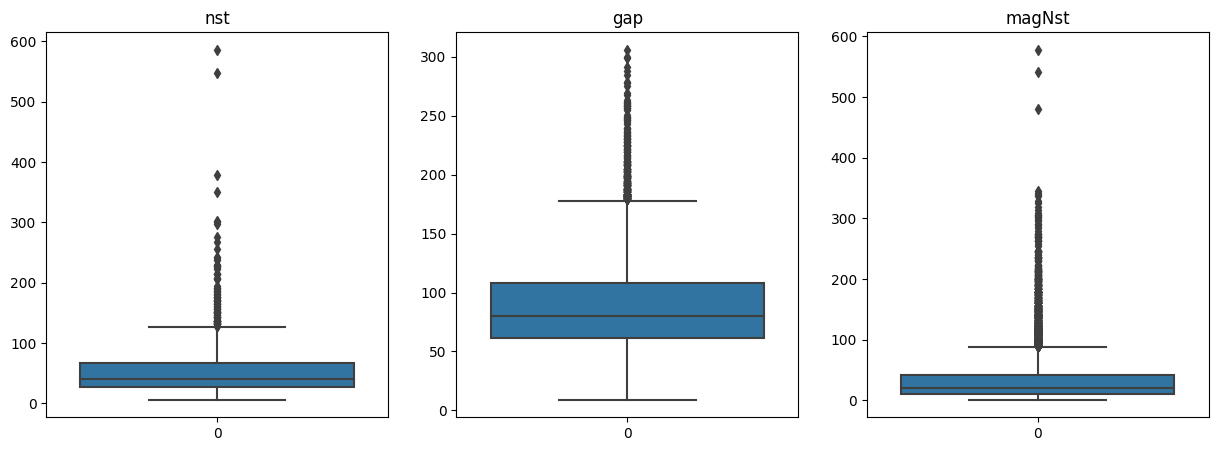

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.boxplot(data.nst,ax=axs[0]).set_title('nst')
sns.boxplot(data.gap,ax=axs[1]).set_title('gap')
sns.boxplot(data.magNst,ax=axs[2]).set_title('magNst')

Text(0.5, 1.0, 'rms')

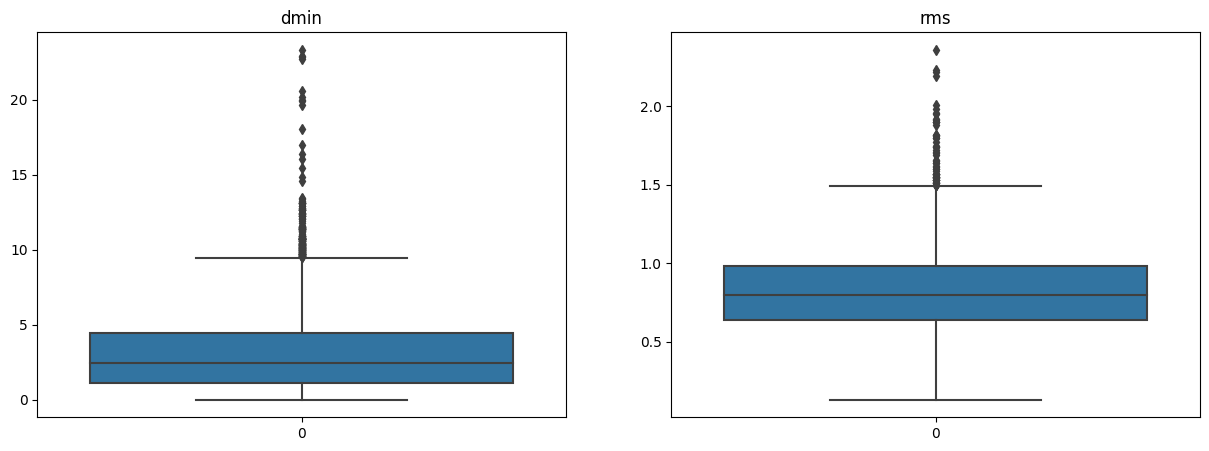

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.boxplot(data.dmin,ax=axs[0]).set_title('dmin')
sns.boxplot(data.rms,ax=axs[1]).set_title('rms')

**Plotting Barplot and analysing mag and nst.**


<Axes: xlabel='mag', ylabel='nst'>

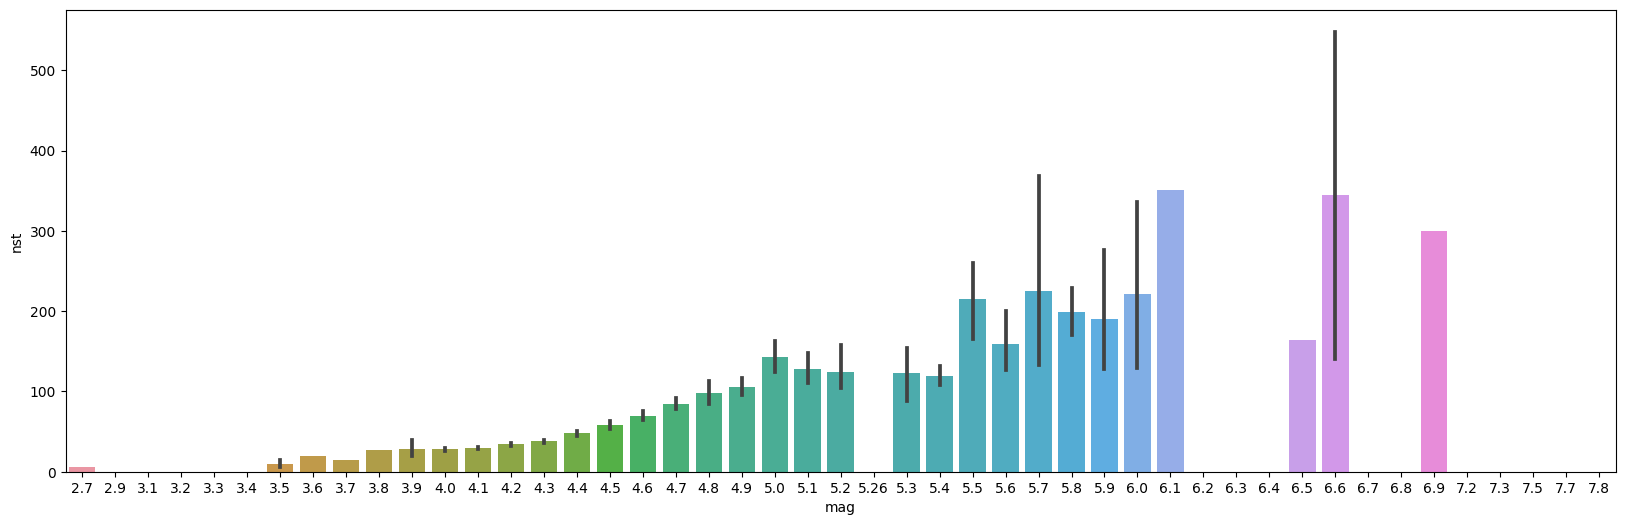

In [ ]:
plt.rcParams['figure.figsize']=(20,6)
sns.barplot(x="mag",y="nst",data=data)

**Observation:The magnitude is increasing with the increase in no.of seismic stations(nst).Shows a positive correlation**

**Plotting mag and gap.**

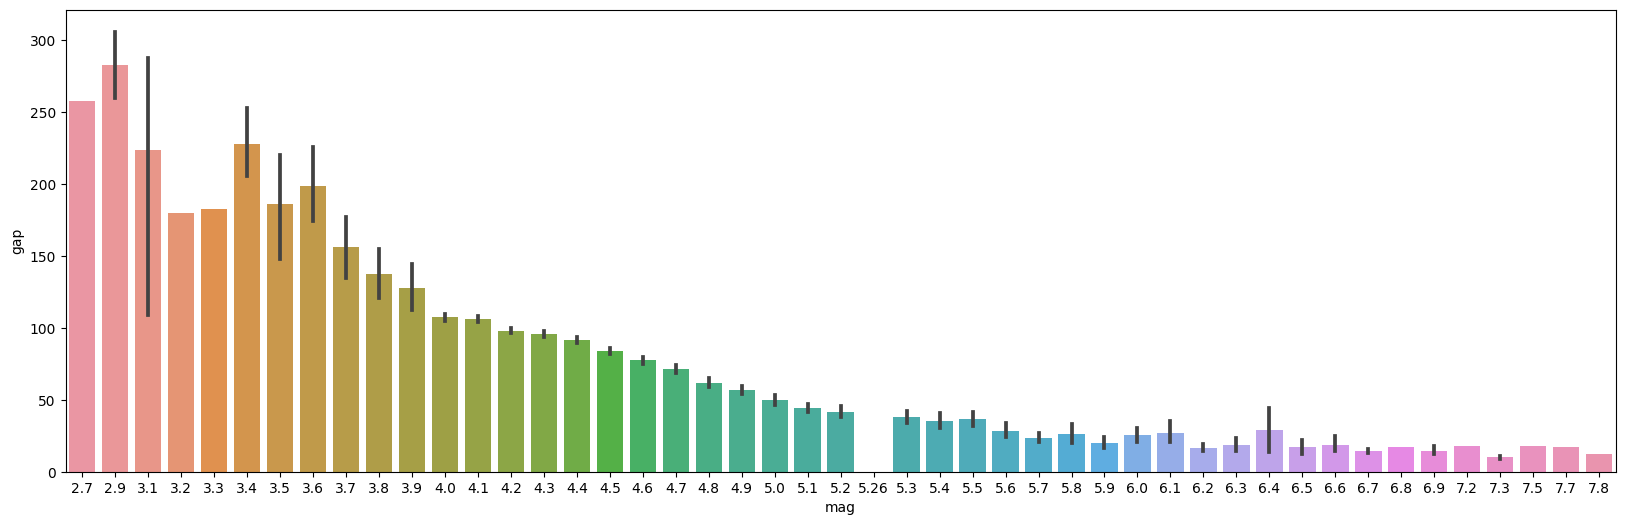

In [ ]:
import matplotlib.pyplot as plt
sns.barplot(x="mag",y="gap",data=data)
plt.rcParams['figure.figsize']=(15,15)

We have analysed a negative correlation.
### Observation: As there is increase in gap between adjacent stations(gap), there is decrease in magnitude of the earthquake.



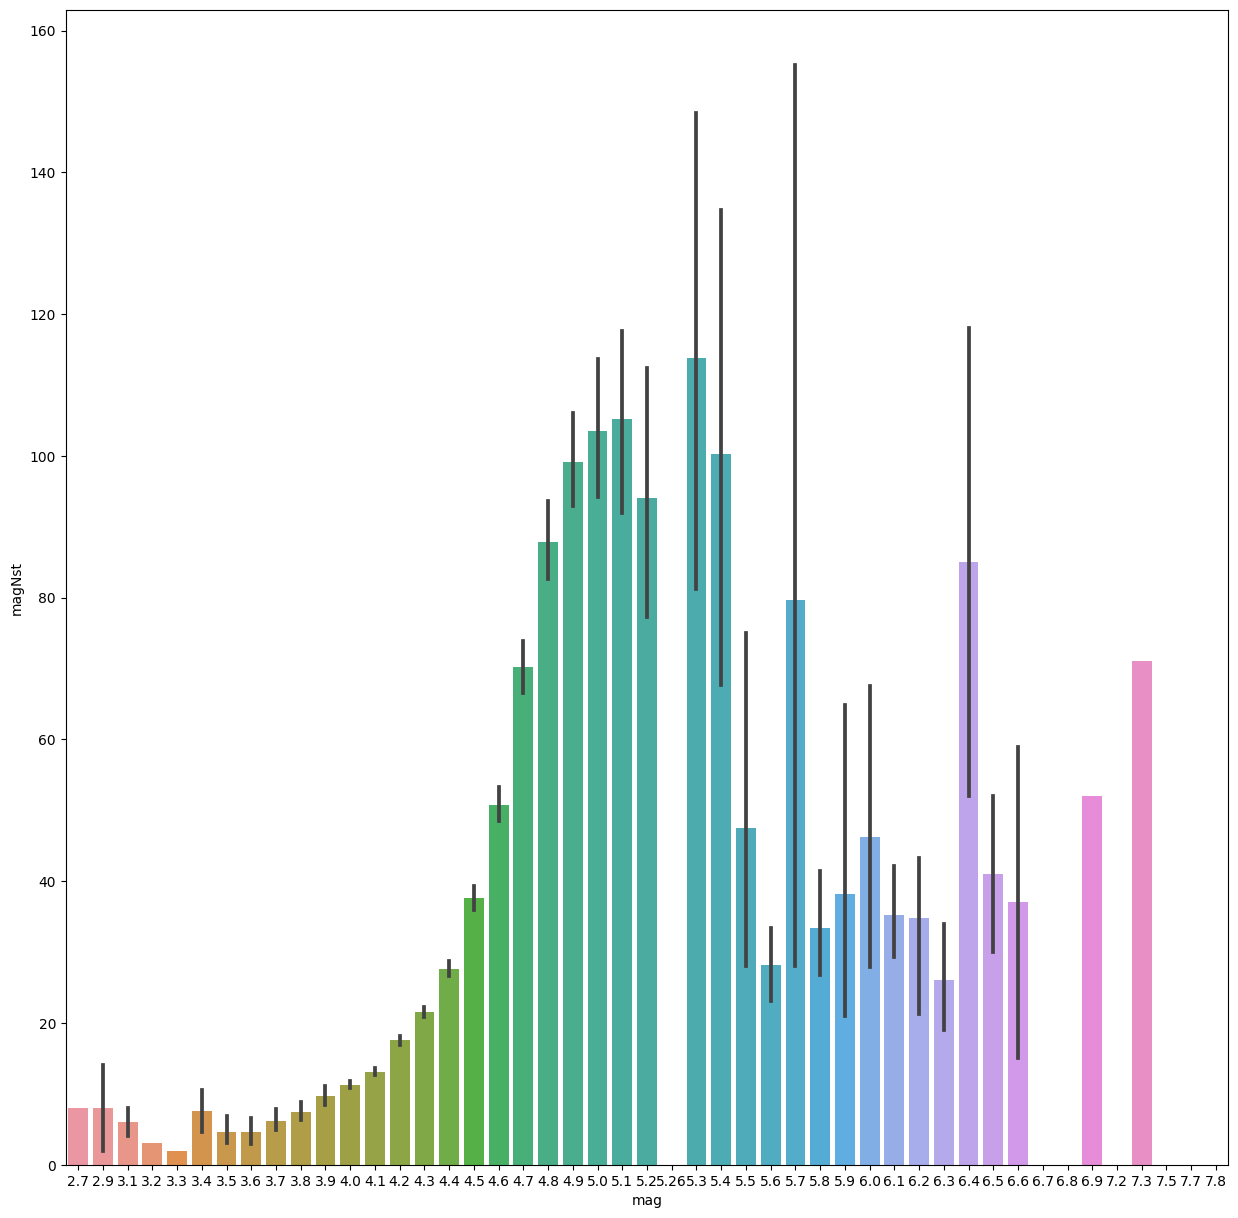

In [ ]:
sns.barplot(x="mag",y="magNst",data=data)
plt.rcParams['figure.figsize']=(15,6)

**Observation : Shows a slight positive relationship saying increased stations could actually be required in detecting higher magnitude**

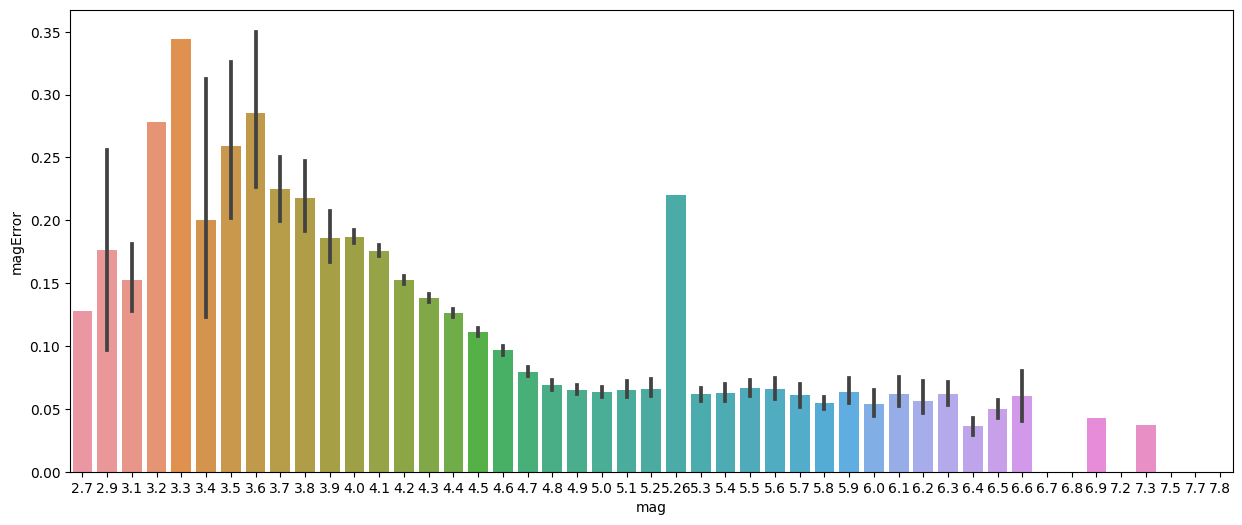

In [ ]:
sns.barplot(x="mag",y="magError",data=data)
plt.rcParams['figure.figsize']=(15,6)

**Observation : Displays that increased magnitude gives decreased magnitude Errors.**

<Axes: xlabel='nst', ylabel='magError'>

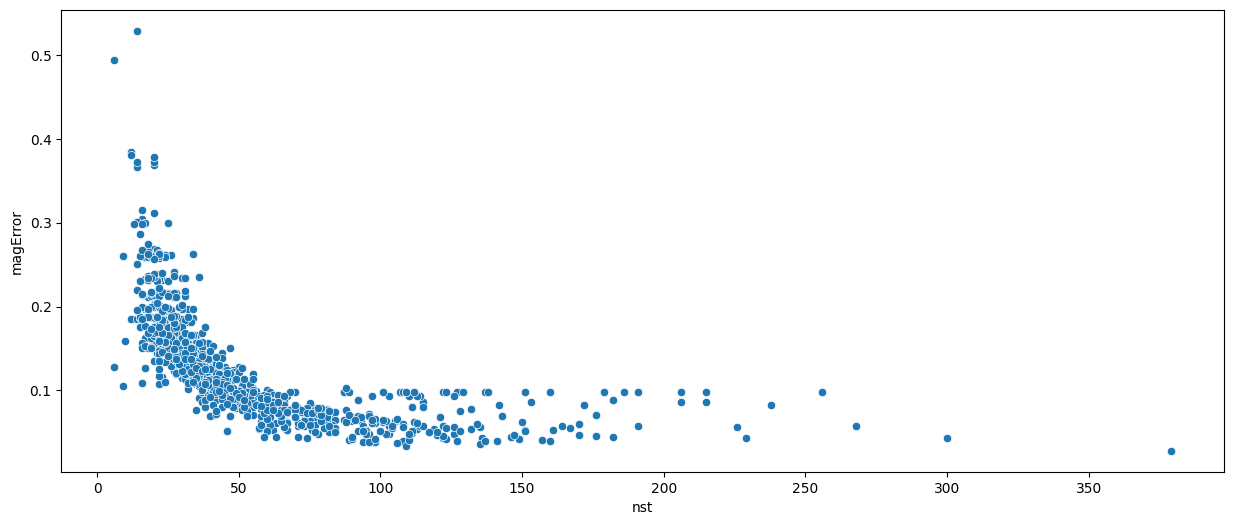

In [ ]:
sns.scatterplot(x="nst",y="magError",data=data)

**Observation : Higher the number of stations, lesser is the magnitude error.**

<Axes: xlabel='magType', ylabel='mag'>

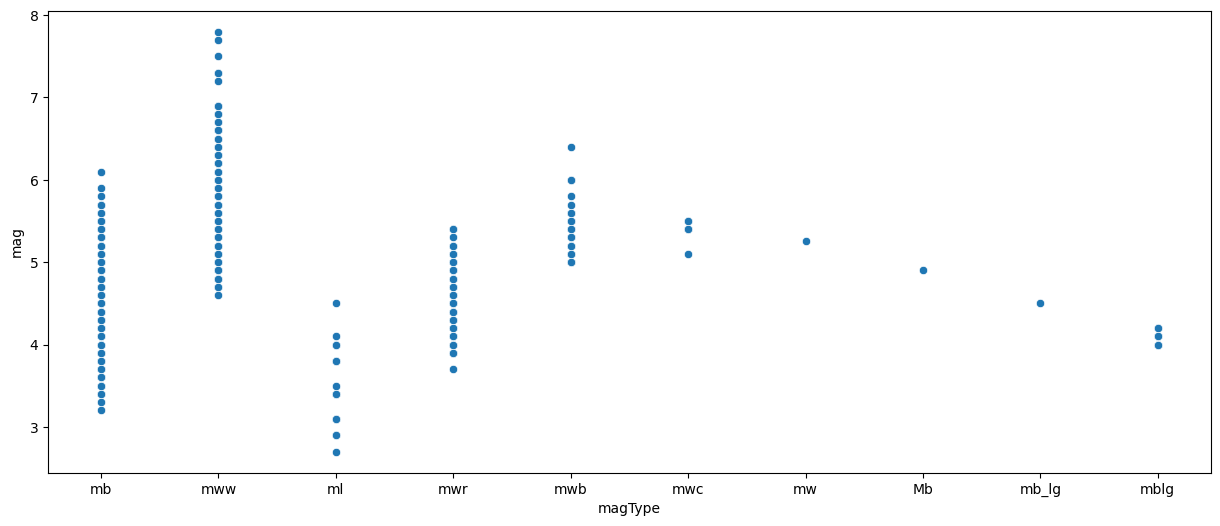

In [ ]:
sns.scatterplot(x="magType",y="mag",data=data)

**Observation : The method or algorithm used to calculate the preferred magnitude for the event.Below are approximate values based on the plot**


*  3.5 to 6.2 categorized as mb
*  4.5 to 7.5 categorized as mww
*  2 to 4.5 categorized as ml
*  3.7 to 5.5 categorized as mwr
*  5 to 6.3 categorized as mwb 
*  5 to 5.5 categorized as mwc
*  Around 5.5 categorized as mw
*  Around 5 categorized as Mb
*  Around 4.5 categorized as mb_lg
*  4 to 4.5 categorized as mblg




<Axes: xlabel='gap', ylabel='depthError'>

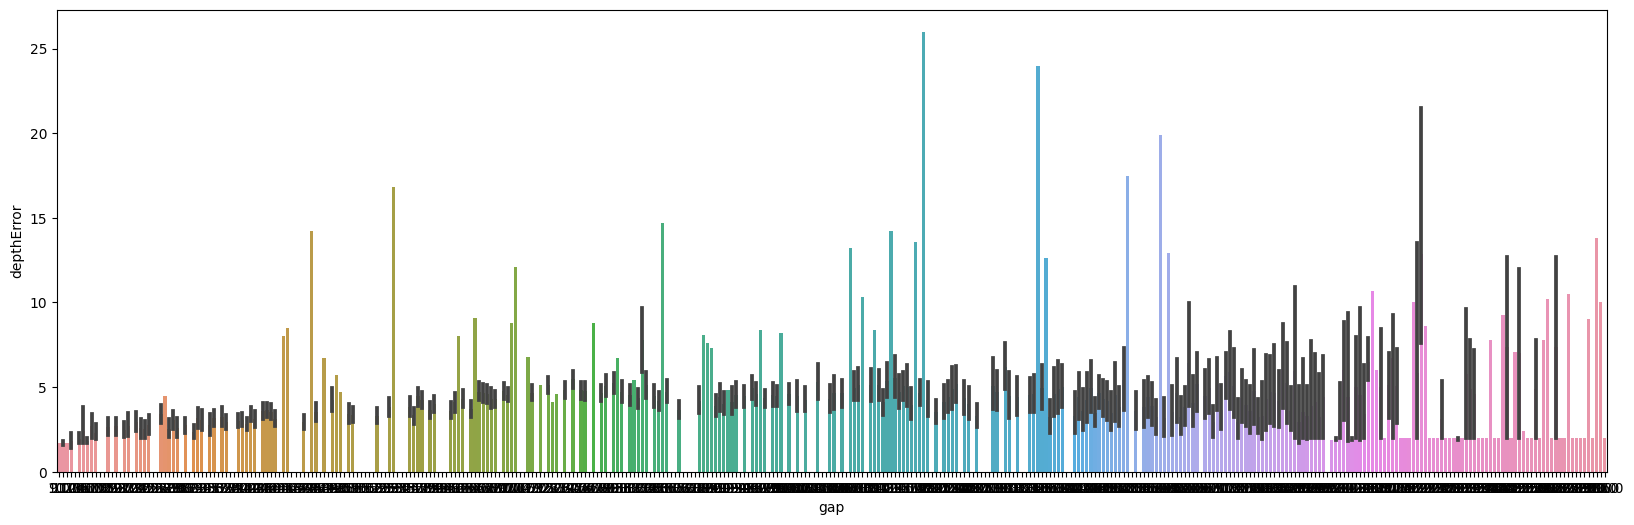

In [ ]:
plt.rcParams['figure.figsize']=(20,6)
sns.barplot(x="gap",y="depthError",data=data)

<Axes: xlabel='magError', ylabel='magNst'>

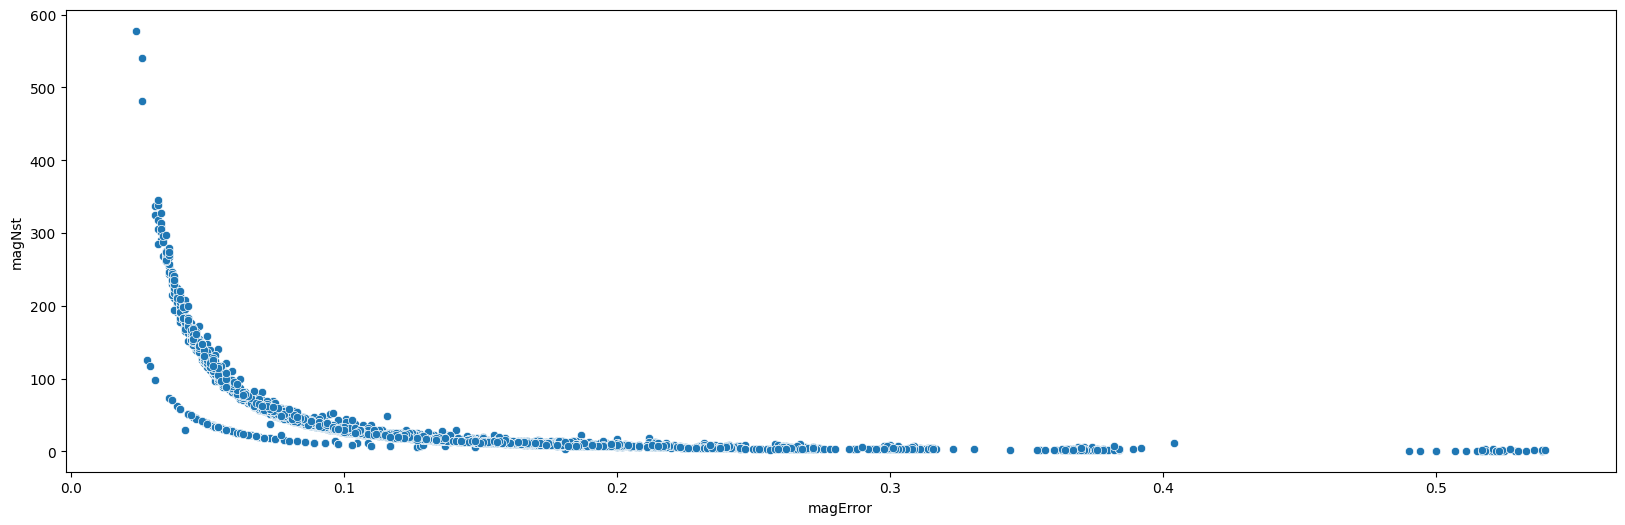

In [ ]:
sns.scatterplot(x="magError",y="magNst",data=data)

**Observation : Significant drop in the magnitude error when the stations for calculating magnitude of the earthquake are increased.**

<Axes: xlabel='depth', ylabel='dmin'>

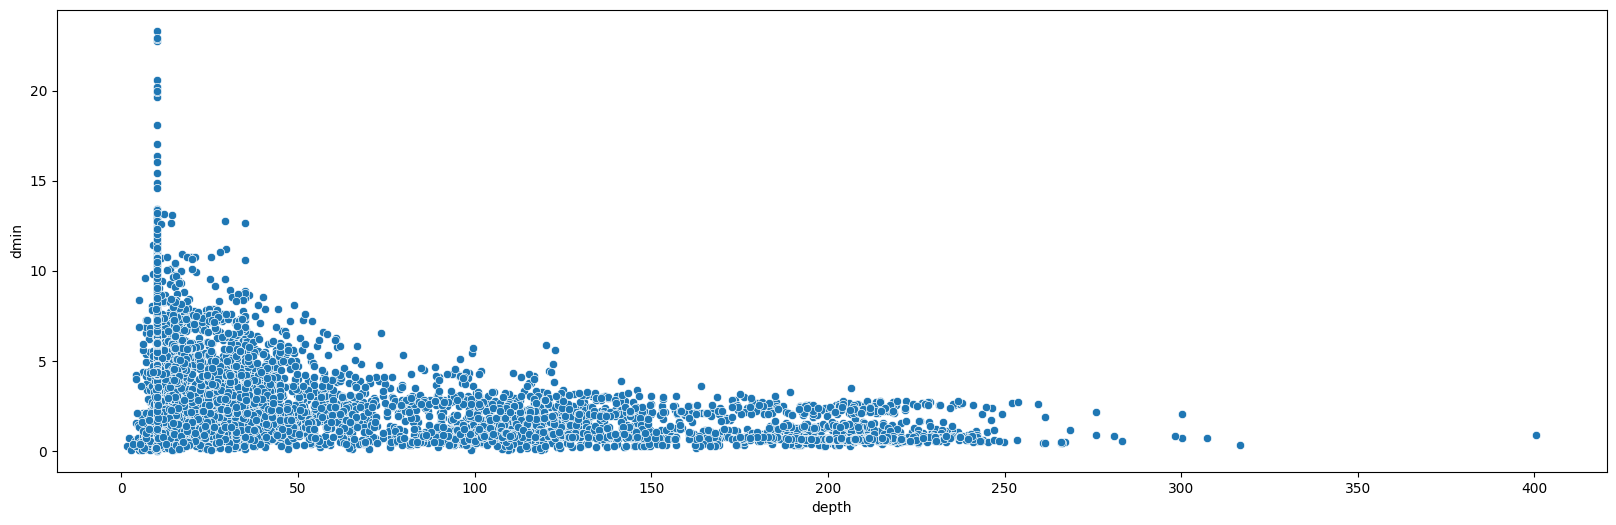

In [ ]:
sns.scatterplot(x="depth",y="dmin",data=data)

**Observation : From the plot, it shows smaller dmin value could be reliable for calculating the increased depth of the earthquake.**

**Changing the datatype of time(object) to datetime**

In [ ]:
data['time']=pd.to_datetime(data['time'])


In [ ]:
data['time'].head()

0   2023-04-25 07:25:02.082000+00:00
1   2023-04-24 14:13:04.988000+00:00
2   2023-04-24 00:21:45.048000+00:00
3   2023-04-23 18:10:43.106000+00:00
4   2023-04-23 16:27:53.084000+00:00
Name: time, dtype: datetime64[ns, UTC]

In [ ]:
data['year']= data['time'].dt.year

In [ ]:
data.head()

time  latitude  longitude    depth  mag magType  \
0 2023-04-25 07:25:02.082000+00:00   44.8695    52.4433   10.388  4.5      mb   
1 2023-04-24 14:13:04.988000+00:00   43.3327    83.7836   10.000  4.4      mb   
2 2023-04-24 00:21:45.048000+00:00   36.4780    70.9118  120.173  4.0      mb   
3 2023-04-23 18:10:43.106000+00:00   37.4855    70.0997    9.686  4.4      mb   
4 2023-04-23 16:27:53.084000+00:00   30.3602    70.9070   39.643  4.8      mb   

    nst    gap   dmin   rms  ...                            place        type  \
0  49.0   52.0  3.670  0.87  ...  84 km NNE of Shetpe, Kazakhstan  earthquake   
1  40.0   85.0  3.136  1.05  ...      44 km ESE of Xinyuan, China  earthquake   
2  29.0   84.0  2.462  0.78  ...     43 km S of Jurm, Afghanistan  earthquake   
3  39.0  122.0  1.454  0.58  ...  37 km ESE of Chubek, Tajikistan  earthquake   
4  16.0  163.0  4.456  0.56  ...  13 km SSW of Kot Addu, Pakistan  earthquake   

  horizontalError depthError magError  magNst    status  locationSource  \
0            8.31      5.457    0.079    48.0  reviewed              us   
1            7.48      1.700    0.104    27.0  reviewed              us   
2            6.09      8.250    0.173     9.0  reviewed              us   
3            6.87      6.011    0.108    25.0  reviewed              us   
4           15.53     10.959    0.109    26.0  reviewed              us   

   magSource  year  
0         us  2023  
1         us  2023  
2         us  2023  
3         us  2023  
4         us  2023  

[5 rows x 23 columns]

In [ ]:
years = data.year.value_counts().index

In [ ]:
years

Int64Index([2015, 2014, 2021, 2022, 2020, 2016, 2018, 2017, 2019, 2013, 2023], dtype='int64')

In [ ]:
year_values= data.year.value_counts().values

([<matplotlib.patches.Wedge at 0x7f4cf981cb80>,
 [Text(1.0216910564404802, 0.407611806980043, '2015'),
  Text(0.5047985058612539, 0.9773323224370746, '2014'),
  Text(-0.20770699365828404, 1.080211925867067, '2021'),
  Text(-0.8214242251119876, 0.7316161851675854, '2022'),
  Text(-1.0945863886825786, 0.10899833811040921, '2020'),
  Text(-0.9623689029434285, -0.5327720850865425, '2016'),
  Text(-0.5139096420077363, -0.972572300577947, '2018'),
  Text(0.06677701880340917, -1.097971233575693, '2017'),
  Text(0.6127657522487626, -0.913519640112356, '2019'),
  Text(0.9900969878849712, -0.47927857721904, '2013'),
  Text(1.0952332325047134, -0.10229450824592909, '2023')],
 [Text(0.5572860307857164, 0.22233371289820525, '12.08%'),
  Text(0.2753446395606839, 0.5330903576929497, '10.66%'),
  Text(-0.11329472381360947, 0.5892065050184001, '10.57%'),
  Text(-0.4480495773338114, 0.39906337372777384, '10.23%'),
  Text(-0.5970471210995884, 0.059453638969314104, '9.78%'),
  Text(-0.5249284925145973, -0

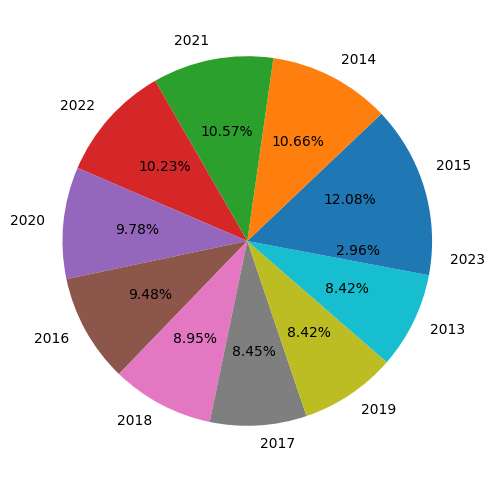

In [ ]:
plt.pie(year_values,labels=years,autopct='%2.2f%%') 

**Observation : plotted the year which has greatest number of earthquakes, 2015 has greatest percentage.**

In [ ]:
data.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                8379
gap                 342
dmin                704
rms                 101
net                   0
id                    0
updated               0
place                62
type                  0
horizontalError    1462
depthError          167
magError            435
magNst              552
status                0
locationSource        0
magSource             0
year                  0
dtype: int64

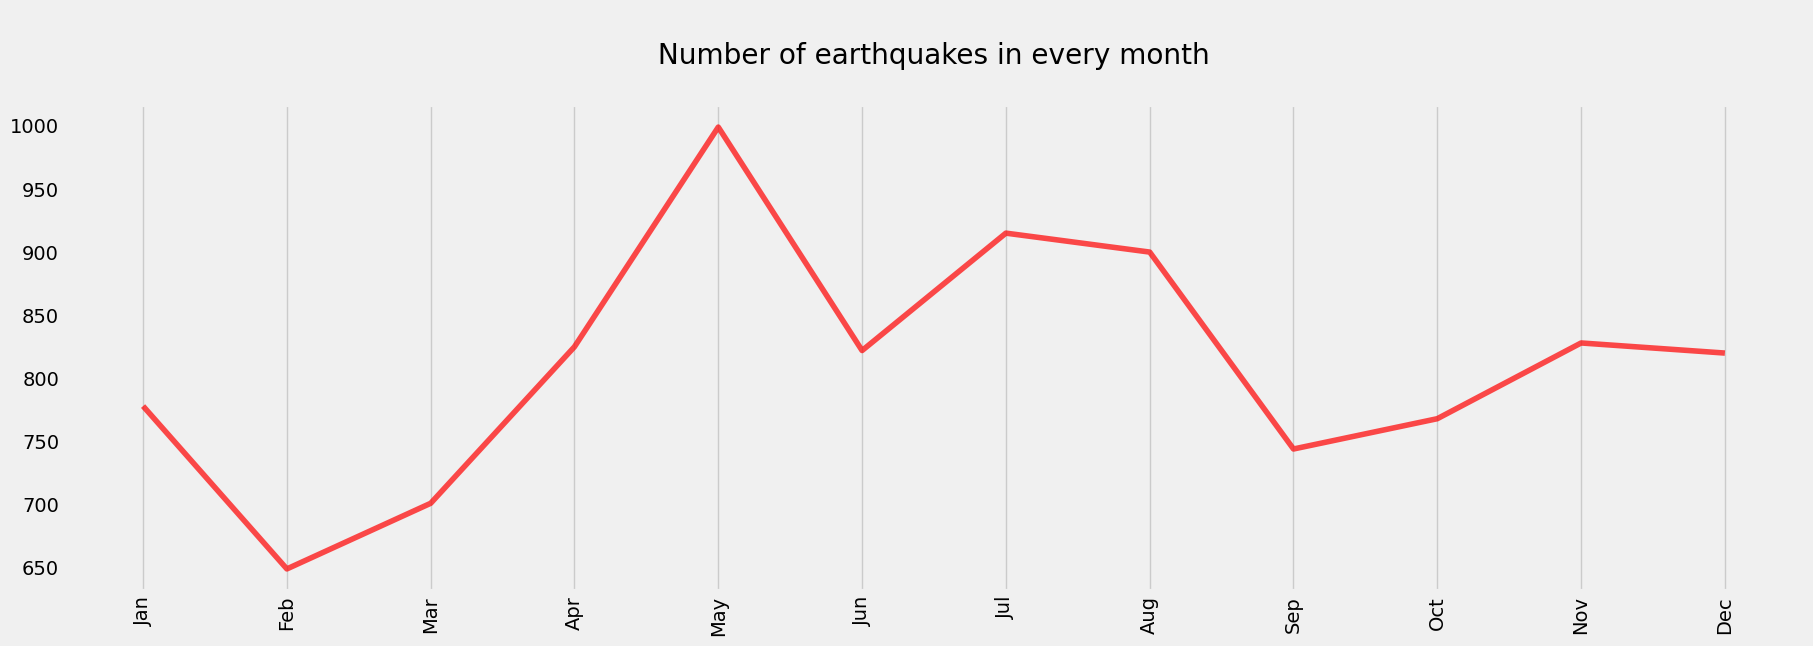

In [ ]:
plt.style.use('fivethirtyeight')
data_month=data['time'].dt.month.value_counts().sort_index()
plt.plot(data_month.index,data_month,color='red',alpha=0.7)
plt.xticks(ticks=range(1,13),labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'],rotation=90)
# plt.set_xlabels=()
plt.title('\n Number of earthquakes in every month \n')
plt.grid(visible=False,axis='y')
plt.show()

**Observation:No.of earthquake occurrence is large in the month of May**

In [ ]:
top_ten_earthquakes=data[data['place'].notnull()].nlargest(10,'mag')
top_ten_earthquakes[['place','mag']]

place  mag
7666     67 km NNE of Bharatpur, Nepal  7.8
9227       113 km NW of Bela, Pakistan  7.7
6932    Hindu Kush region, Afghanistan  7.5
1973           Southern Qinghai, China  7.3
7474                             Nepal  7.3
6789   104 km W of Murghob, Tajikistan  7.2
159   65 km WSW of Murghob, Tajikistan  6.9
6469      76 km SE of Mawlaik, Myanmar  6.9
8815        272 km ESE of Hotan, China  6.9
6080         26 km W of Chauk, Myanmar  6.8

**Observation : Place with top ten Earthquakes with magnitude recorded**

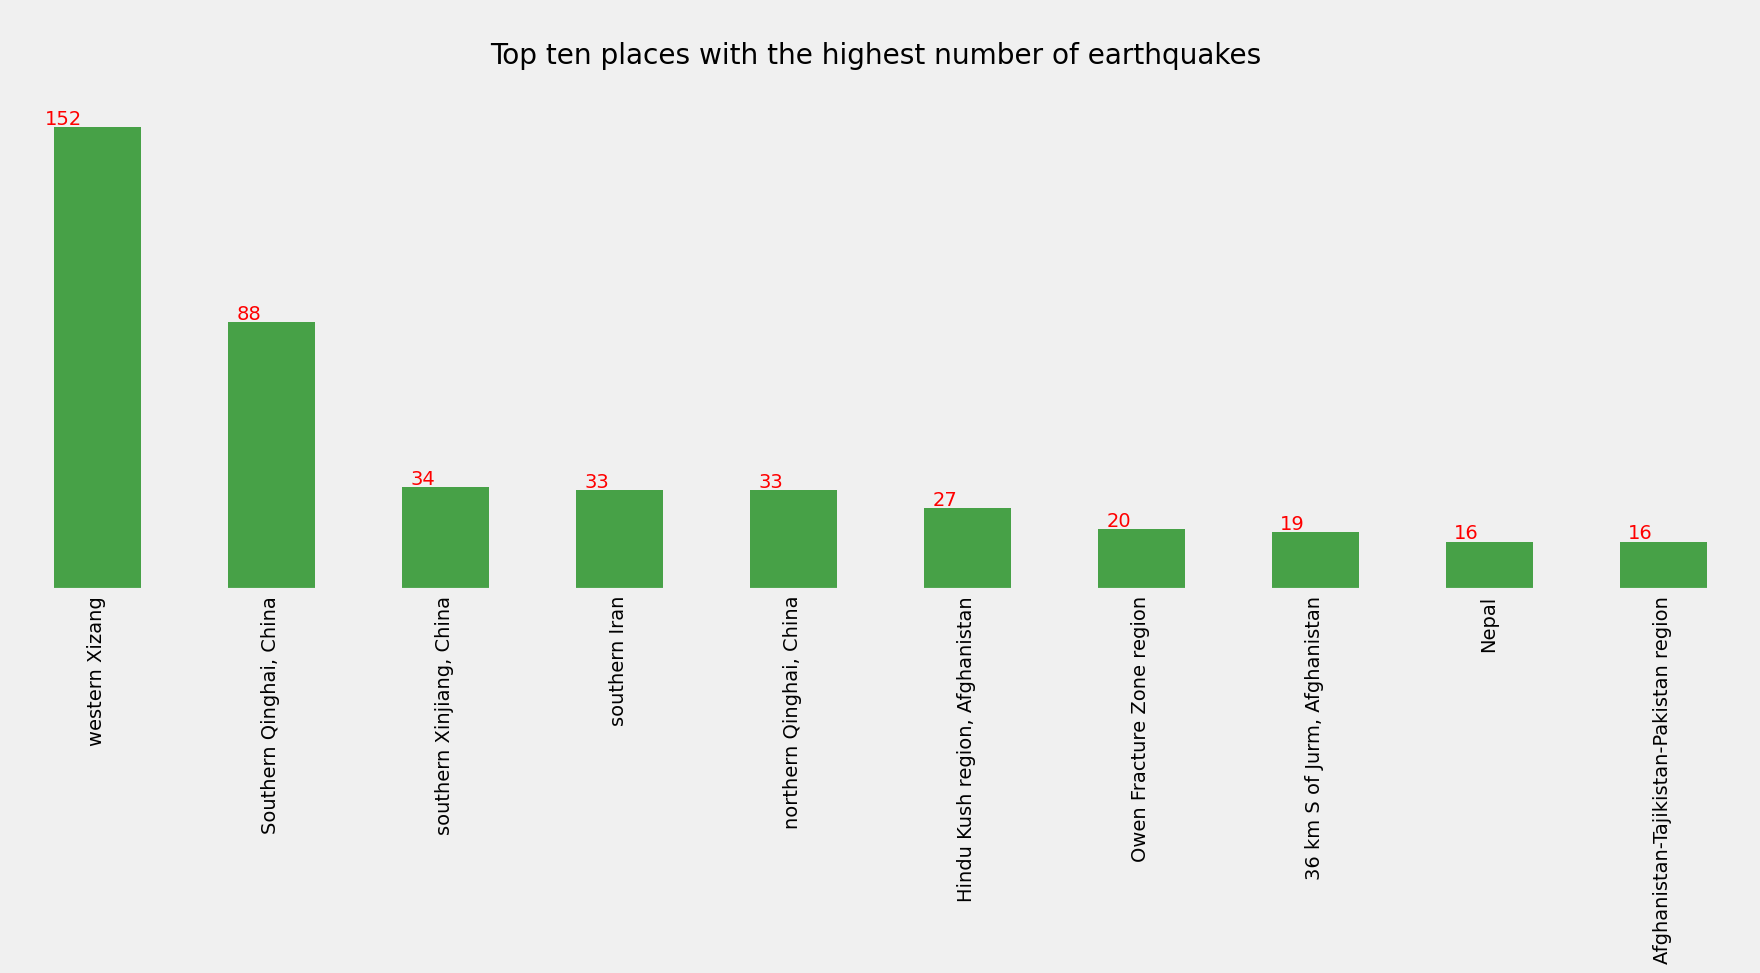

In [ ]:
top_ten_place_count=data.loc[data['place'].notnull(),'place'].value_counts().sort_values(ascending=False)
top_ten_place_count[:10].plot.bar(alpha=0.7,color='green')
plt.grid(visible=False)
# plt.ylim(20,115)
# plt.yticks=(range(20,125,20))
plt.tick_params(labelleft=False, left=False)
plt.title('\nTop ten places with the highest number of earthquakes \n')
plt.text(-0.3,top_ten_place_count[0]+1,top_ten_place_count[0],color='red')
plt.text(0.8,top_ten_place_count[1]+1,top_ten_place_count[1],color='red')
plt.text(1.8,top_ten_place_count[2]+1,top_ten_place_count[2],color='red')
plt.text(2.8,top_ten_place_count[3]+1,top_ten_place_count[3],color='red')
plt.text(3.8,top_ten_place_count[4]+1,top_ten_place_count[4],color='red')
plt.text(4.8,top_ten_place_count[5]+1,top_ten_place_count[5],color='red')
plt.text(5.8,top_ten_place_count[6]+1,top_ten_place_count[6],color='red')
plt.text(6.8,top_ten_place_count[7]+1,top_ten_place_count[7],color='red')
plt.text(7.8,top_ten_place_count[8]+1,top_ten_place_count[8],color='red')
plt.text(8.8,top_ten_place_count[9]+1,top_ten_place_count[9],color='red')
plt.show()

**Observation : Shows top ten places with highest Earthquakes.**

In [ ]:
place_values = data.place.value_counts()
place_values

western Xizang                       152
Southern Qinghai, China               88
southern Xinjiang, China              34
southern Iran                         33
northern Qinghai, China               33
                                    ... 
80 km N of Bandar-e Lengeh, Iran       1
59 km NE of Hashtr?d, Iran             1
35 km ESE of Farkh?r, Afghanistan      1
57 km NE of Hashtr?d, Iran             1
40 km W of Gyalshing, India            1
Name: place, Length: 7480, dtype: int64

In [ ]:
place_names=data.place.value_counts().index

([<matplotlib.patches.Wedge at 0x7f4cf976f2e0>,
 [Text(0.18210925304825704, 1.0848208238940686, 'western Xizang'),
  Text(-0.9754510214705976, -0.5084243352869411, 'Southern Qinghai, China'),
  Text(0.04064677555530494, -1.0992487614898445, 'southern Xinjiang, China'),
  Text(0.6709808234755629, -0.8716563167487836, 'southern Iran'),
  Text(1.0492583503881767, -0.33023766311655334, 'northern Qinghai, China')],
 [Text(0.09933231984450383, 0.5917204493967647, '44.71%'),
  Text(-0.5320641935294168, -0.27732236470196786, '25.88%'),
  Text(0.022170968484711784, -0.5995902335399151, '10.00%'),
  Text(0.3659895400775797, -0.475448900044791, '9.71%'),
  Text(0.572322736575369, -0.1801296344272109, '9.71%')])

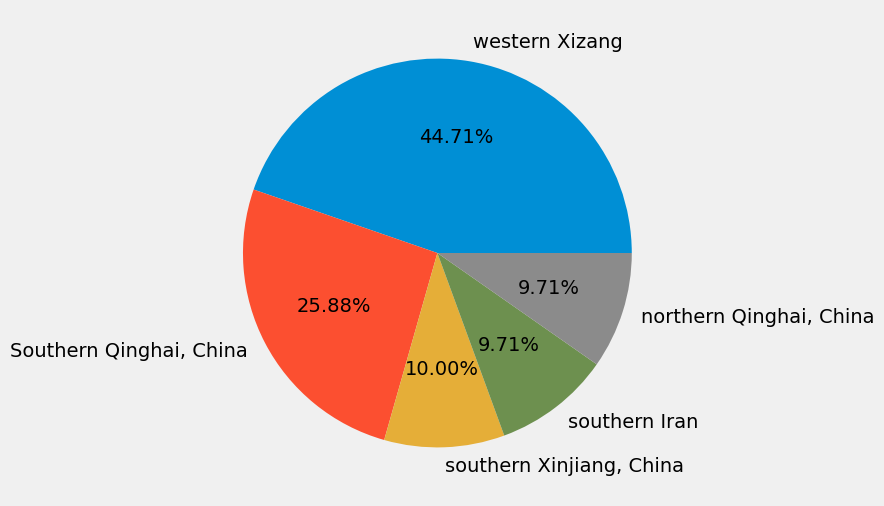

In [ ]:
plt.pie(place_values[:5],labels=place_names[:5],autopct='%1.2f%%')

**Observation:Western Xizang have the highest no.of earthquakes.**



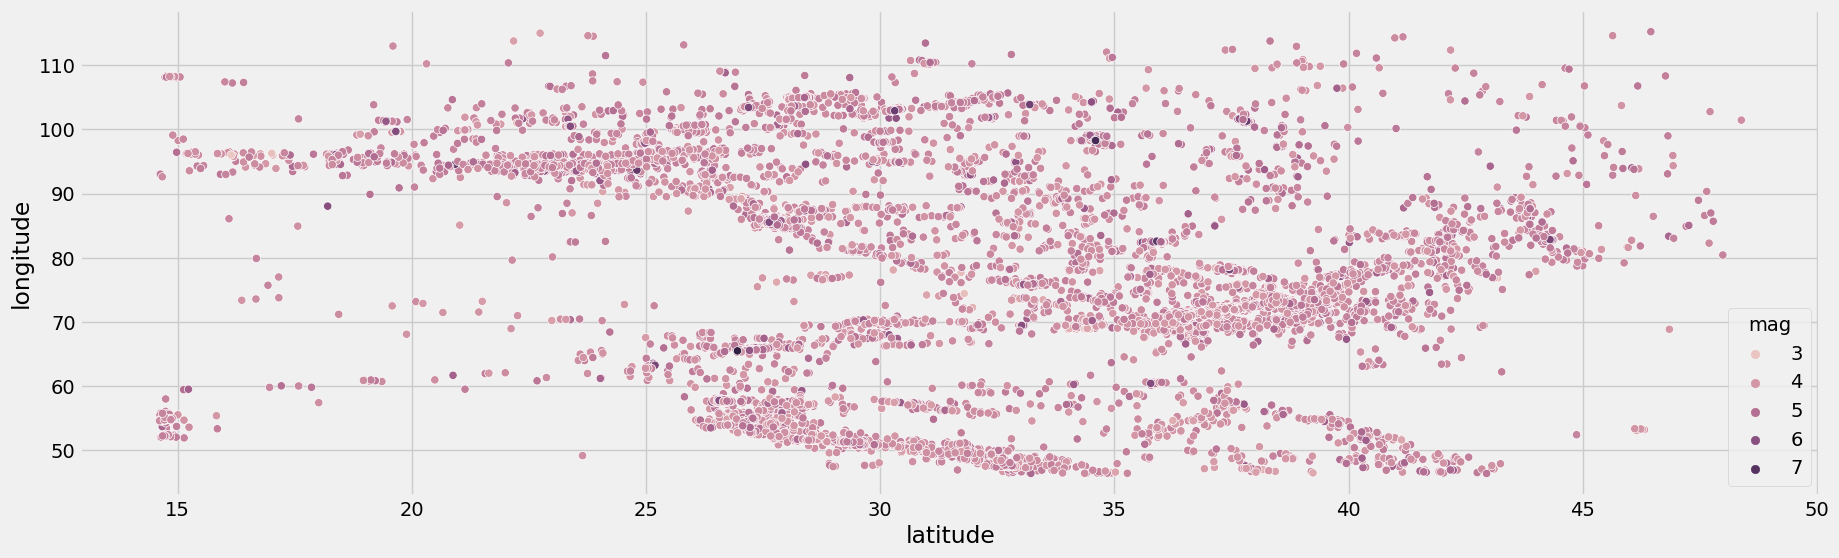

In [ ]:
#Plotting scatter plot of latitude and longitude with magnitude as the hue
sns.scatterplot(x='latitude',y='longitude',hue='mag',data=data,alpha=1);

**Observation : Plotted Latitude and Longitude with the intensity of magnitude of earthquake.**



**VISUALIZING THE EARTHQUAKE SITE OF ALL THE SAMPLES.**

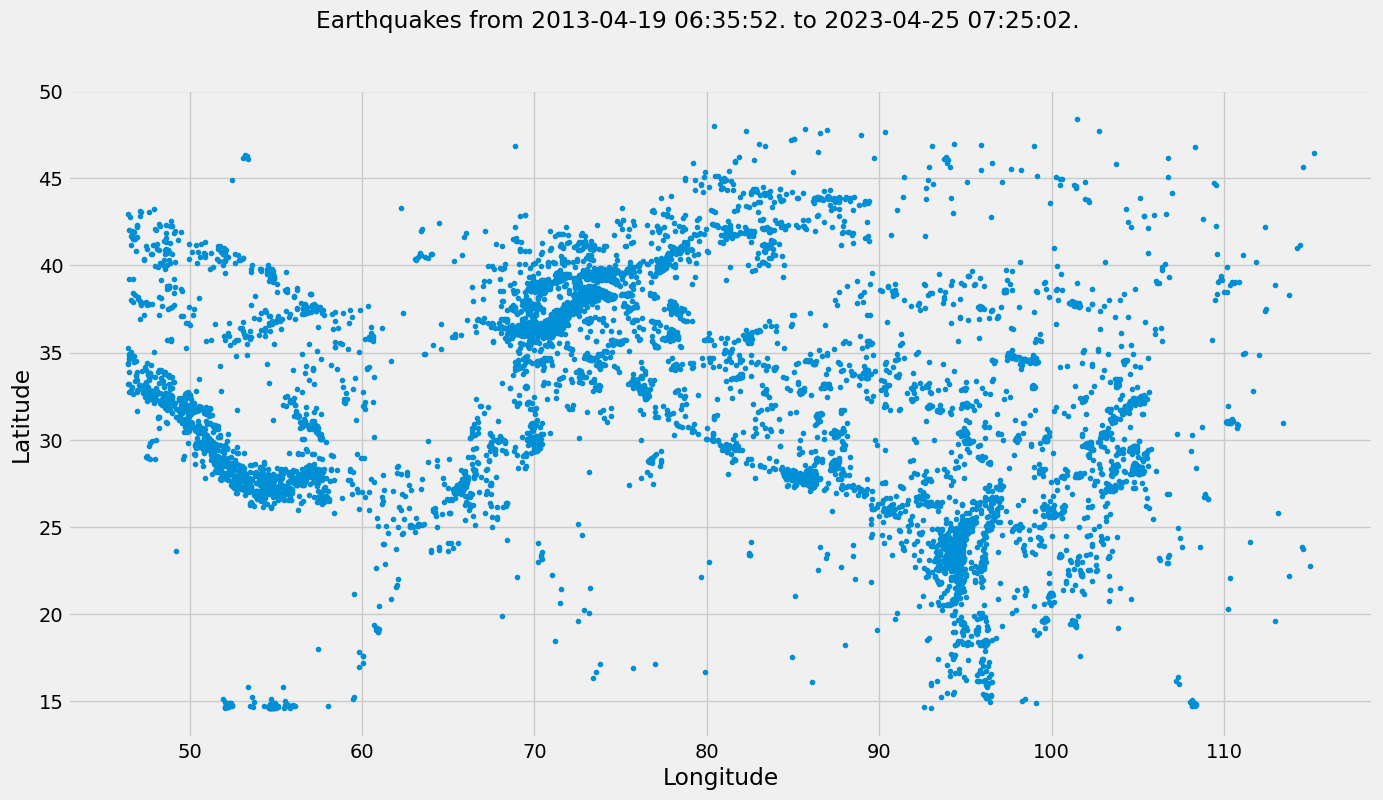

In [ ]:
rounding_factor = 10
fig, ax = plt.subplots(figsize=(15,8))

plt.plot(np.round(data['longitude'],rounding_factor), 
         np.round(data['latitude'],rounding_factor),
         linestyle='none', marker='.')

plt.suptitle('Earthquakes from ' + str(np.min(data['time']))[:20] + ' to ' + str(np.max(data['time']))[:20])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
data.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                8379
gap                 342
dmin                704
rms                 101
net                   0
id                    0
updated               0
place                62
type                  0
horizontalError    1462
depthError          167
magError            435
magNst              552
status                0
locationSource        0
magSource             0
year                  0
dtype: int64

## **DATA PRE-PROCESSING**

**DATA PREPROCESSING -PART 1**

In [ ]:
data.describe()

latitude    longitude        depth          mag          nst  \
count  9749.000000  9749.000000  9749.000000  9749.000000  1370.000000   
mean     32.524655    76.039008    49.132742     4.421865    55.846715   
std       6.123895    16.361299    63.531274     0.375508    47.881686   
min      14.609500    46.407900     1.500000     2.700000     6.000000   
25%      27.832200    68.354900    10.000000     4.200000    27.000000   
50%      33.118500    72.424500    10.530000     4.400000    41.000000   
75%      36.979600    89.662200    61.780000     4.600000    67.000000   
max      48.387600   115.207300   400.570000     7.800000   586.000000   

               gap         dmin          rms  horizontalError   depthError  \
count  9407.000000  9045.000000  9648.000000      8287.000000  9582.000000   
mean     87.688774     3.102512     0.825066         7.192738     4.289706   
std      40.268004     2.485894     0.260522         2.180915     3.000431   
min       9.000000     0.001000     0.130000         1.500000     0.000000   
25%      61.000000     1.087000     0.640000         5.800000     1.900000   
50%      80.000000     2.471000     0.800000         7.100000     2.900000   
75%     108.000000     4.456000     0.980000         8.400000     6.200000   
max     306.000000    23.330000     2.360000        28.900000    30.200000   

          magError       magNst         year  
count  9314.000000  9197.000000  9749.000000  
mean      0.129327    36.043166  2017.670017  
std       0.070151    42.976510     3.009516  
min       0.000000     1.000000  2013.000000  
25%       0.080000    11.000000  2015.000000  
50%       0.115000    21.000000  2018.000000  
75%       0.159000    42.000000  2020.000000  
max       0.540000   578.000000  2023.000000

In [ ]:
data.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                8379
gap                 342
dmin                704
rms                 101
net                   0
id                    0
updated               0
place                62
type                  0
horizontalError    1462
depthError          167
magError            435
magNst              552
status                0
locationSource        0
magSource             0
year                  0
dtype: int64

In [ ]:
#code for handling missing values in the place column

def fill_place(data):
    for index, row in data.iterrows():
        if pd.isnull(row['place']):
            lat = row['latitude']
            lon = row['longitude']
            location = geolocator.reverse((lat, lon), exactly_one=True, language='en')
            if location is not None:
                address = location.raw['address']
                city = address.get('city')
                state = address.get('state')
                country = address.get('country')
                if city and state and country:
                    place = f"{city}, {state}, {country}"
                elif city and state:
                    place = f"{city}, {state}"
                elif state and country:
                    place = f"{state}, {country}"
                elif city and country:
                    place = f"{city}, {country}"
                elif city:
                    place = city
                elif state:
                    place = state
                else:
                    place = country
            else:
                place = 'Unknown'
            data.at[index, 'place'] = place
    return data


In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="myapp")

# Fill in missing place values using the fill_place function
data_filled = fill_place(data)

# Merge the filled data frame with the original data frame using the index
data_merged = pd.merge(data, data_filled[['place']], how='left', left_index=True, right_index=True)

# Replace null values in 'place' column with filled values
data_merged['place'] = data_merged['place_y'].fillna(data_merged['place_x'])

# Drop extra columns
data_merged.drop(['place_x', 'place_y'], axis=1, inplace=True)


In [ ]:
data.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                8379
gap                 342
dmin                704
rms                 101
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    1462
depthError          167
magError            435
magNst              552
status                0
locationSource        0
magSource             0
year                  0
dtype: int64

In [ ]:
cols = ['depth','depthError']
X = data[cols]
X

depth  depthError
0      10.388       5.457
1      10.000       1.700
2     120.173       8.250
3       9.686       6.011
4      39.643      10.959
...       ...         ...
9744    8.000         NaN
9745   19.000         NaN
9746   25.500       5.300
9747  188.600      30.200
9748   47.100       9.500

[9749 rows x 2 columns]

In [ ]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=5)
X_imputed=impute_knn.fit_transform(X)

In [ ]:
# Replace missing 'dmin' values in the original dataset with imputed values
data['depthError'] = X_imputed[:, 1]

In [ ]:
data.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                8379
gap                 342
dmin                704
rms                 101
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    1462
depthError            0
magError            435
magNst              552
status                0
locationSource        0
magSource             0
year                  0
dtype: int64

<Axes: xlabel='depthError', ylabel='Density'>

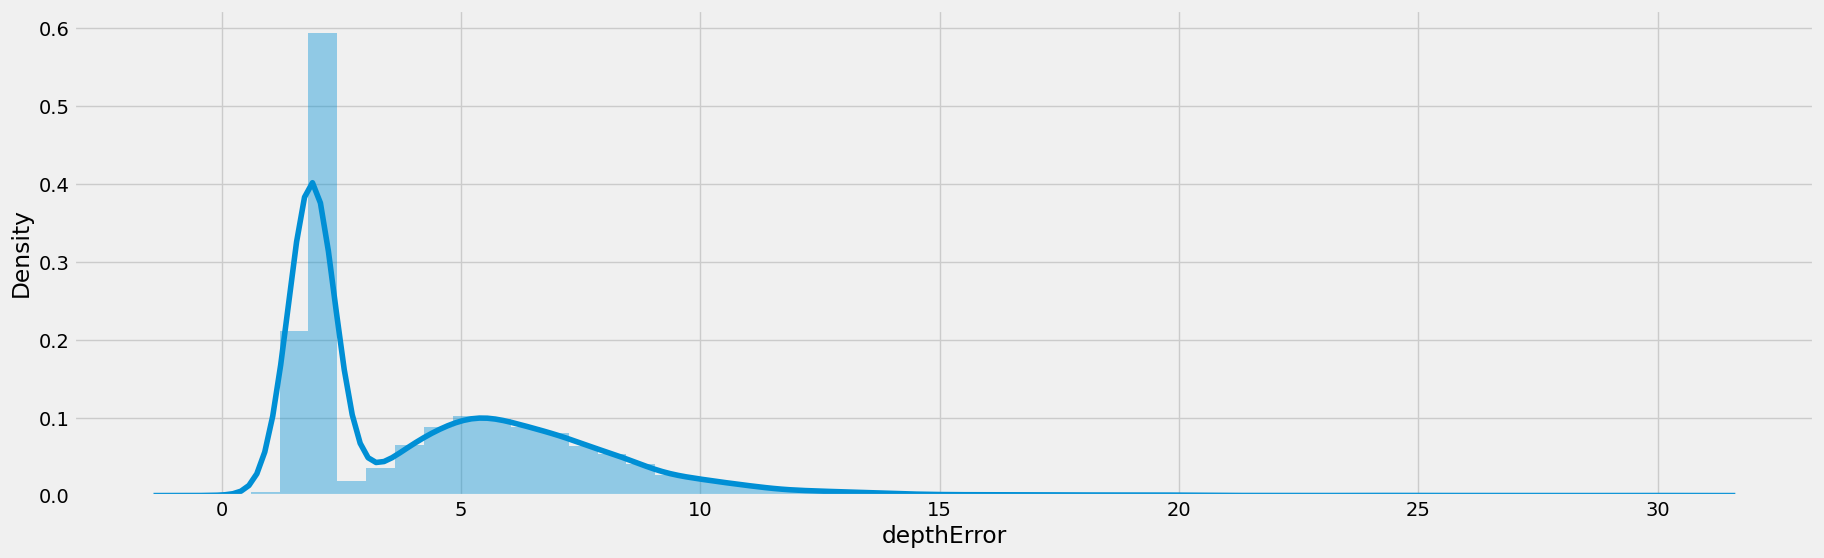

In [ ]:
sns.distplot(data.depthError)

In [ ]:
data['depthError'].head()

0     5.457
1     1.700
2     8.250
3     6.011
4    10.959
Name: depthError, dtype: float64

In [ ]:
#for handling missing values in dmin column using depth
cols = ['depth','dmin']
X = data[cols]
X

depth   dmin
0      10.388  3.670
1      10.000  3.136
2     120.173  2.462
3       9.686  1.454
4      39.643  4.456
...       ...    ...
9744    8.000    NaN
9745   19.000    NaN
9746   25.500    NaN
9747  188.600    NaN
9748   47.100    NaN

[9749 rows x 2 columns]

In [ ]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=5)
X_imputed=impute_knn.fit_transform(X)

In [ ]:
# Replace missing 'dmin' values in the original dataset with imputed values
data['dmin'] = X_imputed[:, 1]

In [ ]:
data.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                8379
gap                 342
dmin                  0
rms                 101
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    1462
depthError            0
magError            435
magNst              552
status                0
locationSource        0
magSource             0
year                  0
dtype: int64

In [ ]:
data['dmin'].tail(15)

9734    6.2186
9735    6.2186
9736    6.2186
9737    6.2186
9738    6.2186
9739    6.2186
9740    6.2186
9741    6.2186
9742    4.0988
9743    4.9986
9744    4.0180
9745    2.1344
9746    4.9986
9747    1.0846
9748    1.4106
Name: dmin, dtype: float64

In [ ]:
#for handling missing values in magError column using mag
cols = ['mag','magError']
X = data[cols]
X

mag  magError
0     4.5     0.079
1     4.4     0.104
2     4.0     0.173
3     4.4     0.108
4     4.8     0.109
...   ...       ...
9744  4.3       NaN
9745  4.4       NaN
9746  4.4       NaN
9747  4.1       NaN
9748  4.2       NaN

[9749 rows x 2 columns]

In [ ]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=5)
imputed_X=impute_knn.fit_transform(X)

In [ ]:
# Replace missing 'magError' values in the original dataset with imputed values
data['magError'] = imputed_X[:, 1]

In [ ]:
data.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                8379
gap                 342
dmin                  0
rms                 101
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    1462
depthError            0
magError              0
magNst              552
status                0
locationSource        0
magSource             0
year                  0
dtype: int64

In [ ]:
data['magError'].tail(500)

9249    0.0700
9250    0.1680
9251    0.0860
9252    0.0600
9253    0.0820
         ...  
9744    0.0992
9745    0.0972
9746    0.0972
9747    0.1798
9748    0.1512
Name: magError, Length: 500, dtype: float64

In [ ]:
#for handling missing values in magNst column using mag and magError
cols = ['mag','magError','magNst']
X = data[cols]
X

mag  magError  magNst
0     4.5    0.0790    48.0
1     4.4    0.1040    27.0
2     4.0    0.1730     9.0
3     4.4    0.1080    25.0
4     4.8    0.1090    26.0
...   ...       ...     ...
9744  4.3    0.0992    31.0
9745  4.4    0.0972    42.0
9746  4.4    0.0972    13.0
9747  4.1    0.1798     1.0
9748  4.2    0.1512     6.0

[9749 rows x 3 columns]

In [ ]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=5)
imputed_X=impute_knn.fit_transform(X)

In [ ]:
# Replace missing magNst values in the original dataset with imputed values
data['magNst'] = imputed_X[:,2]

In [ ]:
data.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                8379
gap                 342
dmin                  0
rms                 101
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    1462
depthError            0
magError              0
magNst                0
status                0
locationSource        0
magSource             0
year                  0
dtype: int64

In [ ]:
data['magNst'].unique()

array([ 48. ,  27. ,   9. ,  25. ,  26. ,  41. ,  23. ,  13. ,  18. ,
        45. ,  11. ,  46. ,  10. ,   6. ,  56. ,  59. ,  97. ,   8. ,
        38. ,  33. ,  24. ,  17. ,  53. ,  35. ,  14. , 179. ,  75. ,
         5. ,   3. , 163. ,  19. ,  32. ,  64. ,   7. , 165. ,  40. ,
        43. ,   1. ,  22. ,   4. ,  74. ,  12. ,  37. ,  96. , 150. ,
        31. ,  80. ,  21. ,  30. ,  57. ,  29. ,  44. , 174. ,  77. ,
        71. ,  83. , 178. ,  20. , 164. ,  28. ,  78. ,  15. ,  91. ,
       113. ,  62. , 100. , 121. , 103. , 114. ,   2. ,  52. ,  76. ,
        34. , 109. , 140. ,  16. ,  50. , 139. , 105. ,  60. ,  39. ,
        47. ,  42. , 184. ,  55. ,  70. ,  36. ,  85. , 194. , 117. ,
       124. ,  63. ,  72. ,  87. ,  54. , 142. , 131. , 125. ,  88. ,
        58. , 112. ,  49. , 177. ,  51. ,  98. ,  69. , 106. , 115. ,
        89. ,  65. ,  84. , 107. , 137. , 218. , 104. ,  86. , 158. ,
       144. , 123. , 175. , 232. , 101. , 111. , 167. , 102. , 141. ,
       208. , 128. ,

In [ ]:
data['magNst'] = data['magNst'].astype(int)

In [ ]:
data['magNst'].unique()

array([ 48,  27,   9,  25,  26,  41,  23,  13,  18,  45,  11,  46,  10,
         6,  56,  59,  97,   8,  38,  33,  24,  17,  53,  35,  14, 179,
        75,   5,   3, 163,  19,  32,  64,   7, 165,  40,  43,   1,  22,
         4,  74,  12,  37,  96, 150,  31,  80,  21,  30,  57,  29,  44,
       174,  77,  71,  83, 178,  20, 164,  28,  78,  15,  91, 113,  62,
       100, 121, 103, 114,   2,  52,  76,  34, 109, 140,  16,  50, 139,
       105,  60,  39,  47,  42, 184,  55,  70,  36,  85, 194, 117, 124,
        63,  72,  87,  54, 142, 131, 125,  88,  58, 112,  49, 177,  51,
        98,  69, 106, 115,  89,  65,  84, 107, 137, 218, 104,  86, 158,
       144, 123, 175, 232, 101, 111, 167, 102, 141, 208, 128,  73, 126,
        61, 200,  81, 147,  68,  92, 215, 119,  99,  95, 269, 192, 132,
       186, 154, 216, 135, 127, 183, 201,  94, 206,  67, 188, 171, 155,
        82,  90, 235, 181,  79, 265, 133, 118,  93,  66, 196, 185, 136,
       108, 275, 145, 156, 197, 149, 237, 302, 207, 173, 290, 15

In [ ]:
#for handling missing values in horizontalError column using dmin
cols = ['dmin','horizontalError']
X = data[cols]
X

dmin  horizontalError
0     3.6700             8.31
1     3.1360             7.48
2     2.4620             6.09
3     1.4540             6.87
4     4.4560            15.53
...      ...              ...
9744  4.0180              NaN
9745  2.1344              NaN
9746  4.9986              NaN
9747  1.0846              NaN
9748  1.4106              NaN

[9749 rows x 2 columns]

In [ ]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=5)
imputed_X=impute_knn.fit_transform(X)

In [ ]:
# Replace missing horizontalError values in the original dataset with imputed values
data['horizontalError'] = imputed_X[:,1]

In [ ]:
data.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                8379
gap                 342
dmin                  0
rms                 101
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError       0
depthError            0
magError              0
magNst                0
status                0
locationSource        0
magSource             0
year                  0
dtype: int64

In [ ]:
data['horizontalError'].head(15)

0      8.31
1      7.48
2      6.09
3      6.87
4     15.53
5      8.91
6      4.05
7      5.68
8      6.82
9      3.40
10     9.42
11     3.64
12     6.36
13     9.07
14     7.05
Name: horizontalError, dtype: float64

In [ ]:
#handling missing values in the rms column using median 
data['rms'].fillna(data['rms'].median(),inplace=True)

In [ ]:
data['rms'].head()

0    0.87
1    1.05
2    0.78
3    0.58
4    0.56
Name: rms, dtype: float64

In [ ]:
#for handling missing values in gap


Handling null values in nst column usimg KNN imputation

In [ ]:
cols = ['mag','magNst','nst']
X = data[cols]
X

mag  magNst   nst
0     4.5      48  49.0
1     4.4      27  40.0
2     4.0       9  29.0
3     4.4      25  39.0
4     4.8      26  16.0
...   ...     ...   ...
9744  4.3      31  52.0
9745  4.4      42  55.0
9746  4.4      13  42.0
9747  4.1       1  17.0
9748  4.2       6  17.0

[9749 rows x 3 columns]

In [ ]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=5)
X_imputed = impute_knn.fit_transform(X)

In [ ]:
data['nst'] = X_imputed[:, 2]

In [ ]:
data['nst'].head()

0    49.0
1    40.0
2    29.0
3    39.0
4    16.0
Name: nst, dtype: float64

In [ ]:
data.isna().sum()

time                 0
latitude             0
longitude            0
depth                0
mag                  0
magType              0
nst                  0
gap                342
dmin                 0
rms                  0
net                  0
id                   0
updated              0
place                0
type                 0
horizontalError      0
depthError           0
magError             0
magNst               0
status               0
locationSource       0
magSource            0
year                 0
dtype: int64

In [ ]:
data[['nst','mag','magNst']].corr()

nst       mag    magNst
nst     1.000000  0.726326  0.668261
mag     0.726326  1.000000  0.519592
magNst  0.668261  0.519592  1.000000

In [ ]:
data['nst'].unique()

array([ 49. ,  40. ,  29. ,  39. ,  16. ,  47. ,  21. ,  44. ,  97. ,
        24. ,  19. ,  67. ,  41. ,  59. ,  27. ,  56. ,  36. ,  22. ,
        28. ,  35. ,  55. ,  25. ,  96. , 105. , 122. ,  33. ,  50. ,
        61. ,  17. ,  71. ,  37. ,  60. ,   6. ,  30. ,  32. ,   9. ,
        70. ,  93. ,  42. ,  73. , 176. ,  46. ,  23. ,  18. , 170. ,
        90. , 164. ,  34. ,  66. , 115. , 149. , 137. ,  43. ,  58. ,
        77. ,  89. ,  48. , 146. ,  52. ,  98. ,  20. ,  31. ,  51. ,
       103. ,  62. ,  65. ,  83. ,  88. ,  26. ,  38. , 117. ,  57. ,
        63. , 151. ,  14. ,  45. , 106. , 300. ,  80. , 256. ,  91. ,
       107. ,  12. , 132. ,  54. ,  81. ,  78. , 111. ,  76. ,  15. ,
       135. , 134. , 206. , 127. , 110. ,  72. , 108. , 121. , 119. ,
        84. ,  75. ,  68. ,  87. , 101. ,  95. , 172. , 120. , 186. ,
        94. , 126. , 136. ,  92. ,  64. , 104. , 182. , 268. ,  53. ,
       102. ,  10. , 114. , 112. , 113. ,  74. , 161. , 141. , 123. ,
       215. ,  82. ,

In [ ]:
data['nst'].dtype

dtype('float64')

In [ ]:
data['nst'] = data['nst'].astype(int) #Changing the value to integer since the number of stations should be in integer.

In [ ]:
#handling values in gap column

In [ ]:
data['nst'].head()

0    49
1    40
2    29
3    39
4    16
Name: nst, dtype: int64

In [ ]:
cols = ['magError','nst','gap']
X = data[cols]
X

magError  nst    gap
0       0.0790   49   52.0
1       0.1040   40   85.0
2       0.1730   29   84.0
3       0.1080   39  122.0
4       0.1090   16  163.0
...        ...  ...    ...
9744    0.0992   52  100.0
9745    0.0972   55  100.0
9746    0.0972   42   59.0
9747    0.1798   17  116.0
9748    0.1512   17  169.0

[9749 rows x 3 columns]

In [ ]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=5)
imputed_X=impute_knn.fit_transform(X)

In [ ]:
data.isna().sum()

time                 0
latitude             0
longitude            0
depth                0
mag                  0
magType              0
nst                  0
gap                342
dmin               704
rms                  0
net                  0
id                   0
updated              0
place               62
type                 0
horizontalError      0
depthError         167
magError             0
magNst               0
status               0
locationSource       0
magSource            0
year                 0
dtype: int64

In [ ]:
data['gap'] = imputed_X[:,2]

In [ ]:
data.isna().sum()

time                 0
latitude             0
longitude            0
depth                0
mag                  0
magType              0
nst                  0
gap                  0
dmin               704
rms                  0
net                  0
id                   0
updated              0
place               62
type                 0
horizontalError      0
depthError         167
magError             0
magNst               0
status               0
locationSource       0
magSource            0
year                 0
dtype: int64

Dropping columns no longer required.

In [ ]:
data=data.drop(['net', 'id', 'updated','type','status','locationSource', 'magSource','year'],axis=1)

In [ ]:
data.isna().sum()

time                 0
latitude             0
longitude            0
depth                0
mag                  0
magType              0
nst                  0
gap                  0
dmin               704
rms                  0
place               62
horizontalError      0
depthError         167
magError             0
magNst               0
dtype: int64

<Axes: >

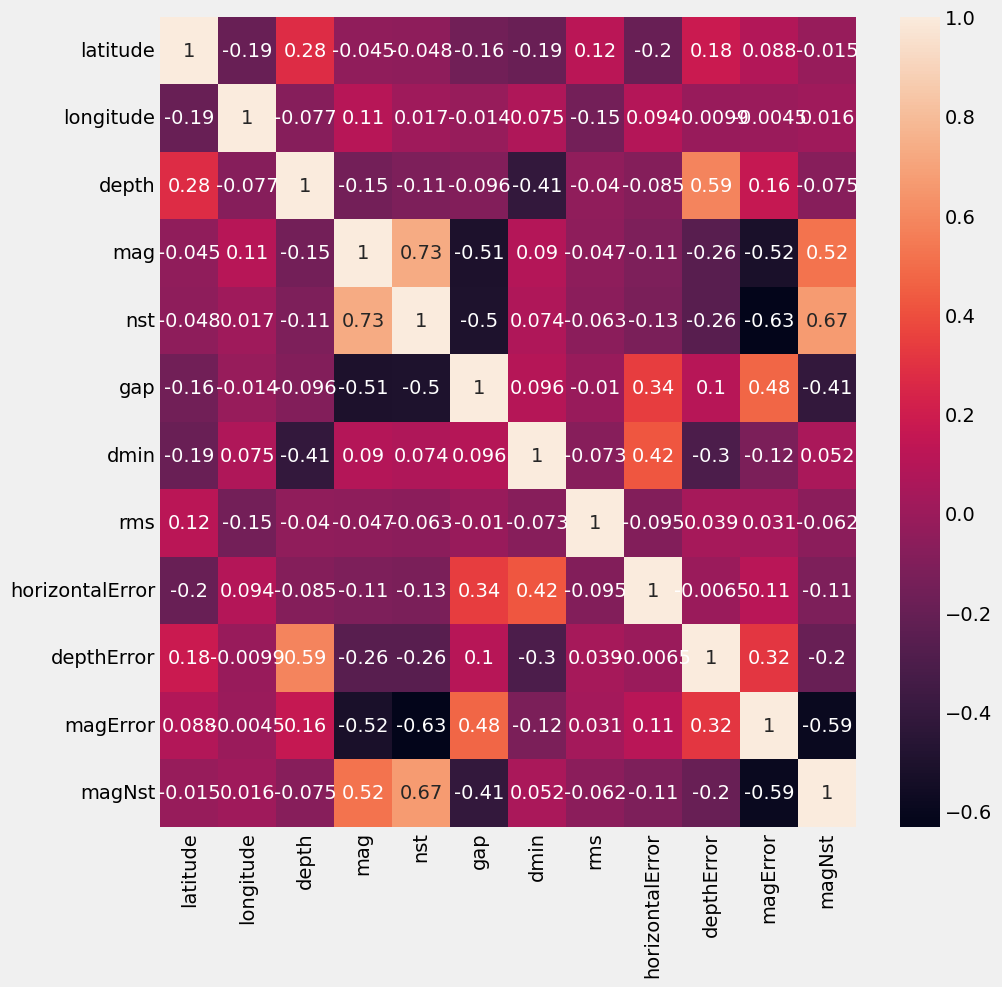

In [ ]:
plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

## **Handling Outliers**









p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test.
sample data does not come from a normal distribution.

In [ ]:
from scipy.stats import shapiro 
shapiro(data['depthError'])

ShapiroResult(statistic=nan, pvalue=1.0)

the skewness value should be between -1 and +1 
 If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed. 

In [ ]:

print(data['depthError'].skew())

1.4520015337623868


In [ ]:
from scipy.stats import shapiro 
shapiro(data['gap'])

ShapiroResult(statistic=0.9482449293136597, pvalue=0.0)

In [ ]:
print(data['gap'].skew())
#moderate skewness

0.9970691191486941


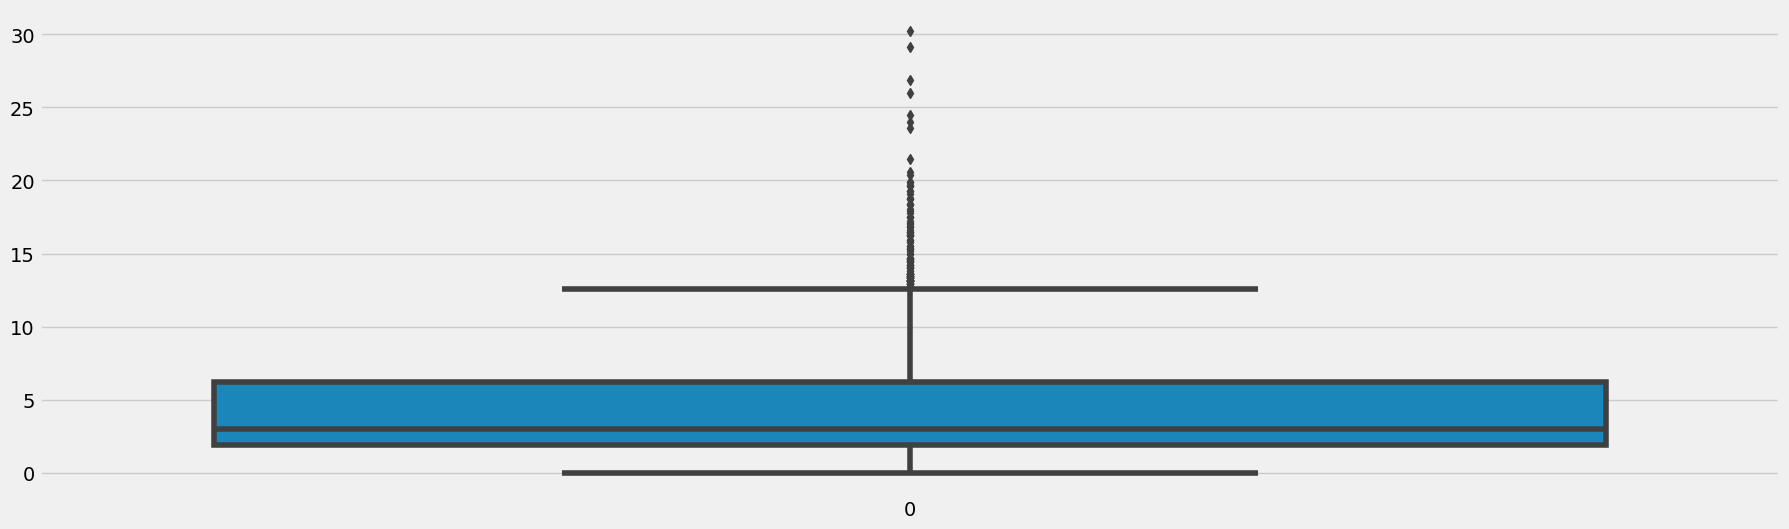

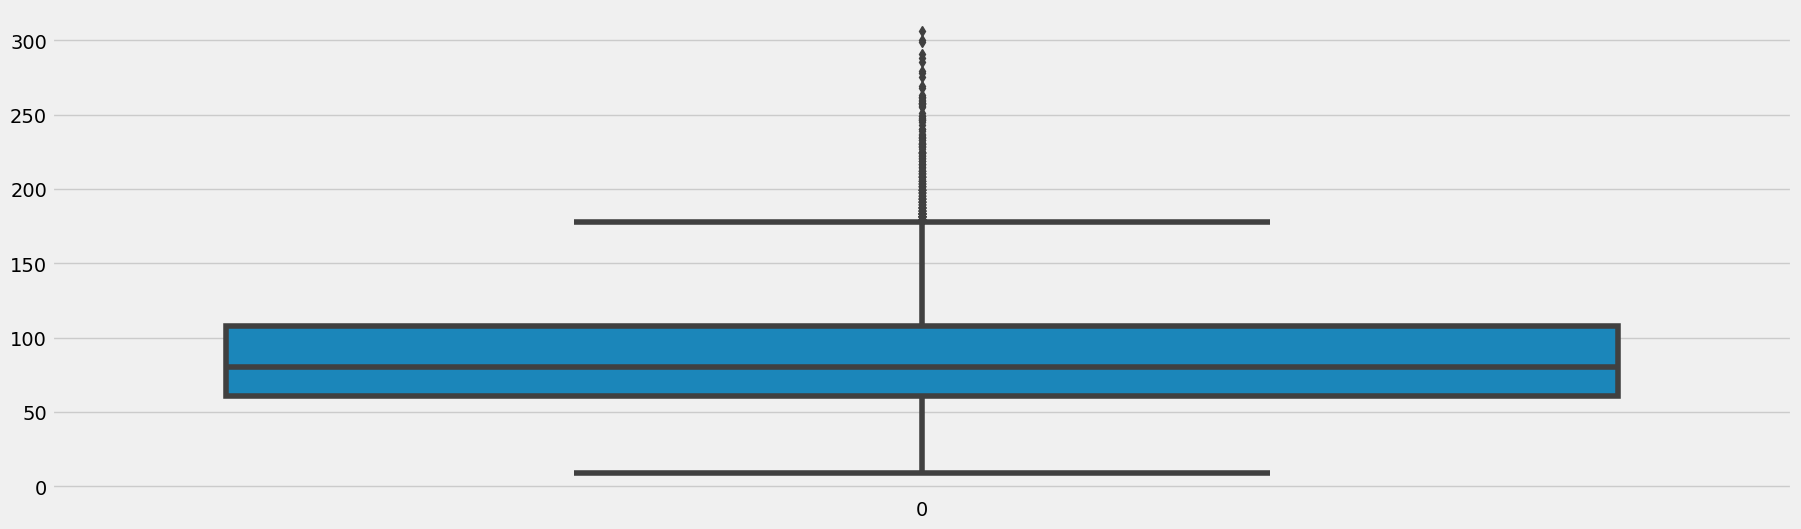

In [ ]:
for i in ['depthError','gap']:
 sns.boxplot(data[i])
 plt.show()

In [ ]:
#finding Q1,Q2,Q3 of depthError
Q1=np.percentile(data['depthError'],25,interpolation='midpoint')
Q2=np.percentile(data['depthError'],50,interpolation='midpoint')
Q3=np.percentile(data['depthError'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

1.9
3.0
6.2


In [ ]:
#finding IQR
IQR=stats.iqr(data.depthError,interpolation="midpoint")
IQR

4.300000000000001

In [ ]:
#finding min and max limit
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-4.550000000000001, 12.650000000000002)

In [ ]:
#finding points greater than max limit as outliners
data.loc[data.depthError>max_limit]

time  latitude  longitude    depth  mag  \
13   2023-04-12 03:37:36.670000+00:00   36.5066    70.6973  195.302  4.1   
21   2023-04-08 14:44:48.927000+00:00   28.7306    86.7005   57.329  4.3   
47   2023-03-29 00:34:59.215000+00:00   36.5043    70.2756  199.223  4.0   
51   2023-03-27 00:16:10.345000+00:00   37.3354    71.6561  139.250  4.0   
164  2023-02-21 11:35:18.592000+00:00   36.2010    70.0083  171.083  4.1   
...                               ...       ...        ...      ...  ...   
9672 2013-04-30 15:44:14.440000+00:00   36.3680    71.1130  133.700  4.1   
9680 2013-04-27 03:17:13.120000+00:00   27.6080    92.9920   28.900  4.1   
9695 2013-04-23 15:08:26.390000+00:00   28.1140    62.0250   28.000  4.0   
9732 2013-04-20 01:31:42.840000+00:00   30.3570   103.3120    6.300  4.4   
9747 2013-04-19 08:32:24.880000+00:00   36.5830    70.8020  188.600  4.1   

     magType  nst    gap    dmin   rms                               place  \
13        mb   21   88.0  2.3810  0.31      Hindu Kush region, Afghanistan   
21        mb   22  138.0  0.7750  0.63           87 km N of Lobujya, Nepal   
47        mb    9  112.0  2.2020  0.57   38 km ESE of Farkh?r, Afghanistan   
51        mb   22   76.0  2.1420  0.59    19 km SSE of Khorugh, Tajikistan   
164       mb   22   91.0  1.8350  0.27   43 km SSE of Farkh?r, Afghanistan   
...      ...  ...    ...     ...   ...                                 ...   
9672      mb   17  106.7  1.5502  1.09  51 km SW of Ashk?sham, Afghanistan   
9680      mb   27  152.3  4.7548  0.78          67 km NE of Bomdila, India   
9695      mb   12  118.4  1.7636  0.84              80 km E of Kh?sh, Iran   
9732      mb   53   85.7  1.5168  0.77        15 km WSW of Linqiong, China   
9747      mb   17  116.0  1.0846  0.54        31 km S of Jurm, Afghanistan   

      horizontalError  depthError  magError  magNst  
13               9.07      13.394    0.2140       6  
21               7.04      16.483    0.1080      24  
47               8.27      18.022    0.2600       4  
51               7.17      13.148    0.2580       4  
164              8.17      14.957    0.2340       5  
...               ...         ...       ...     ...  
9672             6.76      13.200    0.1798       1  
9680             7.46      17.500    0.1798       5  
9695             5.50      26.000    0.1636       4  
9732             6.48      14.700    0.0972      23  
9747             6.80      30.200    0.1798       1  

[121 rows x 15 columns]

In [ ]:
#finding points less than min limit as outliners
data.loc[data.depthError<min_limit]

Empty DataFrame
Columns: [time, latitude, longitude, depth, mag, magType, nst, gap, dmin, rms, place, horizontalError, depthError, magError, magNst]
Index: []

Removing Outliers using capping technique 
capping imputes the outliers with some other values.
1.   values can be mean, median or mode or any constant value also (that we gonna do here) leads to the condition 
where there will be no outliers in the dataset.

2.  we copy data into new_df_cap for outlier removal



In [ ]:
new_df_cap = data.copy()
#np. where() will help us to impute the upper and lower limit values to both regions of outliers.
new_df_cap['depthError'] = np.where(
    new_df_cap['depthError'] > max_limit,
    max_limit,
    np.where(
        new_df_cap['depthError'] < min_limit,
        min_limit,
        new_df_cap['depthError']
    ))

In [ ]:
#skewness value comes out much better now. 
print(new_df_cap['depthError'].skew())

0.9526250048049817


In [ ]:
new_df_cap.describe()

latitude    longitude        depth          mag          nst  \
count  9749.000000  9749.000000  9749.000000  9749.000000  9749.000000   
mean     32.524655    76.039008    49.132742     4.421865    53.490204   
std       6.123895    16.361299    63.531274     0.375508    37.215445   
min      14.609500    46.407900     1.500000     2.700000     6.000000   
25%      27.832200    68.354900    10.000000     4.200000    29.000000   
50%      33.118500    72.424500    10.530000     4.400000    41.000000   
75%      36.979600    89.662200    61.780000     4.600000    66.000000   
max      48.387600   115.207300   400.570000     7.800000   586.000000   

               gap         dmin          rms  horizontalError   depthError  \
count  9749.000000  9749.000000  9749.000000      9749.000000  9749.000000   
mean     87.739881     3.147543     0.824807         7.217500     4.237714   
std      39.818646     2.440556     0.259181         2.068415     2.820158   
min       9.000000     0.001000     0.130000         1.500000     0.000000   
25%      61.000000     1.152000     0.640000         5.900000     1.900000   
50%      80.000000     2.550000     0.800000         7.100000     3.000000   
75%     108.000000     4.480000     0.980000         8.300000     6.200000   
max     306.000000    23.330000     2.360000        28.900000    12.650000   

          magError       magNst  
count  9749.000000  9749.000000  
mean      0.128487    35.844805  
std       0.069283    42.675667  
min       0.000000     1.000000  
25%       0.080000    11.000000  
50%       0.114000    21.000000  
75%       0.159000    42.000000  
max       0.540000   578.000000

In [ ]:
data.describe()

latitude    longitude        depth          mag          nst  \
count  9749.000000  9749.000000  9749.000000  9749.000000  9749.000000   
mean     32.524655    76.039008    49.132742     4.421865    53.490204   
std       6.123895    16.361299    63.531274     0.375508    37.215445   
min      14.609500    46.407900     1.500000     2.700000     6.000000   
25%      27.832200    68.354900    10.000000     4.200000    29.000000   
50%      33.118500    72.424500    10.530000     4.400000    41.000000   
75%      36.979600    89.662200    61.780000     4.600000    66.000000   
max      48.387600   115.207300   400.570000     7.800000   586.000000   

               gap         dmin          rms  horizontalError   depthError  \
count  9749.000000  9749.000000  9749.000000      9749.000000  9749.000000   
mean     87.739881     3.147543     0.824807         7.217500     4.277796   
std      39.818646     2.440556     0.259181         2.068415     2.983660   
min       9.000000     0.001000     0.130000         1.500000     0.000000   
25%      61.000000     1.152000     0.640000         5.900000     1.900000   
50%      80.000000     2.550000     0.800000         7.100000     3.000000   
75%     108.000000     4.480000     0.980000         8.300000     6.200000   
max     306.000000    23.330000     2.360000        28.900000    30.200000   

          magError       magNst  
count  9749.000000  9749.000000  
mean      0.128487    35.844805  
std       0.069283    42.675667  
min       0.000000     1.000000  
25%       0.080000    11.000000  
50%       0.114000    21.000000  
75%       0.159000    42.000000  
max       0.540000   578.000000

comparing
 First two plots are the dist and boxplot before we applied the capping technique, so in the boxplot, we can see a lot of outliers.After capping, one can see from the naked eye that there are no outliers present in the dataset anymore

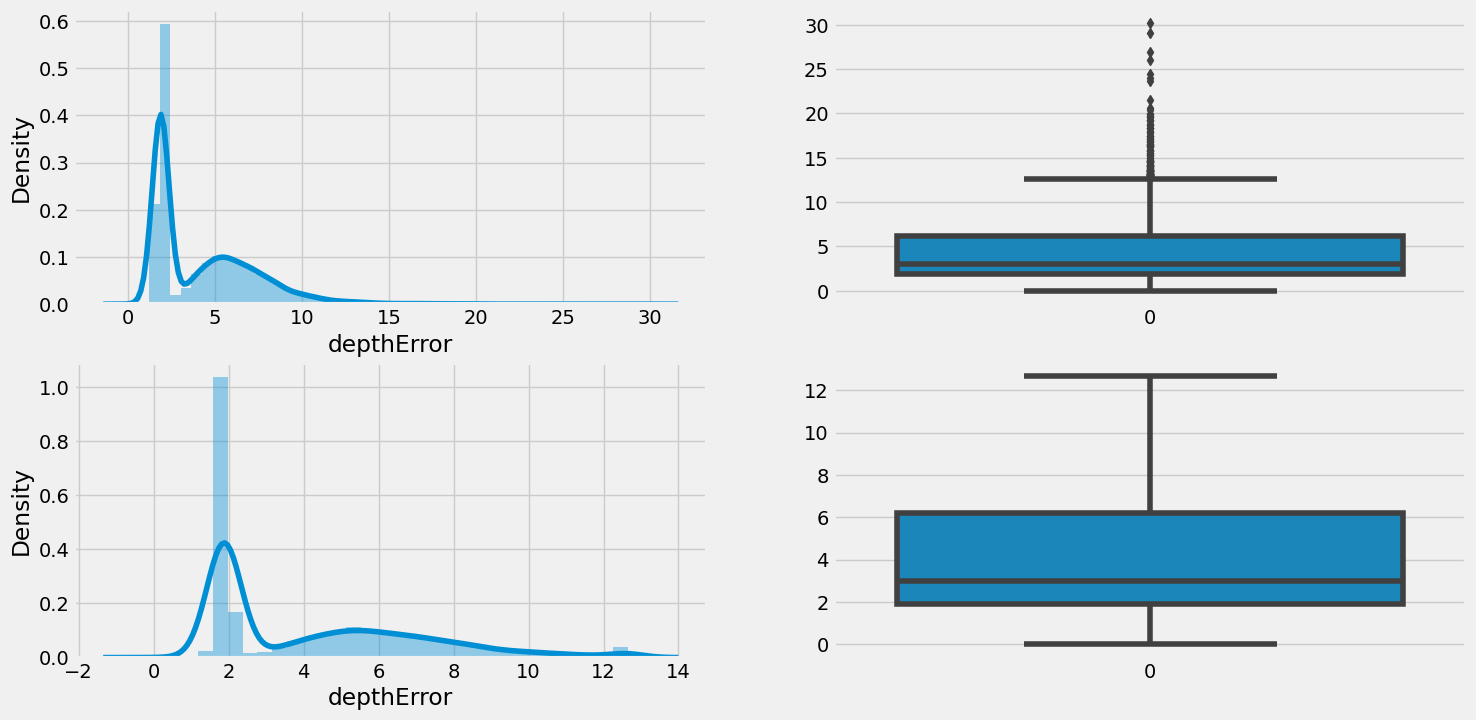

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['depthError'])
plt.subplot(2,2,2)
sns.boxplot(data['depthError'])
#Hist plot has a slight peak in the 6-8 tile, which stimulates that there are values imputed in that region.
plt.subplot(2,2,3)
sns.distplot(new_df_cap['depthError'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['depthError'])
plt.show()

finding Q1,Q2,Q3 of gap


In [ ]:
Q1=np.percentile(data['gap'],25,interpolation='midpoint')
Q2=np.percentile(data['gap'],50,interpolation='midpoint')
Q3=np.percentile(data['gap'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

61.0
80.0
108.0


In [ ]:
#finding IQR
IQR=stats.iqr(data.gap,interpolation="midpoint")
IQR

47.0

In [ ]:
#finding min and max limit
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-9.5, 178.5)

In [ ]:
#finding points greater than max limit as outliners
data.loc[data.gap>max_limit]

time  latitude  longitude   depth  mag  \
28   2023-04-05 19:54:54.212000+00:00   15.4416    95.9899  12.344  4.3   
29   2023-04-05 01:37:17.775000+00:00   40.6142    83.9591  10.023  4.6   
50   2023-03-28 06:52:26.620000+00:00   17.0280    96.0008  10.000  3.5   
113  2023-03-06 01:01:52.461000+00:00   26.2173    67.4737  10.000  4.0   
147  2023-02-23 06:50:46.270000+00:00   38.3267    73.0051  10.000  4.5   
...                               ...       ...        ...     ...  ...   
9331 2013-08-15 03:53:51.110000+00:00   14.8525    54.7923  10.000  4.4   
9506 2013-06-06 19:00:53.220000+00:00   27.7240    89.2760  10.000  3.9   
9530 2013-05-27 04:15:31.840000+00:00   15.2400    53.6160   9.900  4.3   
9661 2013-05-02 00:30:41.250000+00:00   33.1210    75.8270  15.800  4.3   
9722 2013-04-20 03:40:21.030000+00:00   29.8470   102.8170  10.000  4.3   

     magType  nst    gap     dmin   rms                             place  \
28        mb   19  184.0   3.2010  0.73      99 km SSE of Pyapon, Myanmar   
29        mb   16  245.0   4.2980  0.88          149 km SE of Kuqa, China   
50        ml    9  222.0   2.7390  0.77       29 km NW of Yangon, Myanmar   
113       mb   23  221.0   8.4060  0.44     45 km WSW of Sehwan, Pakistan   
147       mb   35  249.0   1.4850  0.48  85 km WNW of Murghob, Tajikistan   
...      ...  ...    ...      ...   ...                               ...   
9331      mb   37  196.0  12.2980  1.03       250 km SSE of ?al?lah, Oman   
9506      mb    7  181.0   6.2186  1.27         35 km NNW of Paro, Bhutan   
9530      mb   20  210.0   2.0536  0.91   187 km SE of Al Ghayz?ah, Yemen   
9661      mb   21  205.0   4.9440  1.08     18 km NNE of Bhadarw?h, India   
9722      mb   33  195.9   6.2186  0.58      84 km ESE of Kangding, China   

      horizontalError  depthError  magError  magNst  
28               6.81       5.850    0.2370       5  
29              11.98       9.264    0.3150       3  
50               7.84       2.014    0.1050      12  
113              5.99       1.997    0.1160      20  
147              8.00       2.000    0.1080      25  
...               ...         ...       ...     ...  
9331            12.10       1.900    0.1430      14  
9506             6.96       6.100    0.2508       3  
9530             6.82       3.200    0.0992      10  
9661             8.34       6.300    0.0992       5  
9722             6.96       1.920    0.0992       4  

[258 rows x 15 columns]

In [ ]:
#finding points less than min limit as outliners
data.loc[data.gap<min_limit]

Empty DataFrame
Columns: [time, latitude, longitude, depth, mag, magType, nst, gap, dmin, rms, place, horizontalError, depthError, magError, magNst]
Index: []

In [ ]:
#removing outliers using capping
#col=['gap']
new_df_cap['gap'] = np.where(new_df_cap['gap'] <min_limit,min_limit,new_df_cap['gap'])
new_df_cap['gap'] = np.where(new_df_cap['gap'] >max_limit, max_limit,new_df_cap['gap'])

In [ ]:
print(new_df_cap['gap'].skew())

0.6276982054124025


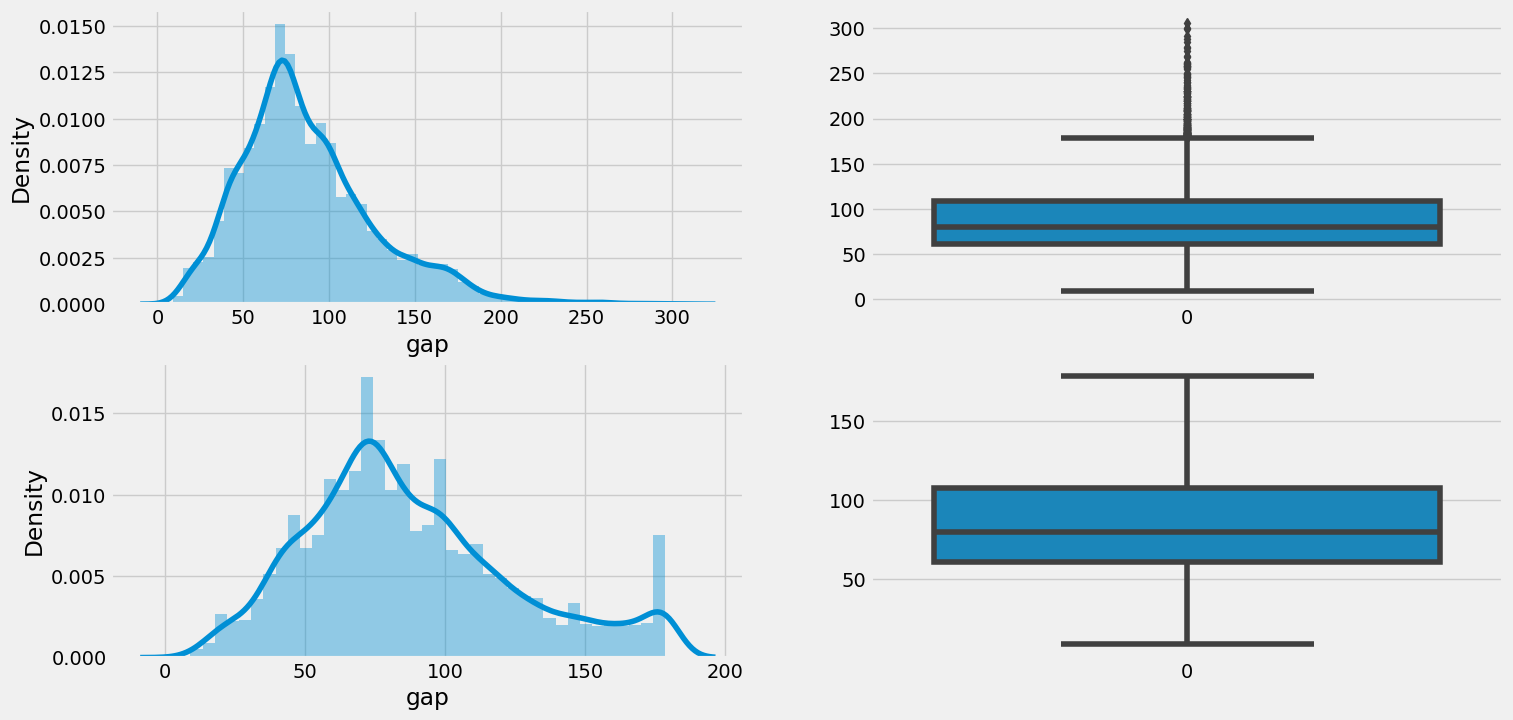

In [ ]:
#comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['gap'])
plt.subplot(2,2,2)
sns.boxplot(data['gap'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['gap'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['gap'])
plt.show()

In [ ]:
new_df_cap.describe()

latitude    longitude        depth          mag          nst  \
count  9749.000000  9749.000000  9749.000000  9749.000000  9749.000000   
mean     32.524655    76.039008    49.132742     4.421865    53.490204   
std       6.123895    16.361299    63.531274     0.375508    37.215445   
min      14.609500    46.407900     1.500000     2.700000     6.000000   
25%      27.832200    68.354900    10.000000     4.200000    29.000000   
50%      33.118500    72.424500    10.530000     4.400000    41.000000   
75%      36.979600    89.662200    61.780000     4.600000    66.000000   
max      48.387600   115.207300   400.570000     7.800000   586.000000   

               gap         dmin          rms  horizontalError   depthError  \
count  9749.000000  9749.000000  9749.000000      9749.000000  9749.000000   
mean     86.988532     3.147543     0.824807         7.217500     4.237714   
std      37.508759     2.440556     0.259181         2.068415     2.820158   
min       9.000000     0.001000     0.130000         1.500000     0.000000   
25%      61.000000     1.152000     0.640000         5.900000     1.900000   
50%      80.000000     2.550000     0.800000         7.100000     3.000000   
75%     108.000000     4.480000     0.980000         8.300000     6.200000   
max     178.500000    23.330000     2.360000        28.900000    12.650000   

          magError       magNst  
count  9749.000000  9749.000000  
mean      0.128487    35.844805  
std       0.069283    42.675667  
min       0.000000     1.000000  
25%       0.080000    11.000000  
50%       0.114000    21.000000  
75%       0.159000    42.000000  
max       0.540000   578.000000

In [ ]:
data.describe()

latitude    longitude        depth          mag          nst  \
count  9749.000000  9749.000000  9749.000000  9749.000000  9749.000000   
mean     32.524655    76.039008    49.132742     4.421865    53.490204   
std       6.123895    16.361299    63.531274     0.375508    37.215445   
min      14.609500    46.407900     1.500000     2.700000     6.000000   
25%      27.832200    68.354900    10.000000     4.200000    29.000000   
50%      33.118500    72.424500    10.530000     4.400000    41.000000   
75%      36.979600    89.662200    61.780000     4.600000    66.000000   
max      48.387600   115.207300   400.570000     7.800000   586.000000   

               gap         dmin          rms  horizontalError   depthError  \
count  9749.000000  9749.000000  9749.000000      9749.000000  9749.000000   
mean     87.739881     3.147543     0.824807         7.217500     4.277796   
std      39.818646     2.440556     0.259181         2.068415     2.983660   
min       9.000000     0.001000     0.130000         1.500000     0.000000   
25%      61.000000     1.152000     0.640000         5.900000     1.900000   
50%      80.000000     2.550000     0.800000         7.100000     3.000000   
75%     108.000000     4.480000     0.980000         8.300000     6.200000   
max     306.000000    23.330000     2.360000        28.900000    30.200000   

          magError       magNst  
count  9749.000000  9749.000000  
mean      0.128487    35.844805  
std       0.069283    42.675667  
min       0.000000     1.000000  
25%       0.080000    11.000000  
50%       0.114000    21.000000  
75%       0.159000    42.000000  
max       0.540000   578.000000

finding IQR of magError





In [ ]:
Q1 = data.magError.quantile(0.25)
Q2 = data.magError.quantile(0.75)
IQR = Q2-Q1
print(IQR)

0.079


finding upper limit and lower limit

In [ ]:
lower_limit = Q1-1.5*IQR
upper_limit = Q2+1.5*IQR
lower_limit,upper_limit

(-0.03849999999999999, 0.27749999999999997)

In [ ]:
data[data['magError'] > upper_limit]

time  latitude  longitude    depth  mag  \
29   2023-04-05 01:37:17.775000+00:00   40.6142    83.9591   10.023  4.6   
40   2023-03-31 17:01:31.440000+00:00   30.3953    66.7272   10.000  3.5   
152  2023-02-23 01:18:19.422000+00:00   37.6030    73.6046   11.082  4.1   
177  2023-02-13 02:59:47.109000+00:00   36.4994    70.3753  202.811  4.0   
234  2023-01-25 13:48:27.101000+00:00   44.9396    80.9549   10.000  4.1   
...                               ...       ...        ...      ...  ...   
9356 2013-08-10 16:28:30.750000+00:00   36.5835    70.8896  172.940  4.2   
9358 2013-08-09 08:51:30.980000+00:00   36.4059    68.7754   56.790  4.1   
9363 2013-08-07 07:30:59.920000+00:00   36.5197    70.4013  206.170  4.2   
9364 2013-08-06 18:36:30.500000+00:00   23.3104    88.4902   35.880  4.5   
9367 2013-08-05 14:46:00.350000+00:00   33.3339    75.9342   50.450  4.1   

     magType  nst    gap   dmin   rms  \
29        mb   16  245.0  4.298  0.88   
40        mb    6  149.0  4.573  0.34   
152       mb   14  175.0  2.347  0.57   
177       mb   16   98.0  2.236  0.62   
234       mb   20  187.0  1.928  0.72   
...      ...  ...    ...    ...   ...   
9356      mb   20  109.0  2.454  0.46   
9358      mb   16  163.0  1.873  1.01   
9363      mb   16  123.0  2.263  1.16   
9364      mb   16  112.0  3.802  0.76   
9367      mb   16  148.0  2.249  0.89   

                                               place  horizontalError  \
29                          149 km SE of Kuqa, China           11.980   
40        32 km NW of Kot Malik Barkhurdar, Pakistan            7.990   
152   Gorno-Badakhshan Autonomous Region, Tajikistan            7.750   
177                  47 km E of Farkh?r, Afghanistan            8.630   
234                Kazakhstan-Xinjiang border region            8.630   
...                                              ...              ...   
9356                    31 km S of Jurm, Afghanistan            7.760   
9358                 31 km N of Baghl?n, Afghanistan            7.004   
9363                 49 km E of Farkh?r, Afghanistan            6.860   
9364                     9 km NE of Sh?ntipur, India            6.520   
9367                      15 km E of Kishtw?r, India            7.780   

      depthError  magError  magNst  
29         9.264     0.315       3  
40         2.001     0.494       1  
152        6.543     0.370       2  
177       11.078     0.300       3  
234        1.994     0.369       2  
...          ...       ...     ...  
9356      14.400     0.306       3  
9358      26.900     0.368       2  
9363      11.500     0.374       2  
9364       8.600     0.383       2  
9367       7.700     0.370       2  

[340 rows x 15 columns]

In [ ]:
data[data['magError'] < lower_limit]

Empty DataFrame
Columns: [time, latitude, longitude, depth, mag, magType, nst, gap, dmin, rms, place, horizontalError, depthError, magError, magNst]
Index: []

capping

In [ ]:
new_df_cap['magError'] = np.where(
    new_df_cap['magError'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['magError'] < lower_limit,
        lower_limit,
        new_df_cap['magError']))

compare the plots after capping

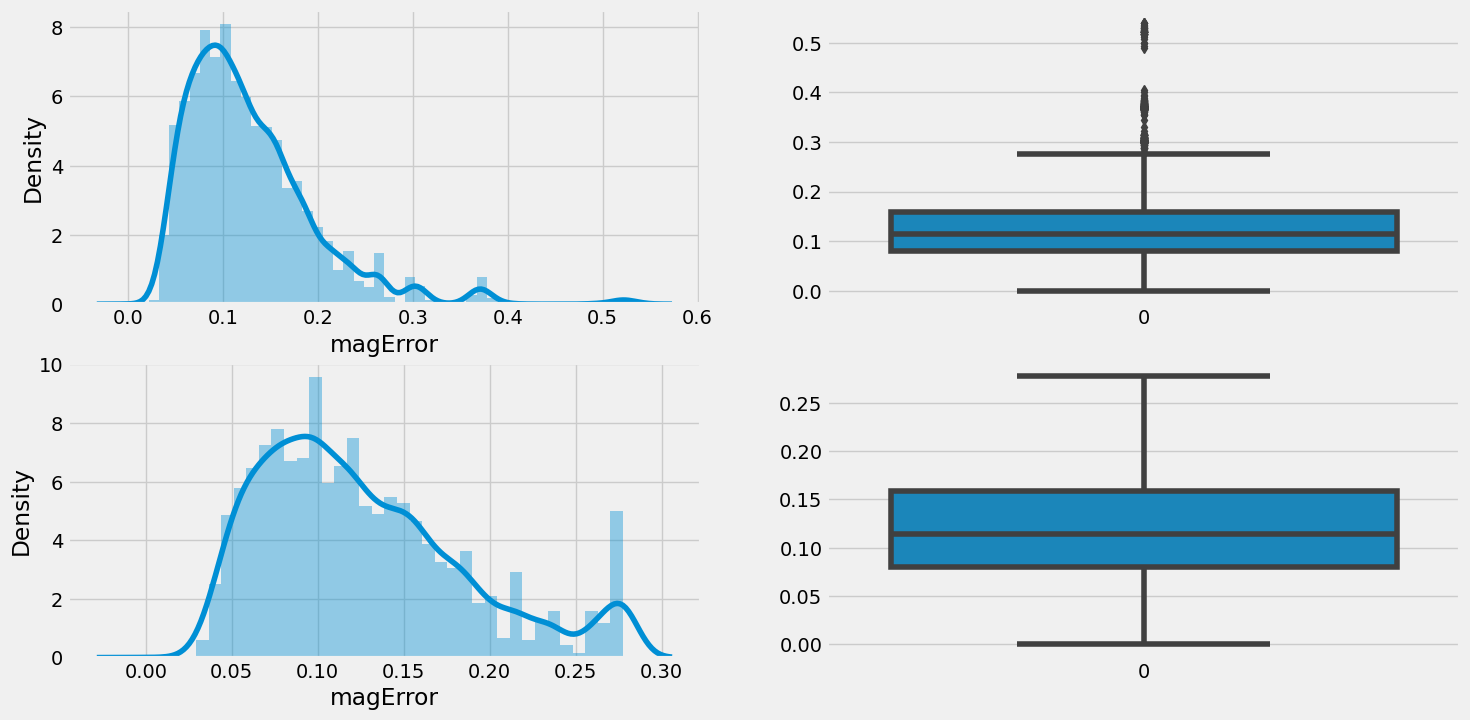

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['magError'])
plt.subplot(2,2,2)
sns.boxplot(data['magError'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['magError'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['magError'])
plt.show()

finding Q1,Q2,Q3 for magNst

In [ ]:
data.describe()

latitude    longitude        depth          mag          nst  \
count  9749.000000  9749.000000  9749.000000  9749.000000  9749.000000   
mean     32.524655    76.039008    49.132742     4.421865    53.490204   
std       6.123895    16.361299    63.531274     0.375508    37.215445   
min      14.609500    46.407900     1.500000     2.700000     6.000000   
25%      27.832200    68.354900    10.000000     4.200000    29.000000   
50%      33.118500    72.424500    10.530000     4.400000    41.000000   
75%      36.979600    89.662200    61.780000     4.600000    66.000000   
max      48.387600   115.207300   400.570000     7.800000   586.000000   

               gap         dmin          rms  horizontalError   depthError  \
count  9749.000000  9749.000000  9749.000000      9749.000000  9749.000000   
mean     87.739881     3.147543     0.824807         7.217500     4.277796   
std      39.818646     2.440556     0.259181         2.068415     2.983660   
min       9.000000     0.001000     0.130000         1.500000     0.000000   
25%      61.000000     1.152000     0.640000         5.900000     1.900000   
50%      80.000000     2.550000     0.800000         7.100000     3.000000   
75%     108.000000     4.480000     0.980000         8.300000     6.200000   
max     306.000000    23.330000     2.360000        28.900000    30.200000   

          magError       magNst  
count  9749.000000  9749.000000  
mean      0.128487    35.844805  
std       0.069283    42.675667  
min       0.000000     1.000000  
25%       0.080000    11.000000  
50%       0.114000    21.000000  
75%       0.159000    42.000000  
max       0.540000   578.000000

In [ ]:
new_df_cap.describe()

latitude    longitude        depth          mag          nst  \
count  9749.000000  9749.000000  9749.000000  9749.000000  9749.000000   
mean     32.524655    76.039008    49.132742     4.421865    53.490204   
std       6.123895    16.361299    63.531274     0.375508    37.215445   
min      14.609500    46.407900     1.500000     2.700000     6.000000   
25%      27.832200    68.354900    10.000000     4.200000    29.000000   
50%      33.118500    72.424500    10.530000     4.400000    41.000000   
75%      36.979600    89.662200    61.780000     4.600000    66.000000   
max      48.387600   115.207300   400.570000     7.800000   586.000000   

               gap         dmin          rms  horizontalError   depthError  \
count  9749.000000  9749.000000  9749.000000      9749.000000  9749.000000   
mean     86.988532     3.147543     0.824807         7.217500     4.237714   
std      37.508759     2.440556     0.259181         2.068415     2.820158   
min       9.000000     0.001000     0.130000         1.500000     0.000000   
25%      61.000000     1.152000     0.640000         5.900000     1.900000   
50%      80.000000     2.550000     0.800000         7.100000     3.000000   
75%     108.000000     4.480000     0.980000         8.300000     6.200000   
max     178.500000    23.330000     2.360000        28.900000    12.650000   

          magError       magNst  
count  9749.000000  9749.000000  
mean      0.125700    35.844805  
std       0.059744    42.675667  
min       0.000000     1.000000  
25%       0.080000    11.000000  
50%       0.114000    21.000000  
75%       0.159000    42.000000  
max       0.277500   578.000000

In [ ]:
Q1 = np.percentile(data['magNst'],25,interpolation='midpoint')
Q2 = np.percentile(data['magNst'],50,interpolation='midpoint')
Q3 = np.percentile(data['magNst'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

11.0
21.0
42.0


finding IQR

In [ ]:
IQR =  stats.iqr(data.magNst,interpolation='midpoint')
IQR

31.0

finding min ana max limit

In [ ]:
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-35.5, 88.5)

finding points grater than max limit as ouliers

In [ ]:
data.loc[data.magNst>max_limit]

time  latitude  longitude    depth  mag  \
17   2023-04-11 03:37:15.212000+00:00   36.5612    70.9434  202.255  4.5   
26   2023-04-07 12:17:05.347000+00:00   41.9030    81.9281   10.000  5.0   
30   2023-04-04 15:59:14.153000+00:00   38.0712    74.2213  169.316  4.6   
37   2023-04-01 15:57:40.689000+00:00   27.2714    53.0322   27.754  5.1   
56   2023-03-25 19:13:32.370000+00:00   32.6182    47.6519   10.000  4.8   
...                               ...       ...        ...      ...  ...   
9707 2013-04-21 03:59:37.540000+00:00   30.2250   103.0150   10.000  5.0   
9709 2013-04-20 20:53:43.110000+00:00   30.3390   103.0600   10.000  5.1   
9723 2013-04-20 03:34:15.550000+00:00   30.1870   102.9500   10.000  5.1   
9731 2013-04-20 01:37:27.920000+00:00   30.2820   102.9980   10.000  5.1   
9736 2013-04-20 01:11:50.740000+00:00   30.2090   102.8620   10.000  5.0   

     magType  nst   gap    dmin   rms                             place  \
17        mb   59  72.0  2.5430  0.48  Badakhshan Province, Afghanistan   
26        mb   96  40.0  2.2980  0.51          85 km WNW of Kuqa, China   
30        mb  122  33.0  2.3570  0.69  24 km ESE of Murghob, Tajikistan   
37        mb   71  79.0  3.6740  0.72           34 km SSE of Mohr, Iran   
56        mb   73  52.0  3.5090  0.79       36 km ESE of Dehlor?n, Iran   
...      ...  ...   ...     ...   ...                               ...   
9707      mb  189  19.3  6.2186  0.81      47 km WSW of Linqiong, China   
9709      mb  228  17.5  6.2186  0.74      39 km WSW of Linqiong, China   
9723      mb  226  17.6  6.2186  0.81      55 km WSW of Linqiong, China   
9731      mb  175  25.7  6.2186  0.79      46 km WSW of Linqiong, China   
9736      mb  169  18.8  6.2186  0.67      62 km WSW of Linqiong, China   

      horizontalError  depthError  magError  magNst  
17               4.25       7.538    0.0550      97  
26               7.20       1.850    0.0420     179  
30               7.45       5.857    0.0430     163  
37               8.28       4.153    0.0440     165  
56               7.23       1.825    0.0570      96  
...               ...         ...       ...     ...  
9707             6.96       1.920    0.0636     107  
9709             6.96       1.920    0.0686     173  
9723             6.96       1.920    0.0686     141  
9731             6.96       1.920    0.0686     105  
9736             6.96       1.920    0.0636     103  

[947 rows x 15 columns]

finding points less than min limit as outliers

In [ ]:
data.loc[data.magNst<min_limit]

Empty DataFrame
Columns: [time, latitude, longitude, depth, mag, magType, nst, gap, dmin, rms, place, horizontalError, depthError, magError, magNst]
Index: []

capping

In [ ]:
#col=['magNst']
new_df_cap['magNst'] = np.where(new_df_cap['magNst'] <min_limit,min_limit,new_df_cap['magNst'])
new_df_cap['magNst'] = np.where(new_df_cap['magNst'] >max_limit, max_limit,new_df_cap['magNst'])

comparing plots after capping

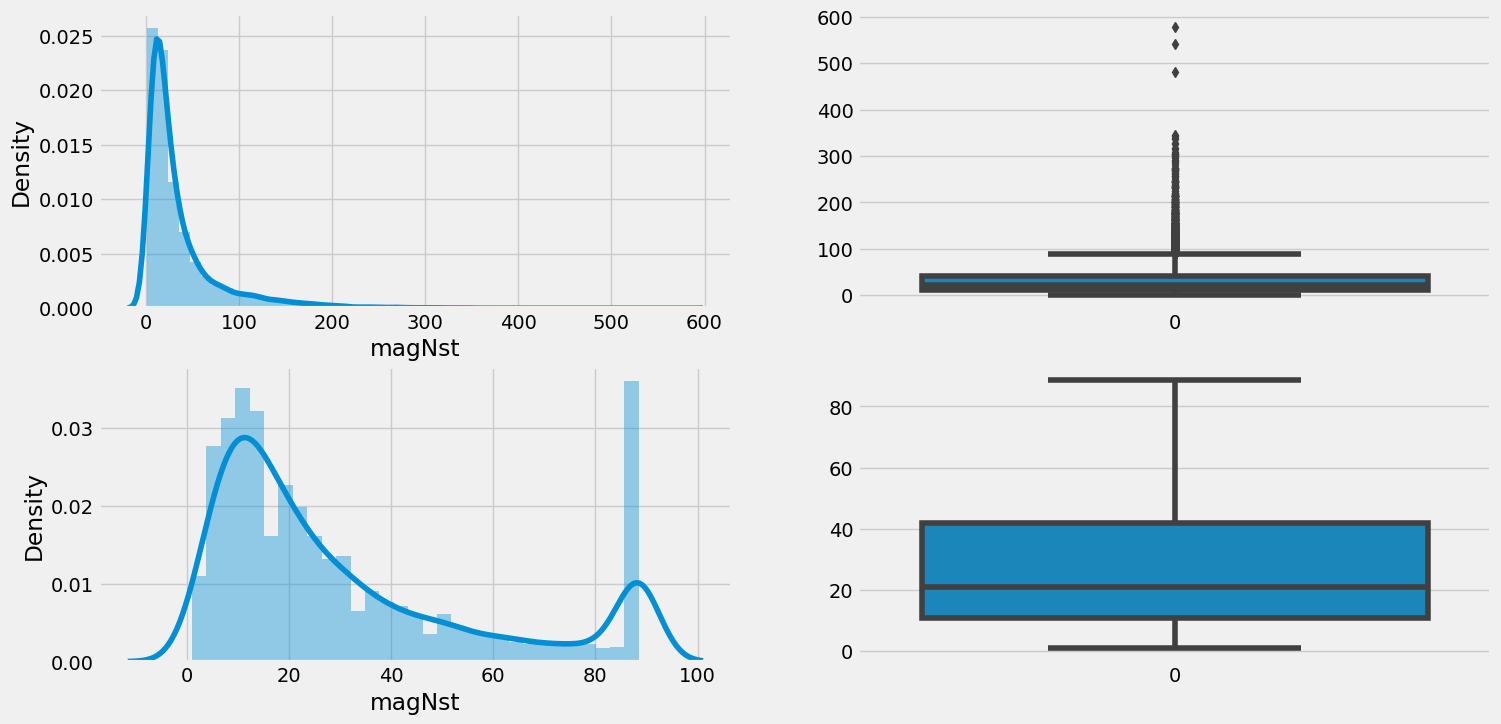

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['magNst'])
plt.subplot(2,2,2)
sns.boxplot(data['magNst'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['magNst'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['magNst'])
plt.show()

In [ ]:
data.describe()

latitude    longitude        depth          mag          nst  \
count  9749.000000  9749.000000  9749.000000  9749.000000  9749.000000   
mean     32.524655    76.039008    49.132742     4.421865    53.490204   
std       6.123895    16.361299    63.531274     0.375508    37.215445   
min      14.609500    46.407900     1.500000     2.700000     6.000000   
25%      27.832200    68.354900    10.000000     4.200000    29.000000   
50%      33.118500    72.424500    10.530000     4.400000    41.000000   
75%      36.979600    89.662200    61.780000     4.600000    66.000000   
max      48.387600   115.207300   400.570000     7.800000   586.000000   

               gap         dmin          rms  horizontalError   depthError  \
count  9749.000000  9749.000000  9749.000000      9749.000000  9749.000000   
mean     87.739881     3.147543     0.824807         7.217500     4.277796   
std      39.818646     2.440556     0.259181         2.068415     2.983660   
min       9.000000     0.001000     0.130000         1.500000     0.000000   
25%      61.000000     1.152000     0.640000         5.900000     1.900000   
50%      80.000000     2.550000     0.800000         7.100000     3.000000   
75%     108.000000     4.480000     0.980000         8.300000     6.200000   
max     306.000000    23.330000     2.360000        28.900000    30.200000   

          magError       magNst  
count  9749.000000  9749.000000  
mean      0.128487    35.844805  
std       0.069283    42.675667  
min       0.000000     1.000000  
25%       0.080000    11.000000  
50%       0.114000    21.000000  
75%       0.159000    42.000000  
max       0.540000   578.000000

In [ ]:
new_df_cap.describe()

latitude    longitude        depth          mag          nst  \
count  9749.000000  9749.000000  9749.000000  9749.000000  9749.000000   
mean     32.524655    76.039008    49.132742     4.421865    53.490204   
std       6.123895    16.361299    63.531274     0.375508    37.215445   
min      14.609500    46.407900     1.500000     2.700000     6.000000   
25%      27.832200    68.354900    10.000000     4.200000    29.000000   
50%      33.118500    72.424500    10.530000     4.400000    41.000000   
75%      36.979600    89.662200    61.780000     4.600000    66.000000   
max      48.387600   115.207300   400.570000     7.800000   586.000000   

               gap         dmin          rms  horizontalError   depthError  \
count  9749.000000  9749.000000  9749.000000      9749.000000  9749.000000   
mean     86.988532     3.147543     0.824807         7.217500     4.237714   
std      37.508759     2.440556     0.259181         2.068415     2.820158   
min       9.000000     0.001000     0.130000         1.500000     0.000000   
25%      61.000000     1.152000     0.640000         5.900000     1.900000   
50%      80.000000     2.550000     0.800000         7.100000     3.000000   
75%     108.000000     4.480000     0.980000         8.300000     6.200000   
max     178.500000    23.330000     2.360000        28.900000    12.650000   

          magError       magNst  
count  9749.000000  9749.000000  
mean      0.125700    30.612524  
std       0.059744    26.314130  
min       0.000000     1.000000  
25%       0.080000    11.000000  
50%       0.114000    21.000000  
75%       0.159000    42.000000  
max       0.277500    88.500000

### **OUTLIER HANDLING OF RMS AND HORIZONTAL ERROR**

In [ ]:
data['horizontalError'].describe()

count    9749.000000
mean        7.217500
std         2.068415
min         1.500000
25%         5.900000
50%         7.100000
75%         8.300000
max        28.900000
Name: horizontalError, dtype: float64

In [ ]:
data['rms'].describe()

count    9749.000000
mean        0.824807
std         0.259181
min         0.130000
25%         0.640000
50%         0.800000
75%         0.980000
max         2.360000
Name: rms, dtype: float64

The columns horizontal error and rms are not normally distributed.So we chose IQR method for outlier handling.

In [ ]:
from scipy.stats import shapiro 
shapiro(data['horizontalError'])
#p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test.
#sample data does not come from a normal distribution.

ShapiroResult(statistic=0.9737274050712585, pvalue=7.973905341141545e-39)

In [ ]:
#the skewness value should be between -1 and +1 
# If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed. 
print(data['horizontalError'].skew())

0.703942178629905


In [ ]:
shapiro(data['rms'])

ShapiroResult(statistic=0.9826186895370483, pvalue=8.030823855868292e-33)

In [ ]:
print(data['rms'].skew())

0.5418212116255439


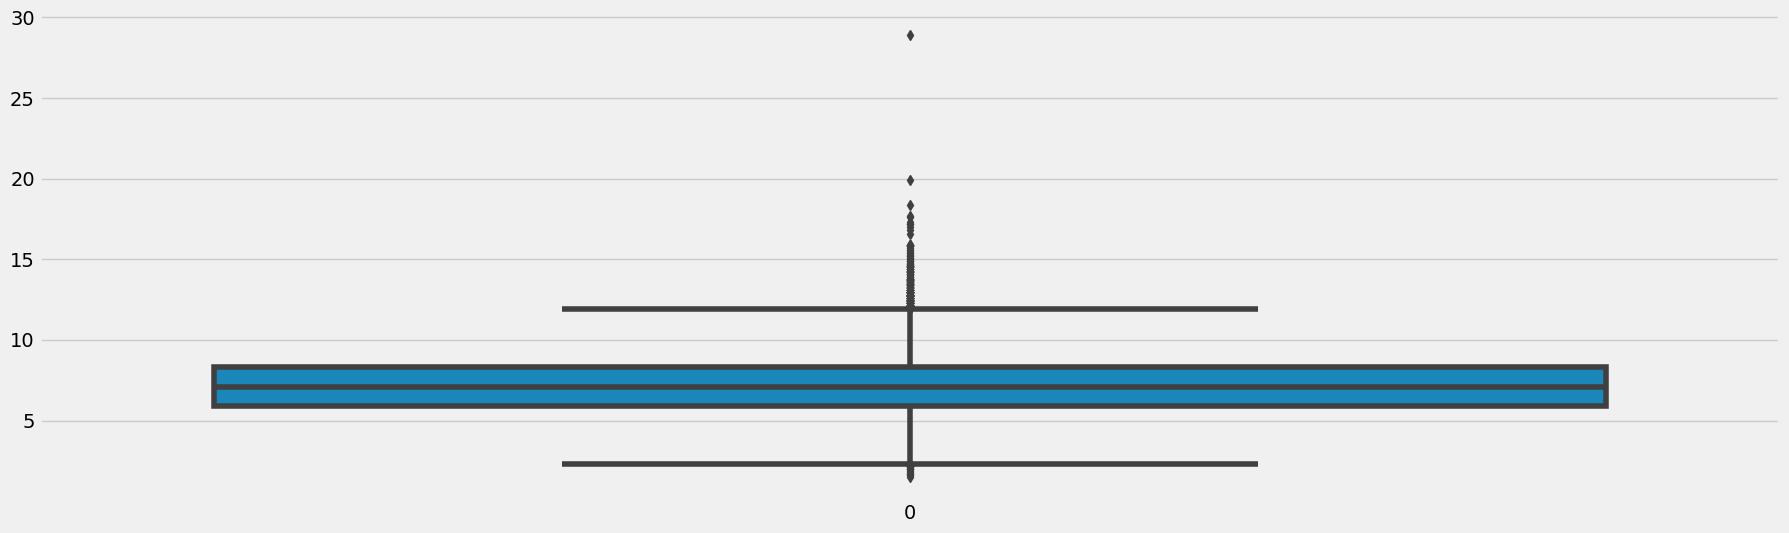

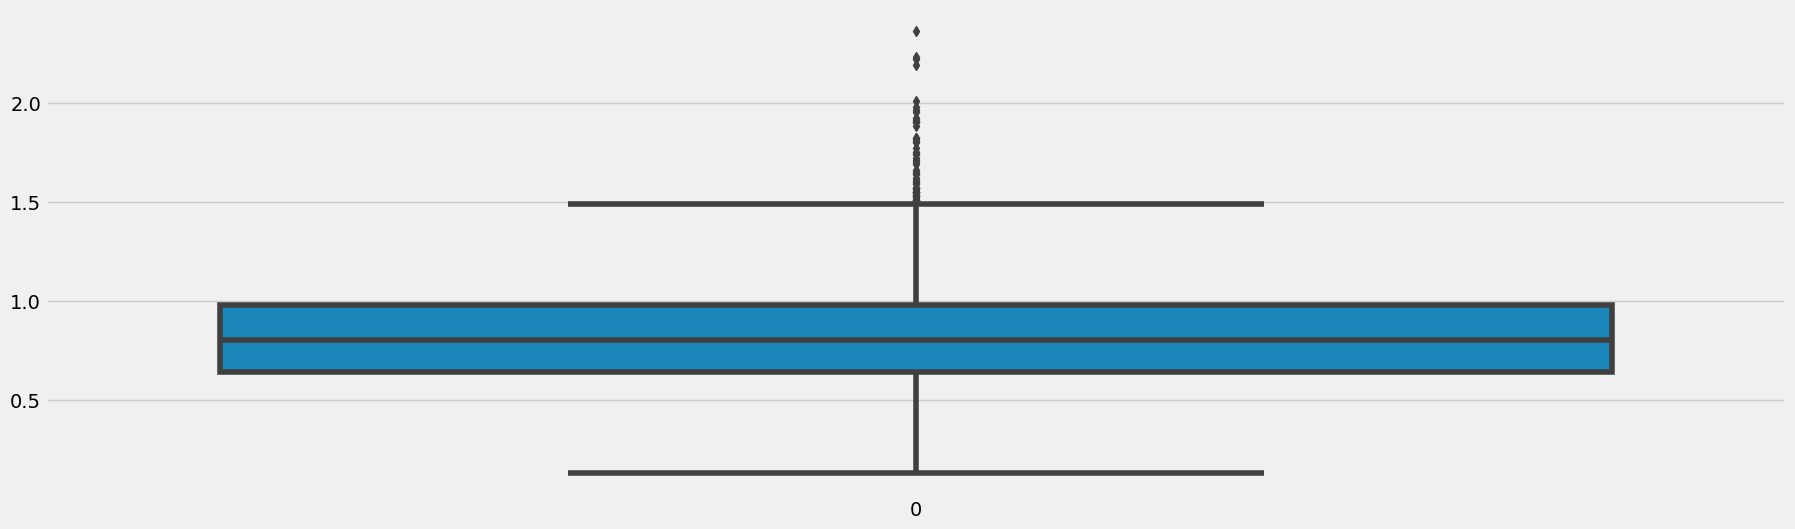

In [ ]:
for i in ['horizontalError','rms']:
 sns.boxplot(data[i])
 plt.show()

In [ ]:
Q1=np.percentile(data['horizontalError'],25,interpolation='midpoint')
Q2=np.percentile(data['horizontalError'],50,interpolation='midpoint')
Q3=np.percentile(data['horizontalError'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

5.9
7.1
8.3


In [ ]:
#finding IQR
IQR=stats.iqr(data.horizontalError,interpolation="midpoint")
IQR

2.4000000000000004

In [ ]:
#finding min and max limit
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(2.3, 11.900000000000002)

In [ ]:
#finding points greater than max limit as outliners
data.loc[data.horizontalError>max_limit]

time  latitude  longitude   depth  mag  \
4    2023-04-23 16:27:53.084000+00:00   30.3602    70.9070  39.643  4.8   
29   2023-04-05 01:37:17.775000+00:00   40.6142    83.9591  10.023  4.6   
36   2023-04-01 19:43:06.692000+00:00   27.3091    52.9937  10.000  4.0   
41   2023-03-31 05:45:06.019000+00:00   34.3639    93.6750  36.002  4.1   
61   2023-03-24 04:06:24.411000+00:00   29.6326    81.8280  30.882  4.2   
...                               ...       ...        ...     ...  ...   
9222 2013-09-24 11:44:26.490000+00:00   25.3764    65.9668  10.000  5.0   
9223 2013-09-24 11:43:54.450000+00:00   26.5902    65.1551   9.990  4.6   
9224 2013-09-24 11:42:43.280000+00:00   26.8928    66.3616  10.000  4.8   
9225 2013-09-24 11:41:50.050000+00:00   26.6776    65.4037   9.970  5.1   
9331 2013-08-15 03:53:51.110000+00:00   14.8525    54.7923  10.000  4.4   

     magType  nst    gap    dmin   rms                            place  \
4         mb   16  163.0   4.456  0.56  13 km SSW of Kot Addu, Pakistan   
29        mb   16  245.0   4.298  0.88         149 km SE of Kuqa, China   
36        mb   17  114.0   3.724  0.73          29 km SSE of Mohr, Iran   
41        mb   17  110.0   8.678  1.12          Southern Qinghai, China   
61        mb   23  171.0   3.538  0.80         52 km NW of Jumla, Nepal   
...      ...  ...    ...     ...   ...                              ...   
9222      mb   22  208.0  18.073  1.17      81 km SW of Uthal, Pakistan   
9223      mb   23  144.0  16.056  0.81     122 km WNW of Bela, Pakistan   
9224      mb   17  182.0  22.875  0.38        73 km N of Bela, Pakistan   
9225      mb   70  150.0  22.937  1.15     103 km WNW of Bela, Pakistan   
9331      mb   37  196.0  12.298  1.03      250 km SSE of ?al?lah, Oman   

      horizontalError  depthError  magError  magNst  
4               15.53      10.959     0.109      26  
29              11.98       9.264     0.315       3  
36              12.79       1.952     0.197       7  
41              12.47       8.521     0.127      17  
61              13.44       7.587     0.152      12  
...               ...         ...       ...     ...  
9222            13.52       2.000     0.401       6  
9223            13.35       1.900     0.194       8  
9224            12.33       2.000     0.394       3  
9225            12.33       1.900     0.215      12  
9331            12.10       1.900     0.143      14  

[235 rows x 15 columns]

In [ ]:
#finding points less than min limit as outliners
data.loc[data.horizontalError<min_limit]

time  latitude  longitude   depth  mag  \
171  2023-02-16 18:17:20.564000+00:00   37.3017    70.5188  56.154  4.6   
506  2022-10-11 17:32:44.540000+00:00   21.1176    99.8969   6.237  4.6   
975  2022-05-12 10:27:44.655000+00:00   38.0642    66.9903  30.270  5.3   
2019 2021-05-14 09:57:25.837000+00:00   36.4008    69.5932  42.650  4.5   
2890 2020-06-08 02:54:11.670000+00:00   45.6397   114.5837  10.000  4.3   
3182 2020-01-31 19:33:58.215000+00:00   40.8847    79.1190  10.000  4.3   
3358 2019-11-29 17:20:13.576000+00:00   31.9436    49.8143  10.000  5.0   
3898 2019-04-06 04:02:41.154000+00:00   39.0501    74.5846  35.000  4.5   
4256 2018-10-20 10:47:42.540000+00:00   41.9381    82.3040  10.000  4.8   
4622 2018-05-10 15:36:42.550000+00:00   36.4130    61.1610  10.000  4.8   
4753 2018-03-29 23:24:43.690000+00:00   38.6859    69.9052   5.000  4.6   
4884 2018-01-23 01:26:09.200000+00:00   41.4055    68.9950  12.290  4.5   
5507 2017-05-04 06:52:30.190000+00:00   39.4995    71.3665  10.000  4.0   
5679 2017-02-08 11:11:42.050000+00:00   27.3030   103.4248  10.000  4.9   
5799 2016-12-27 12:26:36.360000+00:00   28.1225    57.2505  10.000  4.4   
6626 2016-02-02 15:27:55.840000+00:00   37.6295    69.9131   4.800  4.1   
6853 2015-11-17 17:29:36.290000+00:00   40.3762    73.2038  18.000  5.6   
7537 2015-04-29 02:37:46.190000+00:00   27.4330    53.4371  10.000  4.9   

     magType  nst    gap   dmin   rms                                place  \
171       mb  132   22.0  1.805  0.59   21 km NNW of Fayzabad, Afghanistan   
506       mb   84   43.0  0.332  0.63        56 km S of K?ng Tung, Myanmar   
975      mww  128   22.0  1.693  0.82       24 km SW of Boysun, Uzbekistan   
2019      mb   72   59.0  1.070  0.62     30 km SW of Farkh?r, Afghanistan   
2890      mb   70   36.0  5.042  0.81    153 km SE of Baruun-Urt, Mongolia   
3182      mb   54   73.0  0.324  0.80              86 km W of Aykol, China   
3358      mb  117   60.0  2.230  0.79     48 km E of Masjed Soleym?n, Iran   
3898      mb   38   58.0  2.200  1.22    111 km NNE of Murghob, Tajikistan   
4256      mb   89   72.0  2.430  0.68             57 km WNW of Kuqa, China   
4622      mb  128   35.0  2.206  0.76             14 km S of Sarakhs, Iran   
4753      mb   94   33.0  0.448  0.87      11 km SSE of Roghun, Tajikistan   
4884      mb   68   40.0  1.931  0.63  15 km WSW of Saryaghash, Kazakhstan   
5507      mb   15  110.0  0.699  1.03   32 km NNW of Karakenja, Tajikistan   
5679      mb  103   42.0  6.094  0.95           28 km W of Zhaotong, China   
5799      mb   56   64.0  0.438  1.19              111 km N of M?n?b, Iran   
6626      mb   26   75.0  0.729  0.82        18 km E of Chubek, Tajikistan   
6853     mww  249   18.0  1.397  0.73         38 km ESE of Osh, Kyrgyzstan   
7537      mb  126   30.0  0.259  1.17              56 km ESE of Mohr, Iran   

      horizontalError  depthError  magError  magNst  
171              2.10       6.125    0.0540     109  
506              2.29       4.429    0.0740      60  
975              2.00       3.500    0.0750      17  
2019             1.80       7.100    0.0720      57  
2890             2.20       1.900    0.0780      47  
3182             2.00       1.800    0.0940      37  
3358             1.70       1.800    0.0400     205  
3898             2.20       2.000    0.1270      18  
4256             2.00       1.900    0.0610      83  
4622             2.20       1.800    0.0400     196  
4753             1.60       1.800    0.0510     115  
4884             2.10       5.100    0.0740      53  
5507             2.20       1.900    0.2580       4  
5679             2.20       1.900    0.0560     100  
5799             2.20       1.900    0.0790      46  
6626             1.90       7.400    0.2620       4  
6853             1.70       1.700    0.0758      20  
7537             1.50       1.800    0.0470     144

In [ ]:
#Removing Outliers using capping technique 
#capping imputes the outliers with some other values.
#values can be mean, median or mode or any constant value also (that we gonna do here) leads to the condition 
#where there will be no outliers in the dataset.
#we copy data into new_df_cap for outlier removal
#new_df_cap = data.copy()
#np. where() will help us to impute the upper and lower limit values to both regions of outliers.
new_df_cap['horizontalError'] = np.where(
    new_df_cap['horizontalError']> max_limit,
    max_limit,
    np.where(
        new_df_cap['horizontalError']  < min_limit,
        min_limit,
        new_df_cap['horizontalError'] 
    ))

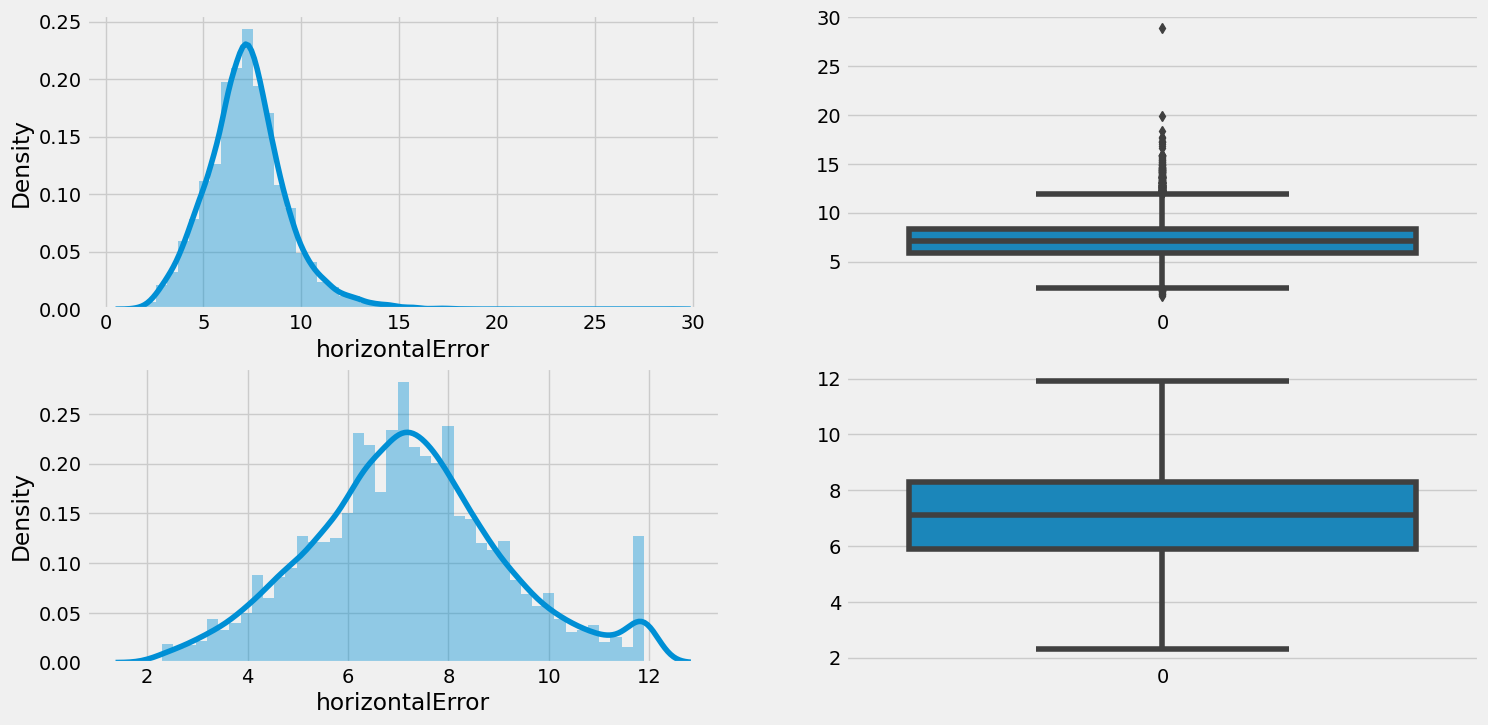

In [ ]:
#comparing
# First two plots are the dist and boxplot before we applied the capping technique, so in the boxplot, we can see a lot of outliers.
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['horizontalError'])
plt.subplot(2,2,2)
sns.boxplot(data['horizontalError'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['horizontalError'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['horizontalError'])
plt.show()

In [ ]:
Q1=np.percentile(data['rms'],25,interpolation='midpoint')
Q2=np.percentile(data['rms'],50,interpolation='midpoint')
Q3=np.percentile(data['rms'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.64
0.8
0.98


In [ ]:
#finding IQR
IQR=stats.iqr(data.rms,interpolation="midpoint")
IQR

0.33999999999999997

In [ ]:
#finding min and max limit
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(0.13, 1.49)

In [ ]:
#finding points greater than max limit as outliners
data.loc[data.rms>max_limit]

time  latitude  longitude   depth  mag  \
5266 2017-08-14 11:14:09.980000+00:00   27.4725    56.9824   10.00  4.5   
5521 2017-04-29 06:17:01.790000+00:00   34.3746    69.8494   10.00  4.0   
5816        2016-12-18 17:40:54+00:00   29.5100    50.8900   17.00  4.1   
5884 2016-11-26 07:42:55.950000+00:00   39.2688    73.8260   10.00  4.2   
5942 2016-11-02 11:11:11.760000+00:00   35.6510    48.9523   10.00  4.2   
6236 2016-06-30 10:29:52.510000+00:00   32.8408    84.8263   38.86  4.3   
6309 2016-06-26 01:02:50.650000+00:00   38.7001    73.3176   10.00  4.1   
6762 2015-12-08 10:24:24.650000+00:00   38.7568    73.2647   10.00  4.4   
6940 2015-10-23 02:27:16.080000+00:00   29.8143    69.9062   24.74  4.2   
7035 2015-09-15 17:35:52.050000+00:00   37.3305    54.4119   29.81  4.4   
7113        2015-08-17 17:36:00+00:00   36.3400    55.2800    8.00  4.3   
7160 2015-08-01 01:37:42.690000+00:00   28.5320    85.6808   10.00  4.0   
7221 2015-07-10 00:31:59.380000+00:00   41.0983    74.1631   11.64  4.3   
7693 2015-04-10 11:09:05.200000+00:00   28.3420    51.7710   19.70  4.0   
7979 2014-11-19 19:19:24.930000+00:00   42.2458    84.3862   36.58  4.6   
7994        2014-11-16 11:46:24+00:00   27.7500    54.1200    5.00  4.4   
7996 2014-11-16 05:13:04.500000+00:00   28.3390    56.5180   10.00  4.7   
7999 2014-11-15 18:49:12.150000+00:00   37.5122    71.8248  119.25  4.4   
8030 2014-11-06 09:27:57.600000+00:00   37.0110    55.7620   10.00  4.2   
8046        2014-10-28 09:04:10+00:00   28.5400    52.8800   14.00  4.2   
8075 2014-10-18 23:07:56.500000+00:00   30.8610    50.5520   10.00  4.2   
8080 2014-10-16 17:59:28.400000+00:00   32.5510    47.8590    8.10  4.1   
8086 2014-10-15 19:02:10.700000+00:00   32.9530    48.0750   10.80  3.9   
8215 2014-09-05 01:13:58.800000+00:00   27.6720    56.7680   13.30  4.0   
8261        2014-08-22 09:52:36+00:00   31.7300    49.8300   14.00  3.9   
8289        2014-08-19 12:16:20+00:00   32.7200    47.6300   13.00  4.3   
8293 2014-08-19 05:51:19.900000+00:00   32.8900    47.5200   12.00  4.0   
8301 2014-08-18 19:09:12.800000+00:00   32.8000    47.5200   14.00  4.2   
8317        2014-08-18 08:42:31+00:00   32.7300    47.7800   13.00  4.4   
8319        2014-08-18 06:59:01+00:00   32.7300    47.7800   14.00  4.4   
8320        2014-08-18 06:50:00+00:00   32.6300    47.7600   10.00  4.3   
8322        2014-08-18 05:59:21+00:00   32.7500    47.7100   10.00  4.4   
8324        2014-08-18 05:14:56+00:00   32.7800    47.6400    9.00  4.3   
8352        2014-08-16 23:55:57+00:00   35.9500    52.3000    8.00  4.1   
8372        2014-08-08 12:10:05+00:00   32.6000    48.0900   10.00  4.1   
8491 2014-06-20 19:35:58.330000+00:00   39.9782    76.0364   22.77  4.1   
8513 2014-06-13 12:13:23.010000+00:00   42.2458    77.1137    6.51  4.0   
8609 2014-05-09 06:17:25.500000+00:00   27.9200    57.4700   14.10  4.2   
8685 2014-04-11 04:06:15.480000+00:00   42.6823    83.2267   10.00  4.1   
8753 2014-03-12 20:21:59.200000+00:00   28.3360    57.0690   10.00  4.3   
8790 2014-02-15 21:24:45.300000+00:00   36.3836    70.8419  117.00  4.5   
8853        2014-01-30 22:12:17+00:00   35.9300    53.3000   11.00  4.0   
8863        2014-01-27 02:46:32+00:00   28.9800    60.1300   13.00  4.8   
8866 2014-01-25 09:14:34.500000+00:00   36.2480    54.6680    8.00  3.5   
8881 2014-01-19 15:48:32.020000+00:00   39.0449    70.2203   24.29  4.1   
8913        2014-01-06 01:39:41+00:00   27.0800    61.8100   10.00  4.0   
8932 2013-12-29 13:27:17.400000+00:00   28.1510    53.5180   10.00  4.1   
8942 2013-12-27 08:06:35.100000+00:00   26.7000    61.1700   10.00  4.1   
8946 2013-12-26 00:44:26.600000+00:00   30.3000    57.4700   18.00  3.8   
8978        2013-12-14 14:38:50+00:00   30.7100    50.4400   16.00  4.1   
9012 2013-12-01 13:00:51.130000+00:00   36.4871    70.3233  215.45  4.8   
9023 2013-11-29 06:05:06.600000+00:00   29.2540    51.2920    8.00  4.1   
9103 2013-10-28 10:32:34.900000+00:00   34.0780    58.5310

In [ ]:
#finding points less than min limit as outliners
data.loc[data.rms<min_limit]

Empty DataFrame
Columns: [time, latitude, longitude, depth, mag, magType, nst, gap, dmin, rms, place, horizontalError, depthError, magError, magNst]
Index: []

In [ ]:
#Removing Outliers using capping technique 
#capping imputes the outliers with some other values.
#values can be mean, median or mode or any constant value also (that we gonna do here) leads to the condition 
#where there will be no outliers in the dataset.
#we copy data into new_df_cap for outlier removal
#new_df_cap = data.copy()
#np. where() will help us to impute the upper and lower limit values to both regions of outliers.
new_df_cap['rms'] = np.where(
    new_df_cap['rms']> max_limit,
    max_limit,
    np.where(
        new_df_cap['rms']  < min_limit,
        min_limit,
        new_df_cap['rms'] 
    ))

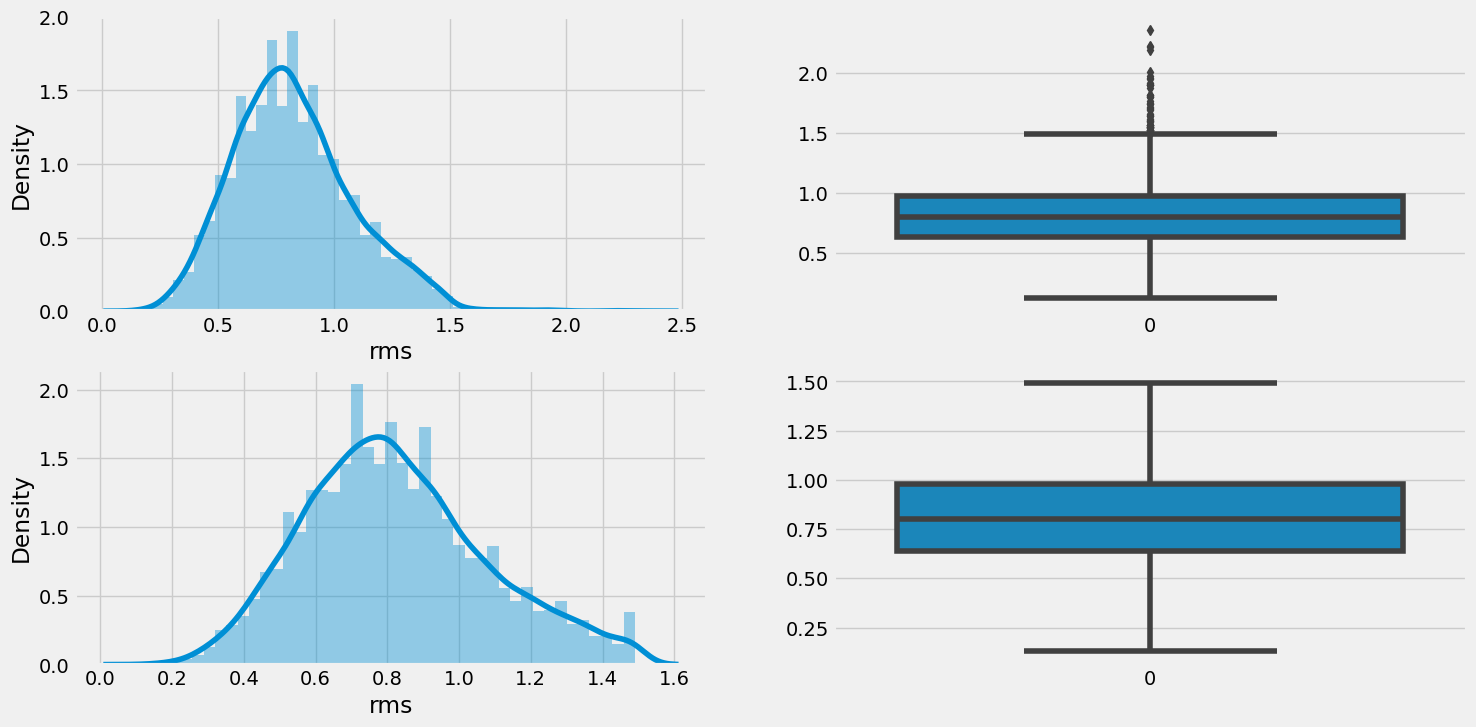

In [ ]:
#comparing
# First two plots are the dist and boxplot before we applied the capping technique, so in the boxplot, we can see a lot of outliers.
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['rms'])
plt.subplot(2,2,2)
sns.boxplot(data['rms'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['rms'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['rms'])
plt.show()

In [ ]:
data.describe()

latitude    longitude        depth          mag          nst  \
count  9749.000000  9749.000000  9749.000000  9749.000000  9749.000000   
mean     32.524655    76.039008    49.132742     4.421865    53.490204   
std       6.123895    16.361299    63.531274     0.375508    37.215445   
min      14.609500    46.407900     1.500000     2.700000     6.000000   
25%      27.832200    68.354900    10.000000     4.200000    29.000000   
50%      33.118500    72.424500    10.530000     4.400000    41.000000   
75%      36.979600    89.662200    61.780000     4.600000    66.000000   
max      48.387600   115.207300   400.570000     7.800000   586.000000   

               gap         dmin          rms  horizontalError   depthError  \
count  9749.000000  9749.000000  9749.000000      9749.000000  9749.000000   
mean     87.739881     3.147543     0.824807         7.217500     4.277796   
std      39.818646     2.440556     0.259181         2.068415     2.983660   
min       9.000000     0.001000     0.130000         1.500000     0.000000   
25%      61.000000     1.152000     0.640000         5.900000     1.900000   
50%      80.000000     2.550000     0.800000         7.100000     3.000000   
75%     108.000000     4.480000     0.980000         8.300000     6.200000   
max     306.000000    23.330000     2.360000        28.900000    30.200000   

          magError       magNst  
count  9749.000000  9749.000000  
mean      0.128487    35.844805  
std       0.069283    42.675667  
min       0.000000     1.000000  
25%       0.080000    11.000000  
50%       0.114000    21.000000  
75%       0.159000    42.000000  
max       0.540000   578.000000

In [ ]:
new_df_cap.describe()

latitude    longitude        depth          mag          nst  \
count  9749.000000  9749.000000  9749.000000  9749.000000  9749.000000   
mean     32.524655    76.039008    49.132742     4.421865    53.490204   
std       6.123895    16.361299    63.531274     0.375508    37.215445   
min      14.609500    46.407900     1.500000     2.700000     6.000000   
25%      27.832200    68.354900    10.000000     4.200000    29.000000   
50%      33.118500    72.424500    10.530000     4.400000    41.000000   
75%      36.979600    89.662200    61.780000     4.600000    66.000000   
max      48.387600   115.207300   400.570000     7.800000   586.000000   

               gap         dmin          rms  horizontalError   depthError  \
count  9749.000000  9749.000000  9749.000000      9749.000000  9749.000000   
mean     86.988532     3.147543     0.823455         7.180083     4.237714   
std      37.508759     2.440556     0.254582         1.946016     2.820158   
min       9.000000     0.001000     0.130000         2.300000     0.000000   
25%      61.000000     1.152000     0.640000         5.900000     1.900000   
50%      80.000000     2.550000     0.800000         7.100000     3.000000   
75%     108.000000     4.480000     0.980000         8.300000     6.200000   
max     178.500000    23.330000     1.490000        11.900000    12.650000   

          magError       magNst  
count  9749.000000  9749.000000  
mean      0.125700    30.612524  
std       0.059744    26.314130  
min       0.000000     1.000000  
25%       0.080000    11.000000  
50%       0.114000    21.000000  
75%       0.159000    42.000000  
max       0.277500    88.500000

OUTTIER HANDLING FOR NST COLUMN

In [ ]:
from scipy.stats import shapiro 
shapiro(data['nst'])

ShapiroResult(statistic=0.7907153964042664, pvalue=0.0)

In [ ]:
print(data['nst'].skew())

2.500199654296327


In [ ]:
data['nst'].describe()

count    9749.000000
mean       53.490204
std        37.215445
min         6.000000
25%        29.000000
50%        41.000000
75%        66.000000
max       586.000000
Name: nst, dtype: float64

In [ ]:
#new_df_cap = data.copy()

In [ ]:
from scipy.stats.mstats import winsorize

# Set percentage of data to winsorize
winsorize_percent = 0.05

# Winsorize nst column
new_df_cap['nst']= winsorize(data['nst'], limits=[winsorize_percent, winsorize_percent])


In [ ]:
new_df_cap['nst'].describe()

count    9749.000000
mean       51.815263
std        30.411388
min        20.000000
25%        29.000000
50%        41.000000
75%        66.000000
max       128.000000
Name: nst, dtype: float64

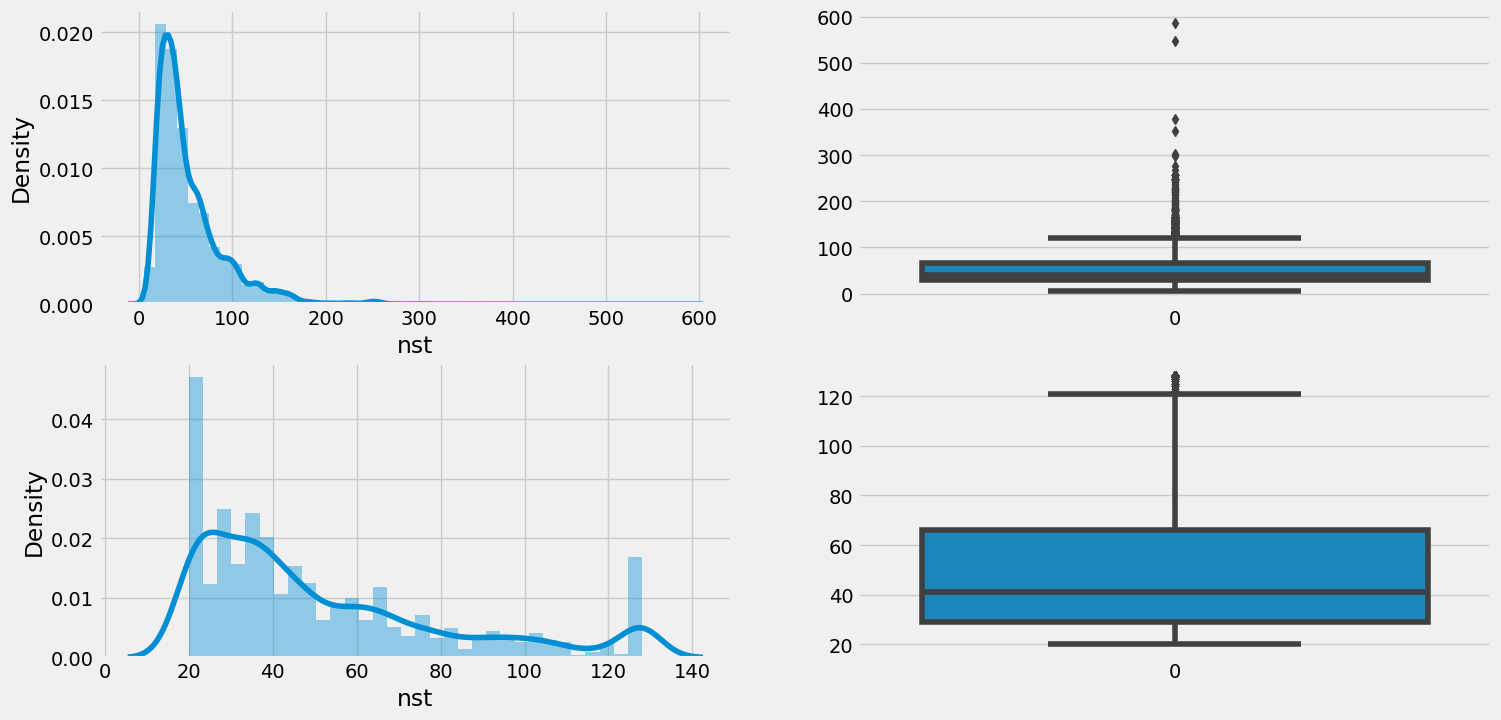

In [ ]:
#comparing
# First two plots are the hist and boxplot before we applied the capping technique, so in the boxplot, we can see a lot of outliers.
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['nst'])
plt.subplot(2,2,2)
sns.boxplot(data['nst'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['nst'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['nst'])
plt.show()

In [ ]:
from scipy.stats import shapiro 
shapiro(data['dmin'])
#p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test.
#sample data does not come from a normal distribution.

ShapiroResult(statistic=0.8907181024551392, pvalue=0.0)

In [ ]:
#the skewness value should be between -1 and +1 
# If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed. 
print(data['dmin'].skew())

1.4293553790571372


In [ ]:
from scipy import stats
IQR =stats.iqr(data.dmin,interpolation='midpoint')
IQR

3.3280000000000003

In [ ]:
Q1=data.dmin.quantile(0.25)
Q3=data.dmin.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-3.8400000000000007, 9.472000000000001)

In [ ]:
data.loc[data.dmin<min_limit]

Empty DataFrame
Columns: [time, latitude, longitude, depth, mag, magType, nst, gap, dmin, rms, place, horizontalError, depthError, magError, magNst]
Index: []

In [ ]:
data.loc[data.dmin>max_limit]

time  latitude  longitude   depth  mag  \
82   2023-03-17 10:39:39.278000+00:00   30.7663    96.0896  10.000  4.9   
87   2023-03-15 03:38:34.159000+00:00   37.8371   101.4060  13.725  4.2   
203  2023-02-03 12:14:40.692000+00:00   37.0695    96.9059  10.000  5.0   
238  2023-01-22 22:08:26.786000+00:00   38.5293    99.0858  11.284  4.2   
344  2022-12-12 14:41:36.662000+00:00   30.7282    96.3491  10.000  4.3   
...                               ...       ...        ...     ...  ...   
9242 2013-09-18 16:26:50.430000+00:00   32.9171    48.8728  10.000  4.6   
9310 2013-08-24 19:32:52.510000+00:00   14.7238    55.1300  11.180  4.2   
9331 2013-08-15 03:53:51.110000+00:00   14.8525    54.7923  10.000  4.4   
9347 2013-08-11 23:48:18.940000+00:00   29.9760    97.9127  10.000  4.9   
9386        2013-07-29 13:07:03+00:00   23.2863    70.4026  20.000  4.0   

     magType  nst    gap    dmin   rms                                place  \
82       mww  137   35.0   9.891  0.47           111 km WSW of Qamdo, China   
87        mb   49   88.0  10.089  0.67         41 km N of Qingshizui, China   
203       mb   78   43.0  12.445  0.49              northern Qinghai, China   
238       mb   37   50.0  10.717  0.36         126 km WSW of Zhangye, China   
344       mb   33   87.0  10.098  0.82            91 km WSW of Qamdo, China   
...      ...  ...    ...     ...   ...                                  ...   
9242      mb   44   63.0   9.818  0.83  73 km NNE of Shahrak-e K?l?r?, Iran   
9310      mb   39  139.0  12.618  0.50          259 km NNE of Hadibu, Yemen   
9331      mb   37  196.0  12.298  1.03          250 km SSE of ?al?lah, Oman   
9347      mb  119   23.0  10.034  0.81           146 km SSE of Qamdo, China   
9386      mb   32  126.0  10.628  0.95           6 km ESE of Bhach?u, India   

      horizontalError  depthError  magError  magNst  
82               4.00       1.840     0.098      10  
87               9.52       4.704     0.098      29  
203              8.47       1.847     0.048     139  
238             10.11       5.149     0.131      16  
344              5.12       1.907     0.126      18  
...               ...         ...       ...     ...  
9242             7.30       1.900     0.114      23  
9310             9.92       5.900     0.125      19  
9331            12.10       1.900     0.143      14  
9347            10.24       1.800     0.039     204  
9386             7.40       6.200     0.157      11  

[186 rows x 15 columns]

In [ ]:
#new_df_cap = data.copy()

In [ ]:
new_df_cap.loc[data['dmin']>max_limit,'dmin']=np.median(data.dmin)


In [ ]:
new_df_cap.loc[new_df_cap.dmin>max_limit]

Empty DataFrame
Columns: [time, latitude, longitude, depth, mag, magType, nst, gap, dmin, rms, place, horizontalError, depthError, magError, magNst]
Index: []

In [ ]:
data.shape

(9749, 15)

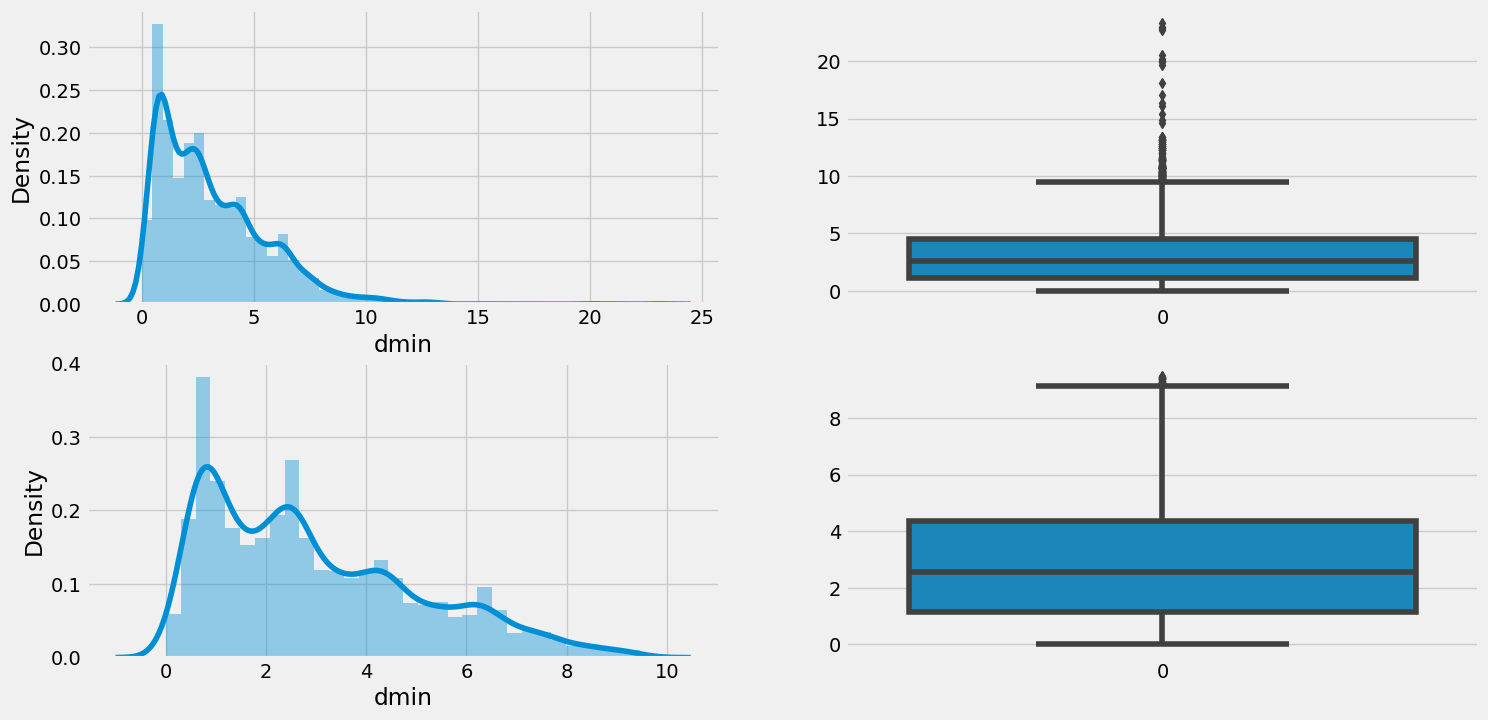

In [ ]:
#comparing
# First two plots are the hist and boxplot before we applied the capping technique, so in the boxplot, we can see a lot of outliers.
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['dmin'])
plt.subplot(2,2,2)
sns.boxplot(data['dmin'])
#After capping, one can see from the naked eye that there are no outliers present in the dataset anymore.
plt.subplot(2,2,3)
sns.distplot(new_df_cap['dmin'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['dmin'])
plt.show()

OUTLIER TREATMENT FOR DEPTH COLUMN

In [ ]:
IQR = stats.iqr(data.depth,interpolation='midpoint')
IQR

51.78

finding Q1,Q2,Q3 of depth

In [ ]:
Q1=np.percentile(data['depth'],25,interpolation='midpoint')
Q2=np.percentile(data['depth'],50,interpolation='midpoint')
Q3=np.percentile(data['depth'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

10.0
10.53
61.78


In [ ]:
#finding min and max limit
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-67.67, 139.45)

<Axes: xlabel='depth', ylabel='Density'>

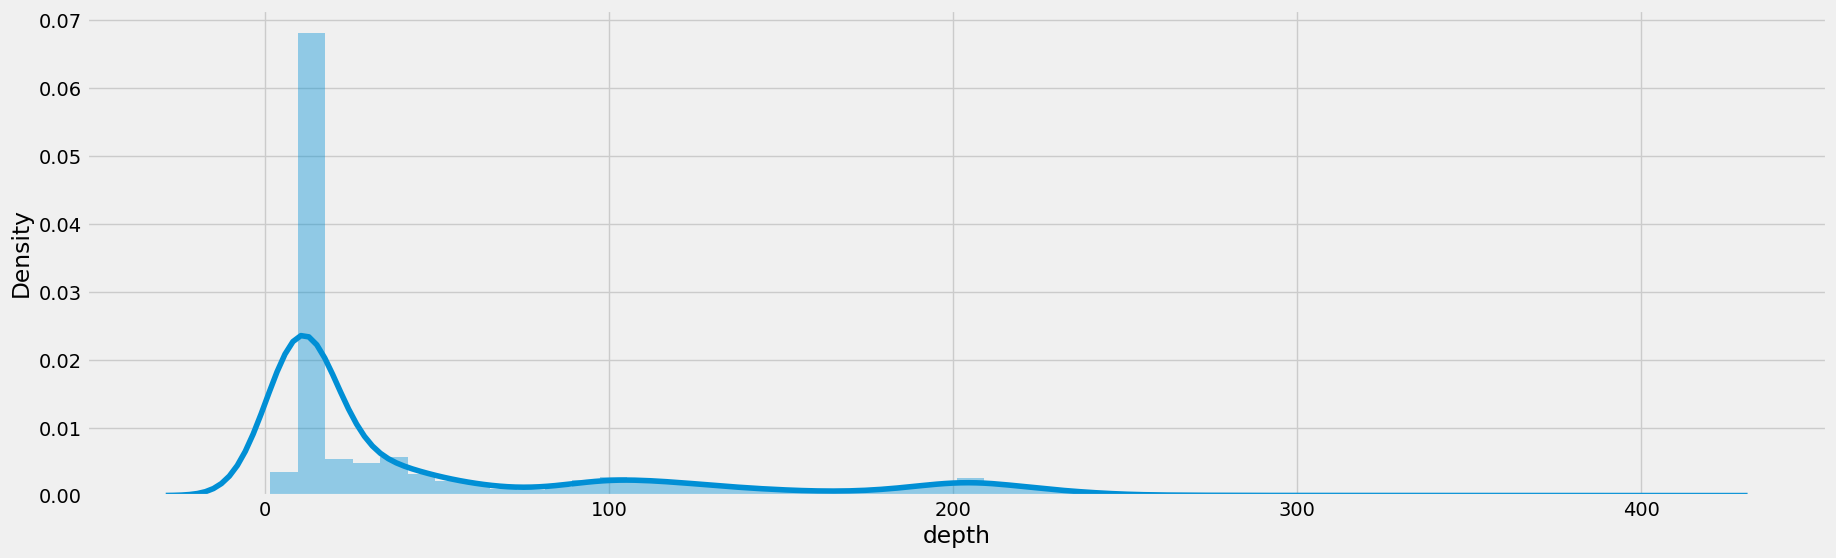

In [ ]:
sns.distplot(data.depth)

In [ ]:
#new_df_cap = data.copy()

In [ ]:
#np. where() will help us to impute the upper and lower limit values to both regions of outliers.
new_df_cap['depth'] = np.where(
    new_df_cap['depth']> max_limit,
    max_limit,
    np.where(
        new_df_cap['depth']  < min_limit,
        min_limit,
        new_df_cap['depth'] 
    ))

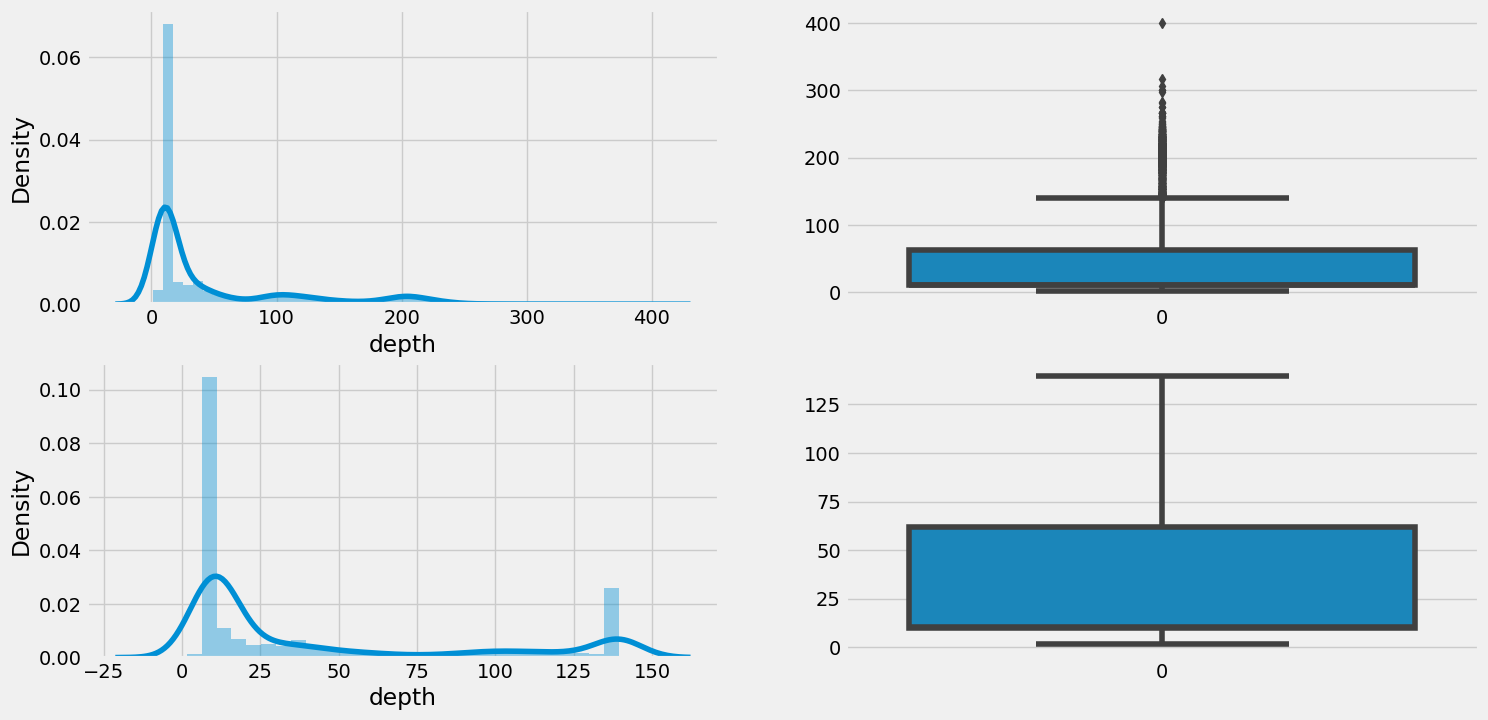

In [ ]:
#comparing
# First two plots are the hist and boxplot before we applied the capping technique, so in the boxplot, we can see a lot of outliers.
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['depth'])
plt.subplot(2,2,2)
sns.boxplot(data['depth'])
#After capping, one can see from the naked eye that there are no outliers present in the dataset anymore.
plt.subplot(2,2,3)
sns.distplot(new_df_cap['depth'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['depth'])
plt.show()

In [ ]:
new_df_cap.describe()

latitude    longitude        depth          mag          nst  \
count  9749.000000  9749.000000  9749.000000  9749.000000  9749.000000   
mean     32.524655    76.039008    42.335341     4.421865    51.815263   
std       6.123895    16.361299    47.680249     0.375508    30.411388   
min      14.609500    46.407900     1.500000     2.700000    20.000000   
25%      27.832200    68.354900    10.000000     4.200000    29.000000   
50%      33.118500    72.424500    10.530000     4.400000    41.000000   
75%      36.979600    89.662200    61.780000     4.600000    66.000000   
max      48.387600   115.207300   139.450000     7.800000   128.000000   

               gap         dmin          rms  horizontalError   depthError  \
count  9749.000000  9749.000000  9749.000000      9749.000000  9749.000000   
mean     86.988532     2.975086     0.823455         7.180083     4.237714   
std      37.508759     2.107129     0.254582         1.946016     2.820158   
min       9.000000     0.001000     0.130000         2.300000     0.000000   
25%      61.000000     1.152000     0.640000         5.900000     1.900000   
50%      80.000000     2.550000     0.800000         7.100000     3.000000   
75%     108.000000     4.351000     0.980000         8.300000     6.200000   
max     178.500000     9.470000     1.490000        11.900000    12.650000   

          magError       magNst  
count  9749.000000  9749.000000  
mean      0.125700    30.612524  
std       0.059744    26.314130  
min       0.000000     1.000000  
25%       0.080000    11.000000  
50%       0.114000    21.000000  
75%       0.159000    42.000000  
max       0.277500    88.500000

In [ ]:
c.data

FEATURE ENGINEERING

In [ ]:
new_df_cap.columns


In [ ]:
#copy of file 
new_data=new_df_cap

In [ ]:
new_data['MinDepth'] = new_data.apply(lambda x: x['depth'] - x['depthError'], axis=1)

In [ ]:
new_data['MaxDepth']=new_data.apply(lambda x: x['depth'] + x['depthError'], axis=1)

In [ ]:
new_data['MinMag'] = new_data.apply(lambda x: x['mag'] - x['magError'], axis=1)

In [ ]:
new_data['MaxMag'] = new_data.apply(lambda x: x['mag'] + x['magError'], axis=1)

In [ ]:
new_data['Minlatitude'] = new_data.apply(lambda x: x['latitude'] - x['horizontalError'], axis=1)

In [ ]:
new_data['Maxlatitude'] = new_data.apply(lambda x: x['latitude'] + x['horizontalError'], axis=1)

In [ ]:
new_data['time']=pd.to_datetime(new_data['time'])


In [ ]:
new_data['year']= new_data['time'].dt.year

In [ ]:
new_data['date']= new_data['time'].dt.date

In [ ]:
new_data['Time']= new_data['time'].dt.time

In [ ]:
new_data['month']= new_data['time'].dt.month

In [ ]:
#to get exact day
import calendar
new_data['month'] = new_data['month'].apply(lambda x: calendar.month_name[x])

In [ ]:
new_data.columns

In [ ]:
#rearranging the columns
cols = [ 'year','date','Time','month', 'time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'magError',
       'magNst', 'MinDepth', 'MaxDepth', 'MinMag', 'MaxMag', 'Minlatitude',
       'Maxlatitude']

In [ ]:
new_data.shape

In [ ]:
new_data=new_data[cols]

LABEL ENCODING

In [ ]:
data.describe()

latitude    longitude        depth          mag          nst  \
count  9749.000000  9749.000000  9749.000000  9749.000000  9749.000000   
mean     32.524655    76.039008    49.132742     4.421865    53.490204   
std       6.123895    16.361299    63.531274     0.375508    37.215445   
min      14.609500    46.407900     1.500000     2.700000     6.000000   
25%      27.832200    68.354900    10.000000     4.200000    29.000000   
50%      33.118500    72.424500    10.530000     4.400000    41.000000   
75%      36.979600    89.662200    61.780000     4.600000    66.000000   
max      48.387600   115.207300   400.570000     7.800000   586.000000   

               gap         dmin          rms  horizontalError   depthError  \
count  9749.000000  9749.000000  9749.000000      9749.000000  9749.000000   
mean     87.739881     3.147543     0.824807         7.217500     4.277796   
std      39.818646     2.440556     0.259181         2.068415     2.983660   
min       9.000000     0.001000     0.130000         1.500000     0.000000   
25%      61.000000     1.152000     0.640000         5.900000     1.900000   
50%      80.000000     2.550000     0.800000         7.100000     3.000000   
75%     108.000000     4.480000     0.980000         8.300000     6.200000   
max     306.000000    23.330000     2.360000        28.900000    30.200000   

          magError       magNst  
count  9749.000000  9749.000000  
mean      0.128487    35.844805  
std       0.069283    42.675667  
min       0.000000     1.000000  
25%       0.080000    11.000000  
50%       0.114000    21.000000  
75%       0.159000    42.000000  
max       0.540000   578.000000

In [ ]:
data_new = new_df_cap
data_new.head()
data_new.describe()

latitude    longitude        depth          mag          nst  \
count  9749.000000  9749.000000  9749.000000  9749.000000  9749.000000   
mean     32.524655    76.039008    42.335341     4.421865    51.815263   
std       6.123895    16.361299    47.680249     0.375508    30.411388   
min      14.609500    46.407900     1.500000     2.700000    20.000000   
25%      27.832200    68.354900    10.000000     4.200000    29.000000   
50%      33.118500    72.424500    10.530000     4.400000    41.000000   
75%      36.979600    89.662200    61.780000     4.600000    66.000000   
max      48.387600   115.207300   139.450000     7.800000   128.000000   

               gap         dmin          rms  horizontalError   depthError  \
count  9749.000000  9749.000000  9749.000000      9749.000000  9749.000000   
mean     86.988532     2.975086     0.823455         7.180083     4.237714   
std      37.508759     2.107129     0.254582         1.946016     2.820158   
min       9.000000     0.001000     0.130000         2.300000     0.000000   
25%      61.000000     1.152000     0.640000         5.900000     1.900000   
50%      80.000000     2.550000     0.800000         7.100000     3.000000   
75%     108.000000     4.351000     0.980000         8.300000     6.200000   
max     178.500000     9.470000     1.490000        11.900000    12.650000   

          magError       magNst  
count  9749.000000  9749.000000  
mean      0.125700    30.612524  
std       0.059744    26.314130  
min       0.000000     1.000000  
25%       0.080000    11.000000  
50%       0.114000    21.000000  
75%       0.159000    42.000000  
max       0.277500    88.500000

We need to Encode the categorical column magType. But we need to clean since we analysed that there could data entry errors for 2 entries such as mb and mb_lg and mw.

In [ ]:
data_new['magType'].unique()

array(['mb', 'mww', 'ml', 'mwr', 'mwb', 'mwc', 'mw', 'Mb', 'mb_lg',
       'mblg'], dtype=object)

In [ ]:
data_new['magType'].value_counts()

mb       9183
mww       395
mwr        91
mwb        43
ml         18
mblg        9
mwc         7
mw          1
Mb          1
mb_lg       1
Name: magType, dtype: int64

Replacing magnitude type Mb by mb


In [ ]:
data_new['magType']=data_new['magType'].replace('Mb','mb')

Replace the magnitude type mb_lg by mblg

In [ ]:
data_new['magType']=data_new['magType'].replace('mb_lg','mblg')

In [ ]:
data_new['magType'].value_counts()

mb      9184
mww      395
mwr       91
mwb       43
ml        18
mblg      10
mwc        7
mw         1
Name: magType, dtype: int64

## **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [ ]:
data_new[['magType']]=data_new[['magType']].apply(le.fit_transform)

In [ ]:
data_new.head()

time  latitude  longitude    depth  mag  \
0 2023-04-25 07:25:02.082000+00:00   44.8695    52.4433   10.388  4.5   
1 2023-04-24 14:13:04.988000+00:00   43.3327    83.7836   10.000  4.4   
2 2023-04-24 00:21:45.048000+00:00   36.4780    70.9118  120.173  4.0   
3 2023-04-23 18:10:43.106000+00:00   37.4855    70.0997    9.686  4.4   
4 2023-04-23 16:27:53.084000+00:00   30.3602    70.9070   39.643  4.8   

   magType  nst    gap   dmin   rms                            place  \
0        0   49   52.0  3.670  0.87  84 km NNE of Shetpe, Kazakhstan   
1        0   40   85.0  3.136  1.05      44 km ESE of Xinyuan, China   
2        0   29   84.0  2.462  0.78     43 km S of Jurm, Afghanistan   
3        0   39  122.0  1.454  0.58  37 km ESE of Chubek, Tajikistan   
4        0   20  163.0  4.456  0.56  13 km SSW of Kot Addu, Pakistan   

   horizontalError  depthError  magError  magNst  
0             8.31       5.457     0.079    48.0  
1             7.48       1.700     0.104    27.0  
2             6.09       8.250     0.173     9.0  
3             6.87       6.011     0.108    25.0  
4            11.90      10.959     0.109    26.0

In [ ]:
data_new['magType'].unique()

array([0, 7, 2, 6, 4, 5, 3, 1])

In [ ]:
data_new.shape

(9749, 15)

In [ ]:
#Dropping the time column 
data_new = data_new.drop(["time","place"], axis=1) 

In [ ]:
data_new.head(936)

latitude  longitude    depth  mag  magType  nst    gap   dmin   rms  \
0     44.8695    52.4433   10.388  4.5        0   49   52.0  3.670  0.87   
1     43.3327    83.7836   10.000  4.4        0   40   85.0  3.136  1.05   
2     36.4780    70.9118  120.173  4.0        0   29   84.0  2.462  0.78   
3     37.4855    70.0997    9.686  4.4        0   39  122.0  1.454  0.58   
4     30.3602    70.9070   39.643  4.8        0   20  163.0  4.456  0.56   
..        ...        ...      ...  ...      ...  ...    ...    ...   ...   
931   34.5109    98.8979   10.000  4.1        0   35   68.0  4.183  0.87   
932   37.3399    72.2350  139.450  4.4        0   21   57.0  1.341  0.59   
933   34.4941    69.0207   10.000  2.7        2   20  178.5  0.050  0.88   
934   37.0407    71.9542  139.450  4.6        0   22   77.0  1.105  0.82   
935   26.3635    95.6051   95.690  4.3        0   23   90.0  4.130  0.95   

     horizontalError  depthError  magError  magNst  
0               8.31       5.457     0.079    48.0  
1               7.48       1.700     0.104    27.0  
2               6.09       8.250     0.173     9.0  
3               6.87       6.011     0.108    25.0  
4              11.90      10.959     0.109    26.0  
..               ...         ...       ...     ...  
931             5.50       1.800     0.130    16.0  
932             7.80       5.500     0.204     7.0  
933             7.20       2.000     0.128     8.0  
934             7.60       8.700     0.222     6.0  
935             9.70       7.200     0.169    10.0  

[936 rows x 13 columns]

In [ ]:
data_new.describe()

latitude    longitude        depth          mag      magType  \
count  9749.000000  9749.000000  9749.000000  9749.000000  9749.000000   
mean     32.524655    76.039008    42.335341     4.421865     0.365884   
std       6.123895    16.361299    47.680249     0.375508     1.511815   
min      14.609500    46.407900     1.500000     2.700000     0.000000   
25%      27.832200    68.354900    10.000000     4.200000     0.000000   
50%      33.118500    72.424500    10.530000     4.400000     0.000000   
75%      36.979600    89.662200    61.780000     4.600000     0.000000   
max      48.387600   115.207300   139.450000     7.800000     7.000000   

               nst          gap         dmin          rms  horizontalError  \
count  9749.000000  9749.000000  9749.000000  9749.000000      9749.000000   
mean     51.815263    86.988532     2.975086     0.823455         7.180083   
std      30.411388    37.508759     2.107129     0.254582         1.946016   
min      20.000000     9.000000     0.001000     0.130000         2.300000   
25%      29.000000    61.000000     1.152000     0.640000         5.900000   
50%      41.000000    80.000000     2.550000     0.800000         7.100000   
75%      66.000000   108.000000     4.351000     0.980000         8.300000   
max     128.000000   178.500000     9.470000     1.490000        11.900000   

        depthError     magError       magNst  
count  9749.000000  9749.000000  9749.000000  
mean      4.237714     0.125700    30.612524  
std       2.820158     0.059744    26.314130  
min       0.000000     0.000000     1.000000  
25%       1.900000     0.080000    11.000000  
50%       3.000000     0.114000    21.000000  
75%       6.200000     0.159000    42.000000  
max      12.650000     0.277500    88.500000

## **Feature Scaling and Normalization**

In [ ]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X = data_new.drop(["mag"], axis=1)
#y = data["mag"]
#scaled_data = scaler.fit_transform(X)
#df_scaled = pd.DataFrame(data=scaled_data, columns=[X])

In [ ]:
data_new.head()

In [ ]:
#dropping irrelevent features before normalization

In [ ]:
data_new = data_new.drop(["magType","dmin","rms","horizontalError","depthError","magError"], axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sca = MinMaxScaler()
data_new = data_new.drop(["mag"], axis=1)
df_normalized = pd.DataFrame(sca.fit_transform(data_new), columns=data_new.columns)

In [ ]:
df_normalized

In [ ]:
data_new.head()

In [ ]:
data_new.describe()

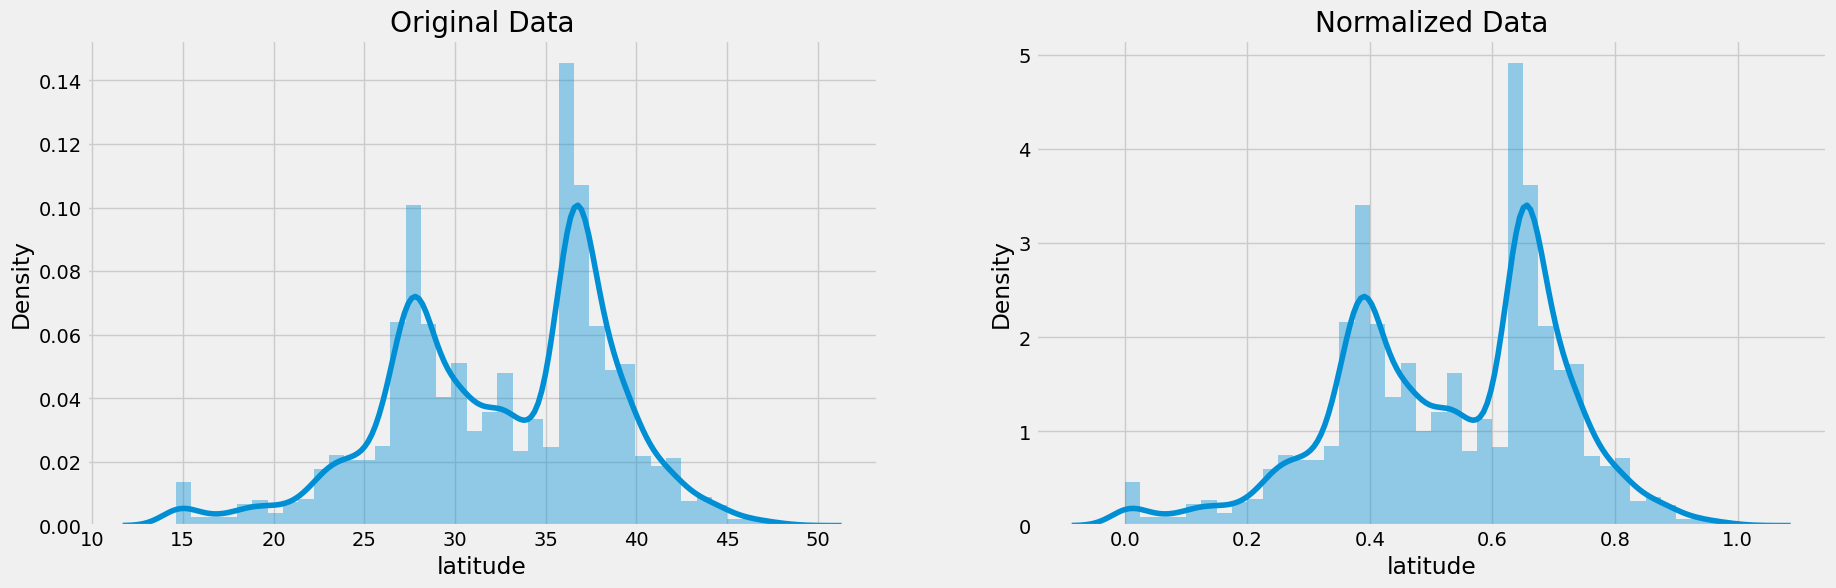

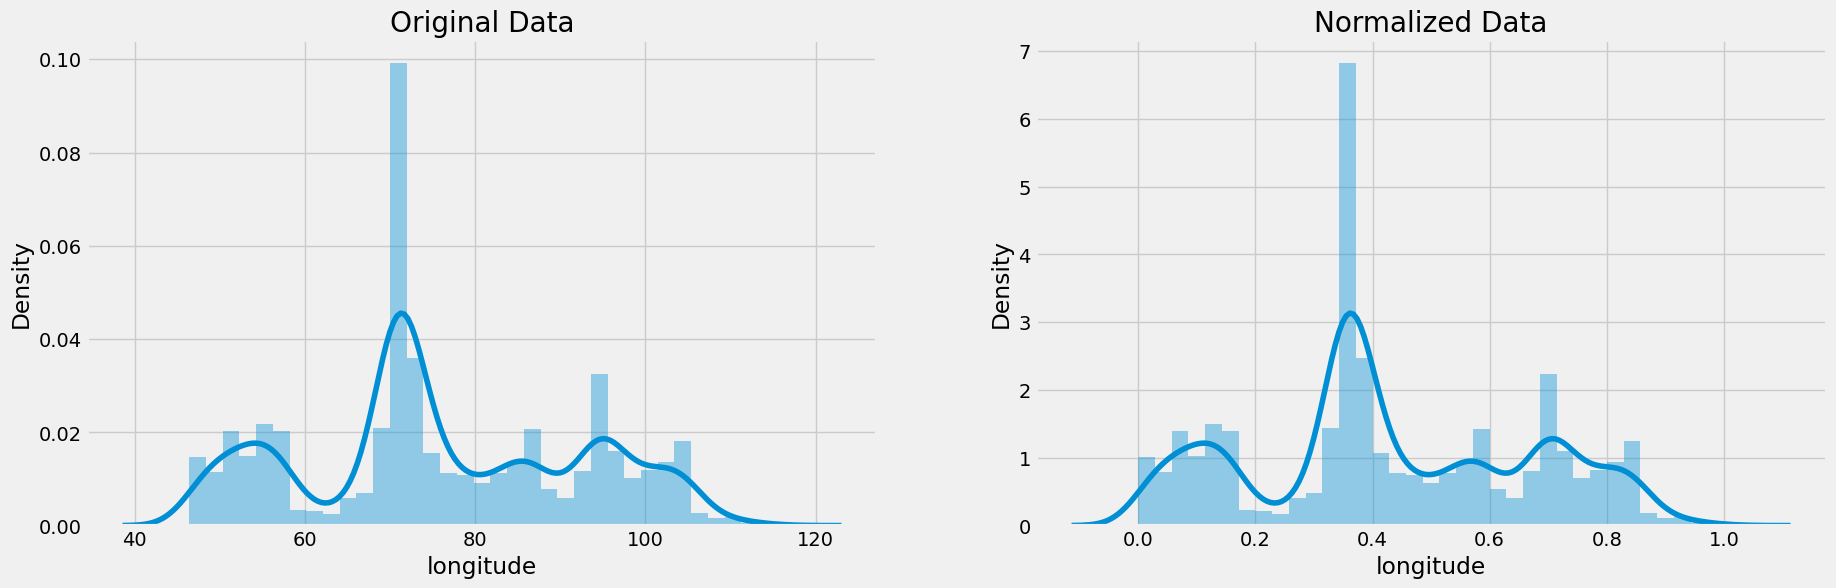

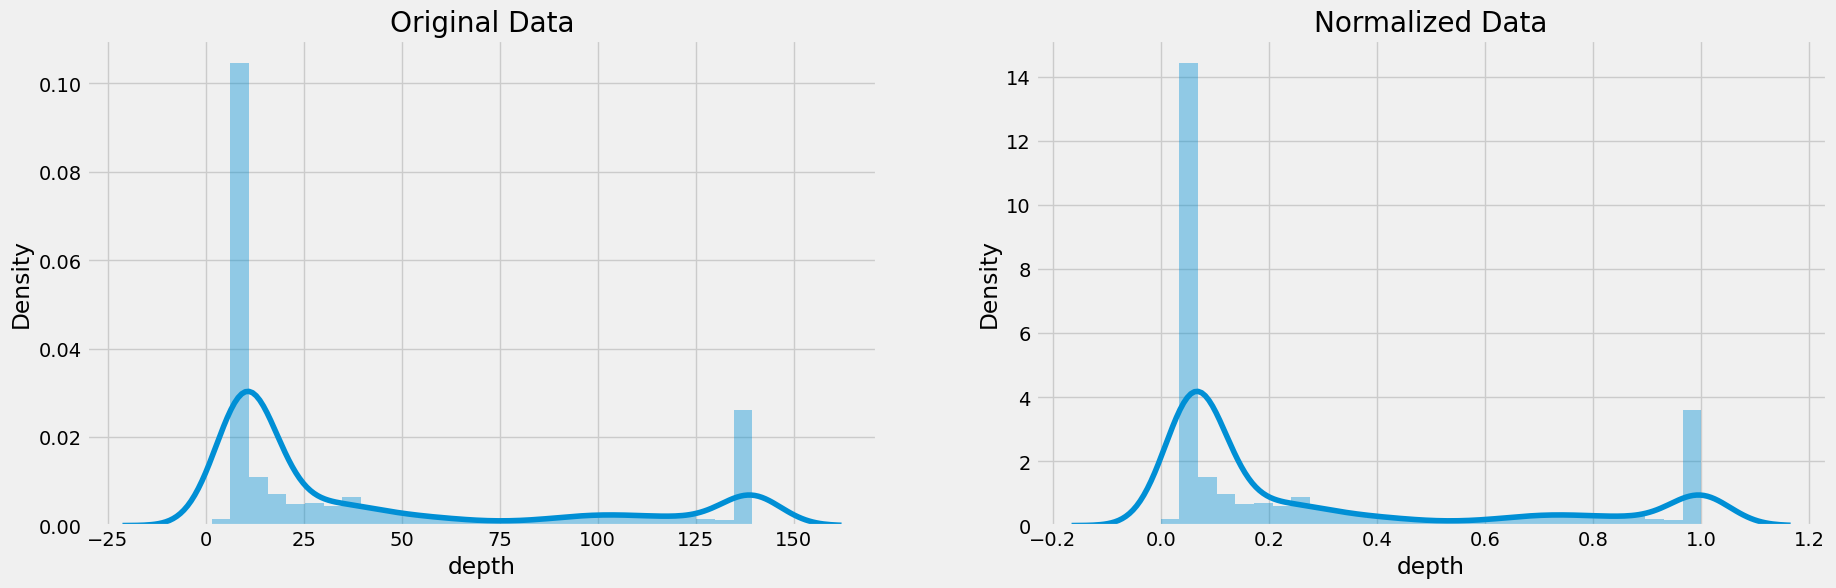

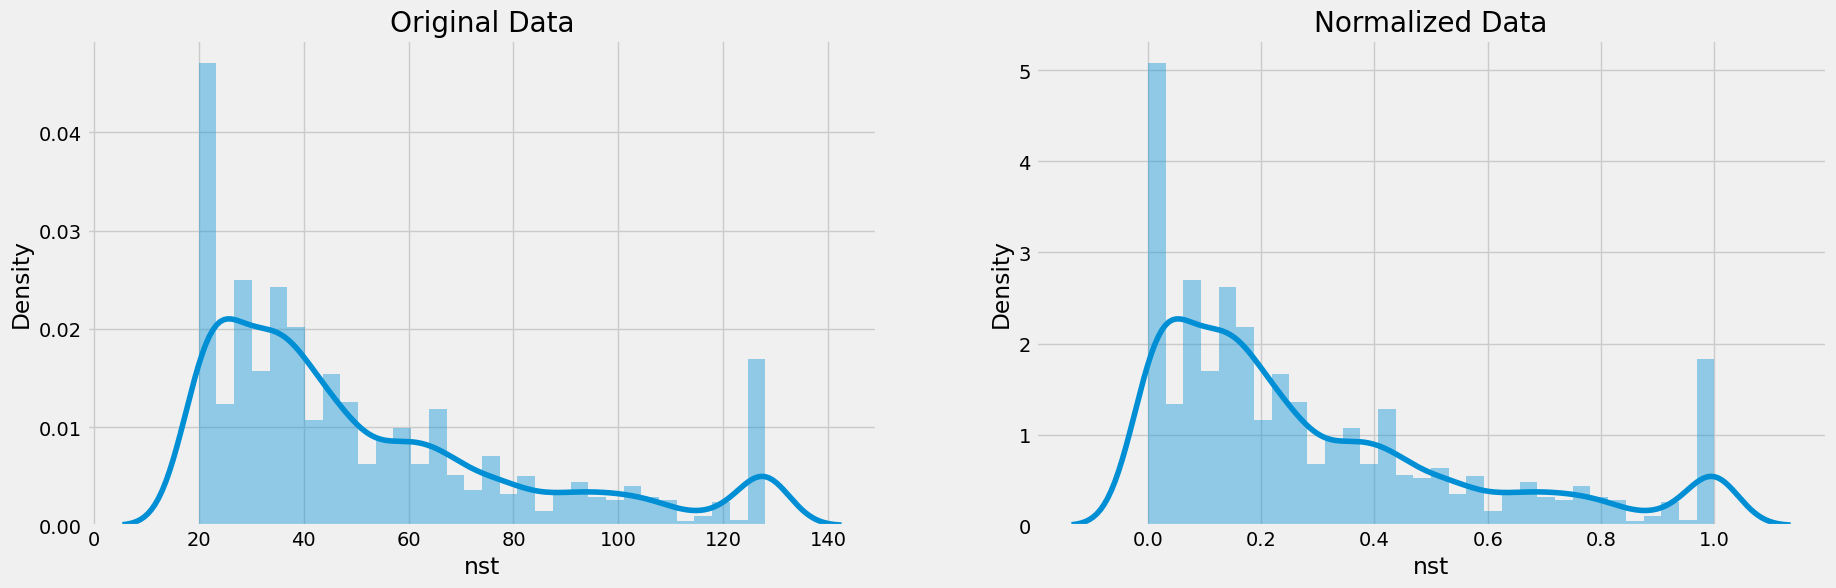

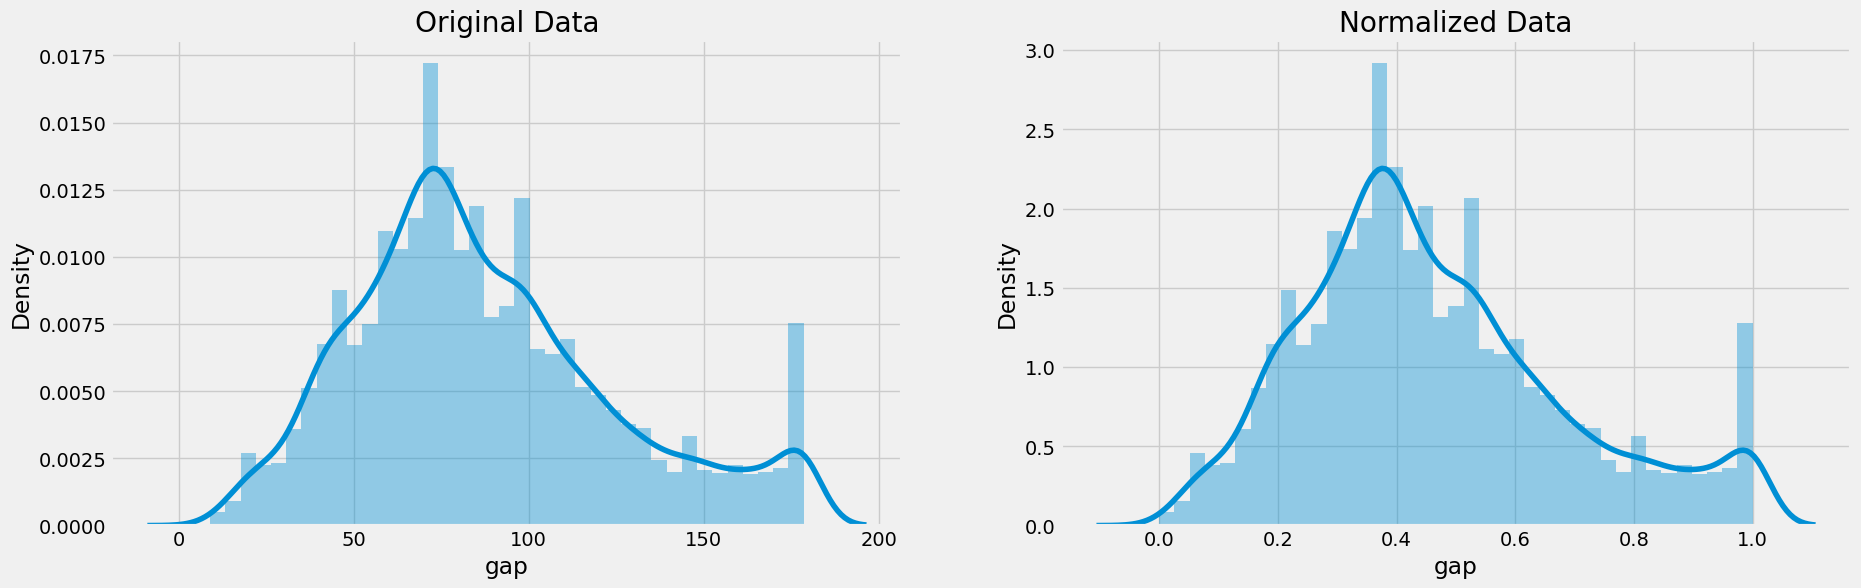

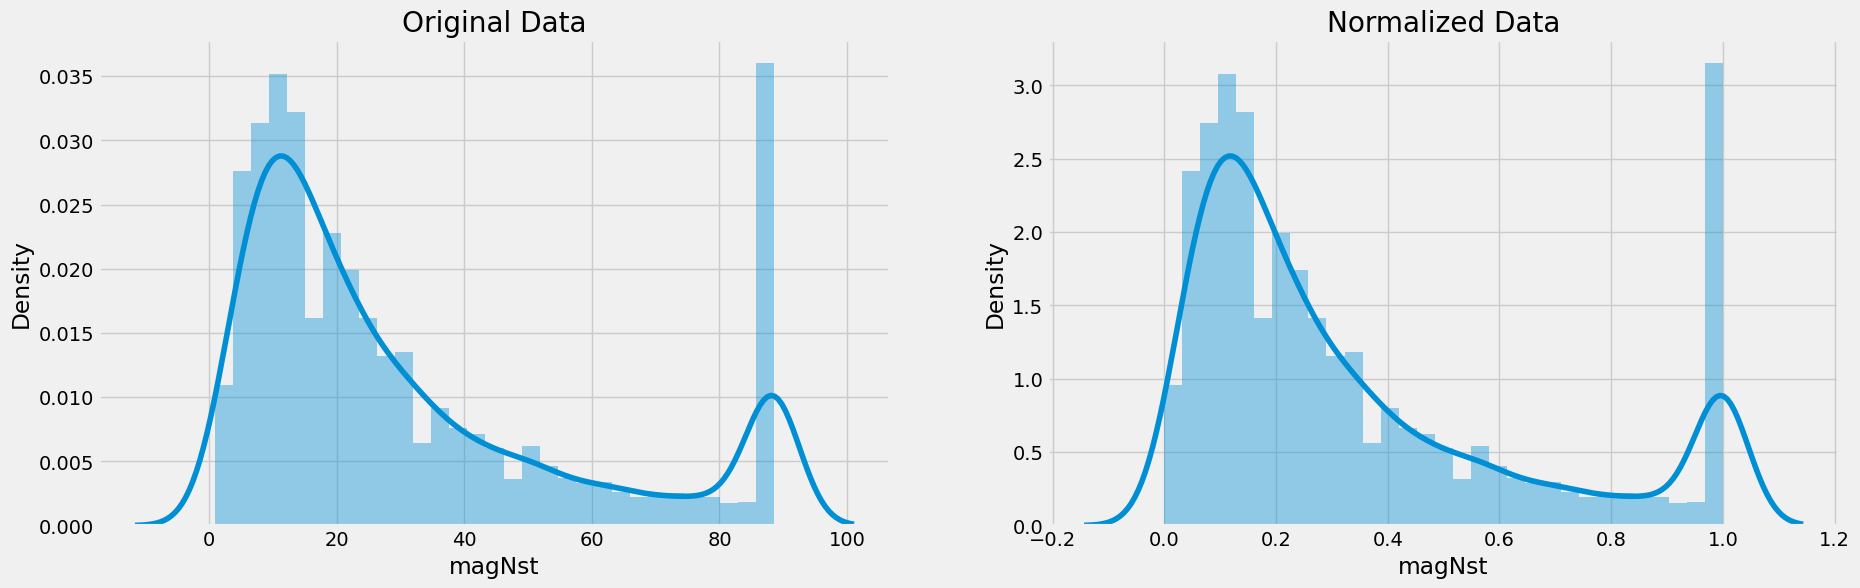

In [ ]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler


for i in data_new:
    fig,ax=plt.subplots(1,2)
    sns.distplot(data_new[i],ax=ax[0])
    ax[0].set_title("Original Data")

    sns.distplot(df_normalized[i],ax=ax[1])
    ax[1].set_title("Normalized Data")

In [ ]:
import pandas as pd
from sklearn.linear_model import LassoCV


# Separate the target variable (mag_cat) from the features
X = df_normalized
y = data["mag"]

# Train a Lasso regression model to select features
model = LassoCV(cv=10)
model.fit(X, y)

# Get the coefficients and corresponding feature names
coef = pd.Series(model.coef_, index=X.columns)
print("Selected features:\n", coef[coef!=0])
#In the context of lasso regularization, it is generally recommended to normalize the features 
#but not the target variable. This is because lasso regularization penalizes the absolute size of the
#regression coefficients, and scaling the target variable may 
#change the scale of the coefficients, making it harder to interpret their relative importance.

In [ ]:
#or we can do the following by wrapper method also : RFE is an iterative method 
#    that works by recursively removing features from the model and 
#   re-fitting it with the remaining features. At each iteration, the feature(s) 
 #   with the least importance are removed until a specified number of features is reached.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


X = df_normalized
y = data["mag"]
# instantiate a linear regression model
model = LinearRegression()

# create an RFE object to select the top 10 features
rfe = RFE(model, n_features_to_select=10)

# fit the RFE object to the data
rfe.fit(X, y)

# get the selected feature indices
selected_indices = rfe.get_support(indices=True)

# get the names of the selected features
selected_features = X.columns[selected_indices]

# print the selected features
print(selected_features)

NST (Number of Stations) and MAGNST (Magnitude based on stations) are two different parameters in the USGS earthquake data that can be used in predicting the magnitude of an earthquake.

NST represents the number of seismic stations that have reported a detection of the earthquake. It is a measure of the data coverage and quality for that event. A higher NST value means that more stations detected the earthquake, providing more information to estimate its location and magnitude.

MAGNST, on the other hand, is a measure of the magnitude of the earthquake calculated from the data recorded by seismic stations. It is based on the amplitude of the seismic waves recorded by the stations and is often used as a preliminary estimate of the earthquake magnitude before more detailed analysis is performed.

**SPLITTING THE TEST AND TRAIN DATA**

In [ ]:
X = df_normalized[['latitude', 'longitude', 'depth', 'nst' , 'gap','magNst']]
y = new_df_cap['mag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


**BUILDING AND EVALUATING THE MODEL**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


# Create the GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Define the parameter grid
param_grid = {'n_estimators': [100, 500, 1000],
              'learning_rate': [0.01, 0.1, 0.5],
              'max_depth': [3, 6, 9]}

# Perform hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(gb_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the best score achieved
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


# Define the model and set hyperparameters
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
gbm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbm.predict(X_test)

# Calculate mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)
print('R-squared score:', r2_score(y_test, y_pred))


Mean squared error: 0.03763079262906267
R-squared score: 0.7139632202718498


In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


# Set up the hyperparameter search space
param_dist = {'iterations': randint(1000, 3000),
              'learning_rate': uniform(0.01, 0.5),
              'depth': randint(4, 10),
              'l2_leaf_reg': uniform(1, 10)}

# Create a CatBoost regressor object
catboost_model = CatBoostRegressor(loss_function='RMSE', random_seed=42, logging_level='Silent')

# Set up a random search with cross-validation
random_search = RandomizedSearchCV(estimator=catboost_model, param_distributions=param_dist, cv=5, n_jobs=-1)

# Fit the random search object to the training data
random_search.fit(X_train, y_train)

# Get the best parameters
best_parameters = random_search.best_params_
print("Best parameters:", best_parameters)

# Create the CatBoost model with the best parameters
catboost_model = CatBoostRegressor(iterations=best_parameters['iterations'],
                                    learning_rate=best_parameters['learning_rate'],
                                    depth=best_parameters['depth'],
                                    l2_leaf_reg=best_parameters['l2_leaf_reg'],
                                    loss_function='RMSE',
                                    random_seed=42,
                                    logging_level='Silent')

# Fit the model to the training data
catboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = catboost_model.predict(X_test)

# Calculate the mean_squared_error & R-squared score
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print("mean squared error:", mse)
print("R-squared score:", r2)


In [ ]:
# Create the CatBoost model with the best parameters by giving implicitly
catboost_model = CatBoostRegressor( depth= 7, 
                                   iterations= 2945, 
                                   l2_leaf_reg= 5.257357434340113, 
                                   learning_rate= 0.046322937272804114,
                                    loss_function='RMSE',
                                    random_seed=42,
                                    logging_level='Silent')

# Fit the model to the training data
catboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = catboost_model.predict(X_test)

# Calculate the mean_squared_error & R-squared score
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print("mean squared error:", mse)
print("R-squared score:", r2)
ypre= catboost_model.predict(X)


mean squared error: 0.025276201827475104
R-squared score: 0.801226590844351


In [ ]:
predictions = catboost_model.predict(X_test)
# round the predicted values to one decimal digit
predictions = [round(pred, 1) for pred in predictions]
#compare predicted values with the actual scores
compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
compare_df.tail(15)

In [ ]:
# Calculate the percentage of actual values that match with predicted values
num_matches = sum([1 for i in range(len(predictions)) if round(predictions[i],1) == round(y_test.iloc[i],1)])
percent_match = num_matches / len(predictions) * 100

print('Percentage of actual values that match with predicted values:', round(percent_match, 2), '%')


In [ ]:
import matplotlib.pyplot as plt

# Generate some example data
x = compare_df.index
y_actual = compare_df['actual']
y_predicted = compare_df['predicted']

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the actual and predicted values
ax.plot(x, y_actual, label='Actual')
ax.plot(x, y_predicted, label='Predicted')

# Set plot properties
ax.set_title('Comparison of Actual and Predicted Values')
ax.set_xlabel('Index')
ax.set_ylabel('Magnitude')
ax.legend()

# Display the plot
plt.show()


In [ ]:
new_df_cap['pred']=ypre

In [ ]:
new_df_cap.head(6)

**Finding rows >mag 6**

In [ ]:
import math
for index,rows in new_df_cap.iterrows():
  if rows['mag']==math.floor(rows['pred']*10)/10:
    if(rows['mag']>=6):
      print(index,end=' ')
      print(rows['mag'],end=' ')
      print(rows['pred'])

3390 6.2 6.240366651290934
4866 6.2 6.254823598874564
5068 6.1 6.131401856512978
6789 7.2 7.20116028627124
7261 6.4 6.428301994605771
7576 6.7 6.733022354328671
8306 6.0 6.064816839497624
9180 6.8 6.85051260522386


In [ ]:
new_df_cap

time  latitude  longitude    depth  mag  \
0    2023-04-25 07:25:02.082000+00:00   44.8695    52.4433   10.388  4.5   
1    2023-04-24 14:13:04.988000+00:00   43.3327    83.7836   10.000  4.4   
2    2023-04-24 00:21:45.048000+00:00   36.4780    70.9118  120.173  4.0   
3    2023-04-23 18:10:43.106000+00:00   37.4855    70.0997    9.686  4.4   
4    2023-04-23 16:27:53.084000+00:00   30.3602    70.9070   39.643  4.8   
...                               ...       ...        ...      ...  ...   
9744 2013-04-19 20:22:33.290000+00:00   32.8010    51.8110    8.000  4.3   
9745 2013-04-19 18:32:57.700000+00:00   28.4720    51.5970   19.000  4.4   
9746        2013-04-19 14:46:45+00:00   34.6500    73.1280   25.500  4.4   
9747 2013-04-19 08:32:24.880000+00:00   36.5830    70.8020  139.450  4.1   
9748 2013-04-19 06:35:52.970000+00:00   27.3330    87.8530   47.100  4.2   

      magType  nst    gap    dmin   rms                             place  \
0           0   49   52.0  3.6700  0.87   84 km NNE of Shetpe, Kazakhstan   
1           0   40   85.0  3.1360  1.05       44 km ESE of Xinyuan, China   
2           0   29   84.0  2.4620  0.78      43 km S of Jurm, Afghanistan   
3           0   39  122.0  1.4540  0.58   37 km ESE of Chubek, Tajikistan   
4           0   20  163.0  4.4560  0.56   13 km SSW of Kot Addu, Pakistan   
...       ...  ...    ...     ...   ...                               ...   
9744        0   52  100.0  4.0180  0.80       10 km E of Dowlat?b?d, Iran   
9745        0   55  100.0  2.1344  0.80         92 km SE of Bushehr, Iran   
9746        0   42   59.0  4.9986  1.01  10 km ESE of Battagram, Pakistan   
9747        0   20  116.0  1.0846  0.54      31 km S of Jurm, Afghanistan   
9748        0   20  169.0  1.4106  1.03       40 km W of Gyalshing, India   

      horizontalError  depthError  magError  magNst      pred  
0               8.310       5.457    0.0790    48.0  4.348293  
1               7.480       1.700    0.1040    27.0  4.401055  
2               6.090       8.250    0.1730     9.0  4.228405  
3               6.870       6.011    0.1080    25.0  4.391758  
4              11.900      10.959    0.1090    26.0  4.705955  
...               ...         ...       ...     ...       ...  
9744            6.140       4.480    0.0992    31.0  4.330366  
9745            7.380       2.700    0.0972    42.0  4.323978  
9746            8.088       5.300    0.0972    13.0  4.427778  
9747            6.800      12.650    0.1798     1.0  4.077798  
9748            6.400       9.500    0.1512     6.0  4.129540  

[9749 rows x 16 columns]

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split


# Create the Adaboost regressor object
adaboost = AdaBoostRegressor(random_state=42)

# Train the model on the training set
adaboost.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = adaboost.predict(X_test)

# Evaluate the model using mean squared error metric
mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
print("Mean squared error: ", mse)
print("r2 score: ", r2_score)


In [ ]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


# Create the XGBoost model and fit on the training data
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# Evaluate the model using R-squared score
r2_score = r2_score(y_test, y_pred)
print("R-squared score:", r2_score)



In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Train the model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: {}".format(mse))
print("R-squared score: {}".format(r2))



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Create a random forest regressor object with hyperparameters
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Predict the target variable on test set
y_pred = rf.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared score:", r2_score(y_test, y_pred))


**After the evaluation we got lowest mse score and highest r2 score for Catboost Model .**

## **Pickling**

In [ ]:
import pandas as pd
import numpy as np
import pickle
CB_pkl = open('CB1.pkl','wb')
pickle.dump(catboost_model,CB_pkl)
CB_pkl.close()

In [ ]:
sc_pkl = open('sc.pkl','wb')
pickle.dump(sca,sc_pkl)
sc_pkl.close()

In [ ]:
le_1 = pickle.load(open('sc.pkl','rb'))

In [ ]:
le_1.transform([[44.8695 ,	52.4433 	,10.388 ,		49, 	52.0,48]])